<center>
  <h2>Trabajo Laboratorio de Implementación III - MCD Virtual Cohorte 2022</h2>
  <h3>Forecasting para una Empresa de Consumo Masivo</h3>
  <h4>Analisis Exploratorio de los Datos</h4>
</center>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### 1) Procesamiento de datos

- Datos de ventas

cust_request_qty: cantidad de solicitudes por producto (en cada solicitud se pide cierta cantidad de toneladas)

cust_request_tn: toneladas solicitadas

tn: toneladas vendidas

In [2]:
ventas = pd.read_csv("C:/Users/usuario/otros/Desktop\MCD/6 Labo III/Forecasting Problem/Datasets/sell-in.txt", delimiter='\t')
ventas.head(5)

periodo  customer_id  product_id  plan_precios_cuidados  cust_request_qty   
0   201701        10234       20524                      0                 2  \
1   201701        10032       20524                      0                 1   
2   201701        10217       20524                      0                 1   
3   201701        10125       20524                      0                 1   
4   201701        10012       20524                      0                11   

   cust_request_tn       tn  
0          0.05300  0.05300  
1          0.13628  0.13628  
2          0.03028  0.03028  
3          0.02271  0.02271  
4          1.54452  1.54452

In [3]:
print("----TIPOS DE DATOS DATASET VENTAS-----")
ventas.dtypes

----TIPOS DE DATOS DATASET VENTAS-----


periodo                    int64
customer_id                int64
product_id                 int64
plan_precios_cuidados      int64
cust_request_qty           int64
cust_request_tn          float64
tn                       float64
dtype: object

In [4]:
ventas['periodo'] = ventas['periodo'].astype(str)
ventas['periodo'] = pd.to_datetime(ventas['periodo'], format='%Y%m')

In [5]:
print("----PERIODOS-----")
print(f"Fecha mínima ventas: {ventas.periodo.min()}")
print(f"Fecha máxima ventas: {ventas.periodo.max()}")
print("----CLIENTES-----")
print(f"Cantidad clientes compradores en periodo contemplado: {len(ventas.customer_id.drop_duplicates())}")
print("----PRODUCTOS-----")
print(f"Cantidad productos comercializados en periodo contemplado: {len(ventas.product_id.drop_duplicates())}")

----PERIODOS-----
Fecha mínima ventas: 2017-01-01 00:00:00
Fecha máxima ventas: 2019-12-01 00:00:00
----CLIENTES-----
Cantidad clientes compradores en periodo contemplado: 597
----PRODUCTOS-----
Cantidad productos comercializados en periodo contemplado: 1233


- Datos de stock

Stock final: cuánto stock de ese producto se dispone el último día del mes a las 23.59

In [6]:
stock = pd.read_csv("C:/Users/usuario/otros/Desktop\MCD/6 Labo III/Forecasting Problem/Datasets/tb_stocks.txt", delimiter='\t')
stock.head(5)

periodo  product_id  stock_final
0   201810       20524      1.61267
1   201810       20311      2.93657
2   201810       20654      6.83269
3   201810       21005      1.01338
4   201810       20974      0.34595

In [7]:
print("----TIPOS DE DATOS DATASET STOCK-----")
stock.dtypes

----TIPOS DE DATOS DATASET STOCK-----


periodo          int64
product_id       int64
stock_final    float64
dtype: object

In [8]:
stock['periodo'] = stock['periodo'].astype(str)
stock['periodo'] = pd.to_datetime(stock['periodo'], format='%Y%m')

In [9]:
print("----PERIODOS-----")
print(f"Fecha mínima stock: {stock.periodo.min()}")
print(f"Fecha máxima stock: {stock.periodo.max()}")
print("----PRODUCTOS-----")
print(f"Cantidad productos con stock informado en periodo contemplado: {len(stock.product_id.drop_duplicates())}")

----PERIODOS-----
Fecha mínima stock: 2018-10-01 00:00:00
Fecha máxima stock: 2019-12-01 00:00:00
----PRODUCTOS-----
Cantidad productos con stock informado en periodo contemplado: 1095


Se observa que los datos de stock comienzan luego que los datos de ventas

- Datos de producto

In [10]:
producto = pd.read_csv("C:/Users/usuario/otros/Desktop\MCD/6 Labo III/Forecasting Problem/Datasets/tb_productos.txt", delimiter='\t')
producto.head(5)

cat1         cat2     cat3    brand  sku_size  product_id
0   HC  ROPA LAVADO  Liquido  LIMPIEX       900       20280
1   HC  ROPA LAVADO  Liquido  LIMPIEX       450       20180
2   HC  ROPA LAVADO  Liquido  LIMPIEX       120       20332
3   HC  ROPA LAVADO  Liquido  LIMPIEX       450       20222
4   HC  ROPA LAVADO  Liquido  LIMPIEX       900       20288

In [11]:
print("----TIPOS DE DATOS DATASET PRODUCTOS-----")
producto.dtypes

----TIPOS DE DATOS DATASET PRODUCTOS-----


cat1          object
cat2          object
cat3          object
brand         object
sku_size       int64
product_id     int64
dtype: object

In [12]:
print("----ANALISIS DUPLICADOS-----")
print(f"Cantidad productos en maestro productos: {len(producto)}")
print(f"Cantidad productos en maestro productos sin repetidos: {len(producto.product_id.drop_duplicates())}")
# Observamos que product_id duplicados tienen los mismos valores en las otras columnas, son duplicados y procedemos a eliminarlos 
producto = producto.drop_duplicates(subset = "product_id")
print(f"Cantidad productos en maestro productos: {len(producto)}")
print(f"Cantidad productos en maestro productos sin repetidos: {len(producto.product_id.drop_duplicates())}")

----ANALISIS DUPLICADOS-----
Cantidad productos en maestro productos: 1262
Cantidad productos en maestro productos sin repetidos: 1251
Cantidad productos en maestro productos: 1251
Cantidad productos en maestro productos sin repetidos: 1251


In [13]:
print("----PRODUCTOS-----")
print(f"Cantidad productos en maestro de productos: {len(producto.product_id.drop_duplicates())}")
print(f"Cantidad categorias nivel detalle 1 (categorias generales) en maestro de productos: {len(producto.cat1.drop_duplicates())}")
print(f"Cantidad categorias nivel detalle 2 (grupo producto) en maestro de productos: {len(producto.cat2.drop_duplicates())}")
print(f"Cantidad categorias nivel detalle 3 (tipo producto) en maestro de productos: {len(producto.cat3.drop_duplicates())}")
print(f"Cantidad marcas en maestro de productos: {len(producto.brand.drop_duplicates())}")
print(f"Cantidad sku size en maestro de productos: {len(producto.sku_size.drop_duplicates())}")

----PRODUCTOS-----
Cantidad productos en maestro de productos: 1251
Cantidad categorias nivel detalle 1 (categorias generales) en maestro de productos: 4
Cantidad categorias nivel detalle 2 (grupo producto) en maestro de productos: 15
Cantidad categorias nivel detalle 3 (tipo producto) en maestro de productos: 99
Cantidad marcas en maestro de productos: 37
Cantidad sku size en maestro de productos: 78


In [14]:
print("----DETALLE CATEGORIAS-----")
print(f"Detalle categorias nivel detalle 1 (categoria general) en maestro de productos:\n{producto.cat1.drop_duplicates().to_list()}")
print(f"Detalle categorias nivel detalle 2 (grupo producto) en maestro de productos:\n{producto.cat2.drop_duplicates().to_list()}")
print(f"Detalle categorias nivel detalle 3 (tipo producto) en maestro de productos:\n{producto.cat3.drop_duplicates().to_list()}")
print("----DETALLE MARCAS-----")
print(f"Detalle marcas en maestro de productos:\n{producto.brand.drop_duplicates().to_list()}")
print("----DETALLE SKU SIZE-----")
print(f"Detalle sku suze en maestro de productos:\n{producto.sort_values(by = 'sku_size').sku_size.drop_duplicates().to_list()}")

----DETALLE CATEGORIAS-----
Detalle categorias nivel detalle 1 (categoria general) en maestro de productos:
['HC', 'PC', 'FOODS', 'REF']
Detalle categorias nivel detalle 2 (grupo producto) en maestro de productos:
['ROPA LAVADO', 'ROPA MANCHAS', 'VAJILLA', 'PROFESIONAL', 'DEOS', 'PIEL2', 'CABELLO', 'SOPAS Y CALDOS', 'HOGAR', 'DENTAL', 'ROPA ACONDICIONADOR', 'PIEL1', 'ADEREZOS', 'TE', 'OTROS']
Detalle categorias nivel detalle 3 (tipo producto) en maestro de productos:
['Liquido', 'Ladrillo', 'Opaco', 'Cristalino', 'Polvo', 'Aero', 'Gel Ducha', 'Styling', 'NoAero', 'PurePapas', 'Salsas', 'Gel', 'Antigrasa', 'Esponja', 'Paño', 'Baño', 'Cloro', 'Cremoso', 'PISOS', 'Lustramuebles', 'Vidrios', 'ACONDICIONADOR', 'SHAMPOO', 'CREMA', 'Cepilllo', 'SUAVIZANTE', 'Concentrado', 'Diluido', 'Acond Mujer', 'Acond Bebe', 'Jabon Bebe', 'Shampoo Bebe', 'Toallitas Bebe', 'Cuerpo', 'Cara', 'Tratamiento Fem', 'RollOn', 'Barra', 'Stick', 'Limpieza Cara', 'Tratamiento Masc', 'Jabon Barba', 'POST WASH', 'NUTRI

In [15]:
print("----ANALISIS SKU SIZE-----")
print(f"Tipo de producto con sku size 1: {producto[producto.sku_size == 1].cat3.unique()}")
print(f"Tipo de producto con sku size 2: {producto[producto.sku_size == 2].cat3.unique()}")
print(f"Tipo de producto con sku size 10000 (max): {producto[producto.sku_size == 10000].cat3.unique()}")

----ANALISIS SKU SIZE-----
Tipo de producto con sku size 1: ['Esponja' 'Paño' 'Cepilllo']
Tipo de producto con sku size 2: ['Liquido' 'Cepilllo' 'Caldo Cubo']
Tipo de producto con sku size 10000 (max): ['Polvo' 'INDUSTRIAL']


Pareciera que SKU SIZE hace referencia a la unidad de comercialización (esponjax1, pañox1; cepillos x2, caldos x2)

- Unión de fuentes

In [16]:
df = pd.merge(ventas, stock, how = "left", left_on = ["product_id", "periodo"], right_on = ["product_id", "periodo"])
print(len(ventas))
print(len(df))

2945818
2945818


In [17]:
df = pd.merge(df, producto, how = "left", left_on = "product_id", right_on = "product_id")
print(len(df))

2945818


In [18]:
df.head(5)

periodo  customer_id  product_id  plan_precios_cuidados   
0 2017-01-01        10234       20524                      0  \
1 2017-01-01        10032       20524                      0   
2 2017-01-01        10217       20524                      0   
3 2017-01-01        10125       20524                      0   
4 2017-01-01        10012       20524                      0   

   cust_request_qty  cust_request_tn       tn  stock_final cat1     cat2   
0                 2          0.05300  0.05300          NaN   HC  VAJILLA  \
1                 1          0.13628  0.13628          NaN   HC  VAJILLA   
2                 1          0.03028  0.03028          NaN   HC  VAJILLA   
3                 1          0.02271  0.02271          NaN   HC  VAJILLA   
4                11          1.54452  1.54452          NaN   HC  VAJILLA   

         cat3      brand  sku_size  
0  Cristalino  Importado     500.0  
1  Cristalino  Importado     500.0  
2  Cristalino  Importado     500.0  
3  Cristalino  Importado     500.0  
4  Cristalino  Importado     500.0

In [19]:
df.isna().sum()

periodo                        0
customer_id                    0
product_id                     0
plan_precios_cuidados          0
cust_request_qty               0
cust_request_tn                0
tn                             0
stock_final              1814301
cat1                        7448
cat2                        7448
cat3                        7448
brand                       7448
sku_size                    7448
dtype: int64

Los NAN en stock final responden a que la serie de stock comienza luego que la serie de ventas

Los NAN en las columnas de producto pueden indicar que algunos productos que están en el dataset de ventas no están en el maestro de productos

In [20]:
set1 = set(df.product_id.drop_duplicates().to_list())
set2 = set(producto.product_id.drop_duplicates().to_list())
elementos_comunes = set1 & set2

print(f"Cantidad productos en maestro de productos: {len(producto.product_id.drop_duplicates())}")
print(f"Cantidad productos en dataset de ventas: {len(ventas.product_id.drop_duplicates())}")
print(f"Cantidad productos en común entre ambas fuentes de datos: {len(elementos_comunes)}")

Cantidad productos en maestro de productos: 1251
Cantidad productos en dataset de ventas: 1233
Cantidad productos en común entre ambas fuentes de datos: 1188


In [21]:
df_2019 = df[df['periodo'].dt.year == 2019]
df_2019.periodo.min(), df_2019.periodo.max()

(Timestamp('2019-01-01 00:00:00'), Timestamp('2019-12-01 00:00:00'))

#### 2) Analisis de CLIENTES por VOLUMEN EN TONELADAS del último año

In [22]:
print("----CLIENTES MAYOR VOLUMEN-----")
df_2019.groupby(["customer_id"])["tn"].sum().reset_index().sort_values(by = "tn", ascending = False)[0:15]

----CLIENTES MAYOR VOLUMEN-----


customer_id           tn
0         10001  33685.89001
1         10002  25948.00375
2         10003  20514.40695
3         10004  15890.07730
4         10005  14958.13439
5         10006  14147.63679
6         10007  13925.49036
7         10008  12793.61817
8         10009  11466.92699
10        10011  10268.90719
9         10010   9081.20146
11        10012   8365.08552
12        10013   8255.65270
14        10015   5478.48460
15        10016   5186.81261

In [23]:
print("----PRODUCTOS MENOR VOLUMEN-----")
df_2019.groupby(["customer_id"])["tn"].sum().reset_index().sort_values(by = "tn", ascending = False)[-15:-1]

----PRODUCTOS MENOR VOLUMEN-----


customer_id       tn
530        10599  2.08315
520        10576  1.85953
490        10532  1.64556
521        10577  1.49320
529        10597  1.27728
511        10559  1.02801
522        10580  0.87106
502        10549  0.82299
524        10582  0.78468
528        10593  0.69779
523        10581  0.50101
519        10574  0.44403
533        10618  0.42129
486        10524  0.22126

Se observa mucha diferencia de volumen por cliente. Hay clientes muy grandes y otros muy chicos

In [24]:
clientes_2019 = df_2019.copy()
clientes_2019['mes'] = clientes_2019['periodo'].dt.to_period('M')
clientes_2019 = clientes_2019.groupby(["customer_id"]).tn.sum().reset_index()

# Calcula los percentiles de tn
percentil_10_global = clientes_2019['tn'].quantile(0.1)
percentil_20_global = clientes_2019['tn'].quantile(0.2)
percentil_30_global = clientes_2019['tn'].quantile(0.3)
percentil_40_global = clientes_2019['tn'].quantile(0.4)
percentil_50_global = clientes_2019['tn'].quantile(0.5)
percentil_60_global = clientes_2019['tn'].quantile(0.6)
percentil_70_global = clientes_2019['tn'].quantile(0.7)
percentil_80_global = clientes_2019['tn'].quantile(0.8)
percentil_90_global = clientes_2019['tn'].quantile(0.9)

def categorizar_cliente(row):
    if all(row < percentil_10_global):
        return 'A'
    elif all(row >= percentil_10_global) and all(row < percentil_20_global):
        return 'B'
    elif all(row >= percentil_20_global) and all(row < percentil_30_global):
        return 'C'
    elif all(row >= percentil_30_global) and all(row < percentil_40_global):
        return 'D'
    elif all(row >= percentil_40_global) and all(row < percentil_50_global):
        return 'E'
    elif all(row >= percentil_50_global) and all(row < percentil_60_global):
        return 'F'
    elif all(row >= percentil_60_global) and all(row < percentil_70_global):
        return 'G'
    elif all(row >= percentil_70_global) and all(row < percentil_80_global):
        return 'H'
    elif all(row >= percentil_80_global) and all(row < percentil_90_global):
        return 'I'
    elif all(row >= percentil_90_global):
        return 'J'

# Crea una nueva columna con los valores de tn transformados según la categoría
clientes_2019['cluster'] = clientes_2019.groupby('customer_id')['tn'].transform(categorizar_cliente)

#Cantidad de clientes por categoria
q_clientes_segmento = clientes_2019.groupby(["cluster"])["customer_id"].nunique().reset_index().rename(columns = {"customer_id":"num_clientes"})
tn_clientes_segmento = ((clientes_2019.groupby(["cluster"])["tn"].sum() / clientes_2019["tn"].sum())*100).reset_index().rename(columns = {"tn":"prop_tn"})
segmentos_clientes = pd.merge(q_clientes_segmento, tn_clientes_segmento, how = "inner", on = "cluster")
segmentos_clientes.sort_values("cluster")

cluster  num_clientes    prop_tn
0       A            54   0.045965
1       B            53   0.165665
2       C            53   0.310324
3       D            54   0.566559
4       E            53   0.892867
5       F            53   1.409340
6       G            54   2.413188
7       H            53   4.698746
8       I            53  10.674383
9       J            54  78.822961

Clusters definidos en función de tn anual del 2019
- A: tn<p10
- B: p10<tn<p20
- C: p20<tn<p30
- D: p30<tn<p40
- E: p40<tn<p50
- F: p50<tn<p60
- G: p60<tn<p70
- H: p70<tn<p80
- I: p80<tn<p90
- J: tn>p90

Observaciones: 
- Los clientes más grandes (cluster J, volumen de tn anual >percentil 90) tienen el 80% de las tn totales del año.
- Agregando el cluster I, entre ambos tienen el 90% de las tn totales del año.
- Los clusters A a E no llegan al 1% individualmente. Son clientes que compran muy poco volumen en tn

In [25]:
clientes_2019[["customer_id", "cluster"]].drop_duplicates(subset = "customer_id").to_csv("C:/Users/usuario/otros/Desktop\MCD/6 Labo III/Forecasting Problem/Datasets/cluster_cliente.csv", sep = ";", index = False)

#### 3) Analisis de PRODUCTOS por VOLUMEN EN TONELADAS del último año

##### 3.1) Apertura por PRODUCTO

In [24]:
print("----PRODUCTOS MAYOR VOLUMEN-----")
df_2019.groupby(["product_id", "cat1", "cat2", "cat3", "brand"])["tn"].sum().reset_index().sort_values(by = "tn", ascending = False)[0:15]

----PRODUCTOS MAYOR VOLUMEN-----


product_id   cat1                 cat2            cat3    brand   
0        20001     HC          ROPA LAVADO         Liquido    ARIEL  \
1        20002     HC          ROPA LAVADO         Liquido  LIMPIEX   
2        20003  FOODS             ADEREZOS        Mayonesa   NATURA   
4        20005  FOODS             ADEREZOS        Mayonesa   NATURA   
3        20004  FOODS             ADEREZOS        Mayonesa   NATURA   
8        20009     HC          ROPA LAVADO         Liquido   ROPEX1   
31       20032     HC          ROPA LAVADO         Liquido   ROPEX2   
5        20006     HC              VAJILLA      Cristalino  LIMPIEX   
6        20007     HC  ROPA ACONDICIONADOR  ACONDICIONADOR    DOWNY   
9        20010     HC          ROPA LAVADO           Polvo  LIMPIEX   
7        20008     HC              VAJILLA           Opaco  LIMPIEX   
12       20013     HC                HOGAR         Cremoso  MUSCULO   
13       20014     HC  ROPA ACONDICIONADOR  ACONDICIONADOR    DOWNY   
10       20011     HC          ROPA LAVADO           Polvo  LIMPIEX   
14       20015     HC          ROPA LAVADO         Liquido   ROPEX1   

             tn  
0   17456.79264  
1   14105.24570  
2    9419.71689  
4    8019.24125  
3    7526.58394  
8    6495.87104  
31   6493.67026  
5    5743.36450  
6    5209.65367  
9    5154.89593  
7    5064.57820  
12   4992.75504  
13   4976.46240  
10   4531.62528  
14   4428.28382

Observaciones:
- Los 2 productos más importantes en volumen se vinculan con ropa de lavado (el primer producto, jabon ARIEL, casi que duplica el tercero, mayonesa NATURA).
- Luego aparecen en importancia las mayonesas, puesto 3, 4 y 5.
- Los top sku restantes son variados, todos pertenecientes a la categoria general HC: ropa lavado, vajilla, ropa acondicionador y hogar

In [25]:
print("----PRODUCTOS MENOS VOLUMEN-----")
df_2019.groupby(["product_id", "cat1", "cat2", "cat3", "brand"])["tn"].sum().reset_index().sort_values(by = "tn", ascending = False)[-15:-1]

----PRODUCTOS MENOS VOLUMEN-----


product_id   cat1            cat2            cat3     brand       tn
1067       21262     PC         CABELLO  ACONDICIONADOR     VICHY  0.32603
1060       21248     PC         CABELLO         SHAMPOO     VICHY  0.31190
1063       21256     PC         CABELLO  ACONDICIONADOR     VICHY  0.30208
567        20590     PC            DEOS            Aero   COLBERT  0.26311
376        20391     PC           PIEL2          BARRAS    JABON1  0.22932
1069       21264    REF              TE          Frutas  TWININGS  0.21996
1003       21152  FOODS  SOPAS Y CALDOS     Sazonadores     MAGGI  0.21292
1074       21271    REF              TE          Frutas  TWININGS  0.17614
798        20858     PC            DEOS            Aero     DEOS1  0.11401
411        20427     HC     ROPA LAVADO         Liquido     ARIEL  0.10756
238        20245     PC           PIEL2          BARRAS    JABON1  0.06552
930        21030  FOODS  SOPAS Y CALDOS           Sopas     MAGGI  0.04540
936        21036     PC            DEOS            Aero     DEOS1  0.01223
921        21019     PC           PIEL2        LIQUIDOS    JABON1  0.00280

Observaciones:
- Los items de menor volumen forman parte de categorias variadas, se tienen productos para cebello y piel, alimentos como sopas, caldos y té, entre otros
- El volumen en tn de estos productos es naturalmente menor que los de un jabón liquido (top sku 1 en volumen) por las características naturales del item
- Los productos de menor volumen son casi incomparables con los de mayor volumen: prod de menor volumen tiene 0.00280 tn vs 17456.79264 tn del de mayor

In [43]:
porcentajes_products = (df_2019.groupby(["product_id", "cat1", "cat2", "cat3", "brand"])["tn"].sum() / df_2019["tn"].sum()).round(4) * 100
porcentajes_products = porcentajes_products.reset_index().sort_values( by = "tn", ascending = False)

In [46]:
print(f"Los 10 productos más importantes representan el {porcentajes_products.head(10).tn.sum()} de las tn anuales")
print(f"Los 20 productos más importantes representan el {porcentajes_products.head(20).tn.sum()} de las tn anuales")
print(f"Los 30 productos más importantes representan el {porcentajes_products.head(30).tn.sum()} de las tn anuales")
print(f"Los 40 productos más importantes representan el {porcentajes_products.head(40).tn.sum()} de las tn anuales")
print(f"Los 50 productos más importantes representan el {porcentajes_products.head(50).tn.sum()} de las tn anuales")

Los 10 productos más importantes representan el 21.93 de las tn anuales
Los 20 productos más importantes representan el 32.67 de las tn anuales
Los 30 productos más importantes representan el 40.099999999999994 de las tn anuales
Los 40 productos más importantes representan el 45.65 de las tn anuales
Los 50 productos más importantes representan el 50.25 de las tn anuales


Solo 50 productos se llevan el 50% de las tn anuales, osea que los otros 950 representan apenas 50% en conjunto

- Los 10 productos más importantes se llevan el 20% de las tn anuales

##### 3.2) Apertura por CATEGORIA GENERAL

In [28]:
print("----VOLUMEN POR CATEGORIAS GENERALES-----")
aux_vol = df_2019.groupby(["cat1"])["tn"].sum().reset_index()
aux_q_productos = producto.groupby(['cat1']).size().reset_index(name='q_productos')
pd.merge(aux_vol, aux_q_productos, how = "inner", on = ["cat1"])[["cat1", "q_productos", "tn"]].sort_values(by = "tn", ascending = False)

----VOLUMEN POR CATEGORIAS GENERALES-----


cat1  q_productos            tn
1     HC          292  230826.60607
0  FOODS          225   81278.25343
2     PC          721   78048.33891
3    REF           13      23.72163

Observaciones: 
- La categoría más importante en volumen es HC, le siguen FOODS y PC pero representan en torno a un 30% del volumen de la primera
- Si bien PC es la categoría de mayor cantidad de productos, el volumen en toneladas no es demasiado grande
- REF es una categoria minoritaria tanto en productos como en volumen

Yendo a la distribución de tn dentro de cada categoria (medidas a nivel producto):

In [29]:
HC_TN = df_2019[df_2019.cat1 == "HC"][["tn"]].describe().iloc[1:, :].rename(columns = {"tn": "medidas_tn_HC"})
FOODS_TN = df_2019[df_2019.cat1 == "FOODS"][["tn"]].describe().iloc[1:, :].rename(columns = {"tn": "medidas_tn_FOODS"})
PC_TN = df_2019[df_2019.cat1 == "PC"][["tn"]].describe().iloc[1:, :].rename(columns = {"tn": "medidas_tn_PC"})
REF_TN = df_2019[df_2019.cat1 == "REF"][["tn"]].describe().iloc[1:, :].rename(columns = {"tn": "medidas_tn_REF"})
pd.concat([HC_TN, FOODS_TN, PC_TN, REF_TN], axis=1)

medidas_tn_HC  medidas_tn_FOODS  medidas_tn_PC  medidas_tn_REF
mean       1.022288          0.483566       0.151599        0.014679
std        5.695377          2.816079       0.690505        0.064594
min        0.000260          0.000100       0.000130        0.000220
25%        0.032650          0.012610       0.006540        0.000730
50%        0.114000          0.050960       0.020260        0.001820
75%        0.458640          0.196560       0.074690        0.007280
max      547.878490        222.211080      43.536910        2.007100

Observaciones:
- La categoría que tiene mayor dispersión de tn en sus productos es HC, luego siguen FOODS, PC y REF
- La media de tn por producto es mayor en HC, luego siguen FOODS, PC y REF (en linea con resultados anteriores agrupados)


##### 3.3) Apertura por GRUPO DE PRODUCTO

In [30]:
print("----VOLUMEN POR GRUPO PRODUCTO-----")
aux_vol = df_2019.groupby(["cat1","cat2"])["tn"].sum().reset_index()
aux_q_productos = producto.groupby(['cat1', 'cat2']).size().reset_index(name='q_productos')
pd.merge(aux_vol, aux_q_productos, how = "inner", on = ["cat1", "cat2"])[["cat1", "cat2", "q_productos", "tn"]].sort_values(by = "tn", ascending = False)

----VOLUMEN POR GRUPO PRODUCTO-----


cat1                 cat2  q_productos            tn
6      HC          ROPA LAVADO           99  128671.95362
0   FOODS             ADEREZOS           69   55869.37429
9      PC              CABELLO          352   50195.99455
8      HC              VAJILLA           47   40541.05705
3      HC                HOGAR           77   29338.92048
5      HC  ROPA ACONDICIONADOR           33   25824.58102
2   FOODS       SOPAS Y CALDOS          133   22900.01464
13     PC                PIEL2          114   14149.54334
11     PC                 DEOS          168   12283.13490
4      HC          PROFESIONAL           34    3845.12536
7      HC         ROPA MANCHAS            2    2604.96854
1   FOODS                OTROS           23    2508.86450
12     PC                PIEL1           73    1069.46296
10     PC               DENTAL           14     350.20316
14    REF                   TE           13      23.72163

Observaciones: 
- Aqui se observa claramente que el grupo de producto más importante es ROPA LAVADO, perteneciente a la categoria HC. Tiene 99 productos y el mayor volumen en toneladas (más que duplica a tn de segundo grupo)
- El segundo grupo de productos es ADEREZOS con 69 productos y el tercero CABELLO con 352
- Esto va en linea con la salida a nivel producto particular

Cada uno de estos grupos de productos más importantes son homogeneos?

In [31]:
print("----ANALISIS ROPA LAVADO-----")
df_2019[(df_2019.cat1 == "HC")&(df_2019.cat2 == "ROPA LAVADO")].groupby(["cat3", "brand"])["tn"].sum().reset_index().sort_values(by = "tn", ascending = False)

----ANALISIS ROPA LAVADO-----


cat3    brand           tn
5    Polvo  LIMPIEX  39137.16362
1  Liquido  LIMPIEX  23226.75571
0  Liquido    ARIEL  23141.72477
6    Polvo   ROPEX1  15629.89058
2  Liquido   ROPEX1  12019.44050
3  Liquido   ROPEX2  10382.64535
4    Polvo    ARIEL   3880.93549
7    Polvo   ROPEX2   1253.39760

In [32]:
(1253.39760/39137.16362)*100

3.2025764875804255

Vemos diferencia de tn entre las subcategorias que componen ROPA LAVADO. Cat minoritaria 3.2% de mayoritaria

In [33]:
print("----ANALISIS ADEREZOS-----")
df_2019[(df_2019.cat1 == "FOODS")&(df_2019.cat2 == "ADEREZOS")].groupby(["cat3", "brand"])["tn"].sum().reset_index().sort_values(by = "tn", ascending = False)

----ANALISIS ADEREZOS-----


cat3     brand           tn
8      Mayonesa    NATURA  34402.18918
11      Mostaza  MOSTAZA1   6618.52258
5       Ketchup    NATURA   4491.15995
7      Mayonesa    MAYOS3   4290.47117
6      Mayonesa   MAJESTA   2348.09104
14   Salsa Golf    NATURA    851.35662
4       Ketchup    MAYOS3    714.79317
1      Barbacoa    NATURA    705.39463
10      Mostaza    MAYOS3    428.47077
13   Salsa Golf    MAYOS3    378.21966
3       Ketchup   MAJESTA    255.45156
9       Mostaza   MAJESTA    207.08688
12   Salsa Golf   MAJESTA    110.03265
0   Aji Picante    NATURA     50.70126
2   Chimichurri    NATURA     17.43317

Vemos gran diferencia de tn entre las subcategorias que componen ADEREZOS. Cat minoritaria 0.05% de mayoritaria

In [34]:
print("----ANALISIS CABELLO-----")
df_2019[(df_2019.cat1 == "PC")&(df_2019.cat2 == "CABELLO")].groupby(["cat3", "brand"])["tn"].sum().reset_index().sort_values(by = "tn", ascending = False)

----ANALISIS CABELLO-----


cat3      brand           tn
17           SHAMPOO   SHAMPOO2  10632.60729
18           SHAMPOO   SHAMPOO3  10160.08759
4     ACONDICIONADOR   SHAMPOO3  10044.14523
3     ACONDICIONADOR   SHAMPOO2   8137.22162
15           SHAMPOO      NIVEA   3208.78406
7        Acond Mujer      NIVEA   2701.10220
16           SHAMPOO   SHAMPOO1    975.32435
2     ACONDICIONADOR   SHAMPOO1    944.16217
14           SHAMPOO  CAPILATIS    601.37756
22           Styling     GOMINA    517.54141
12         POST WASH   SHAMPOO1    391.15376
9          NUTRICION      NIVEA    378.30620
1     ACONDICIONADOR      NIVEA    326.50973
13         POST WASH   SHAMPOO3    313.22326
10             Niños   SHAMPOO2    252.48781
20      Shampoo Bebe      NIVEA    178.60730
23   Tratamiento Fem      NIVEA    164.04843
8              DETOX   SHAMPOO1    127.89243
6         Acond Bebe      NIVEA     44.50358
0     ACONDICIONADOR  CAPILATIS     32.85158
21           Styling    COLBERT     32.13160
24  Tratamiento Masc      NIVEA     26.84888
11         POST WASH      NIVEA      1.97249
5     ACONDICIONADOR      VICHY      1.64035
19           SHAMPOO      VICHY      1.46367

In [35]:
(1.46367/10632.60729)*100

0.013765861562258452

Vemos gran diferencia de tn entre las subcategorias que componen CABELLO. Cat minoritaria 0.01% de mayoritaria

Si hacemos el analisis a nivel producto y no a nivel agregado por subcategoria:

In [36]:
ROPA_LAVADO = df_2019[(df_2019.cat1 == "HC") & (df_2019.cat2 == "ROPA LAVADO")][["tn"]].describe().iloc[1:, :].rename(columns = {"tn": "medidas_tn_ROPA"})
ADEREZOS = df_2019[(df_2019.cat1 == "FOODS") & (df_2019.cat2 == "ADEREZOS")][["tn"]].describe().iloc[1:, :].rename(columns = {"tn": "medidas_tn_ADEREZOS"})
CABELLO = df_2019[(df_2019.cat1 == "PC") & (df_2019.cat2 == "CABELLO")][["tn"]].describe().iloc[1:, :].rename(columns = {"tn": "medidas_tn_CABELLO"})
pd.concat([ROPA_LAVADO, ADEREZOS, CABELLO], axis=1)

medidas_tn_ROPA  medidas_tn_ADEREZOS  medidas_tn_CABELLO
mean         1.805922             0.885944            0.201498
std          9.055472             4.356910            0.832611
min          0.001110             0.001640            0.000410
25%          0.065520             0.032420            0.010720
50%          0.196560             0.104830            0.030810
75%          0.838660             0.436800            0.107020
max        547.878490           222.211080           43.536910

##### 3.4) Apertura por MARCA

In [37]:
print("----VOLUMEN POR MARCA-----")
aux_vol = df_2019.groupby(['cat1', 'cat2', "brand"])["tn"].sum().reset_index()
aux_q_productos = producto.groupby(['cat1', 'cat2', 'brand']).size().reset_index(name='q_productos')
pd.merge(aux_vol, aux_q_productos, how = "inner", on = ['cat1', 'cat2', "brand"])[['cat1', 'cat2', "brand", "q_productos", "tn"]].sort_values(by = "tn", ascending = False)

----VOLUMEN POR MARCA-----


cat1                 cat2       brand  q_productos           tn
24     HC          ROPA LAVADO     LIMPIEX           38  62363.91933
3   FOODS             ADEREZOS      NATURA           42  40518.23481
25     HC          ROPA LAVADO      ROPEX1           20  27649.33108
29     HC              VAJILLA     LIMPIEX           20  27646.08928
23     HC          ROPA LAVADO       ARIEL           35  27022.66026
9      HC                HOGAR     MUSCULO           57  25815.78678
20     HC  ROPA ACONDICIONADOR       DOWNY           16  21849.38675
37     PC              CABELLO    SHAMPOO3          128  20517.45608
36     PC              CABELLO    SHAMPOO2           34  19022.31672
5   FOODS       SOPAS Y CALDOS       MAGGI          120  18323.73606
30     HC              VAJILLA     MUSCULO           22  11917.17339
26     HC          ROPA LAVADO      ROPEX2            6  11636.04295
51     PC                PIEL2       DEOS1           39   9259.26460
34     PC              CABELLO       NIVEA          110   7030.68287
41     PC                 DEOS       DEOS1           62   6793.82355
2   FOODS             ADEREZOS    MOSTAZA1           12   6618.52258
1   FOODS             ADEREZOS      MAYOS3            7   5811.95477
22     HC  ROPA ACONDICIONADOR      VIVERE           15   3562.26180
8      HC                HOGAR      AYUDIN           18   3467.04693
0   FOODS             ADEREZOS     MAJESTA            8   2920.66213
7   FOODS       SOPAS Y CALDOS     SALSATI            6   2866.78088
44     PC                 DEOS       NIVEA           43   2727.25847
27     HC         ROPA MANCHAS     LIMPIEX            2   2604.96854
4   FOODS                OTROS    HARINAMA           23   2508.86450
35     PC              CABELLO    SHAMPOO1           50   2438.53271
54     PC                PIEL2       NIVEA           23   2324.23734
55     PC                PIEL2    SHAMPOO2           15   2245.79944
40     PC                 DEOS     COLBERT           31   1811.67798
6   FOODS       SOPAS Y CALDOS      MAGGI2            7   1709.49770
28     HC              VAJILLA   Importado            5    977.79438
16     HC          PROFESIONAL     LIMPIEX            3    913.31899
18     HC          PROFESIONAL      ROPEX1            2    858.05490
47     PC                PIEL1     LANCOME           50    849.12589
17     HC          PROFESIONAL     MUSCULO            9    840.10000
11     HC          PROFESIONAL       ARIEL            5    675.35613
31     PC              CABELLO   CAPILATIS           14    634.22914
43     PC                 DEOS       DEOS3           13    630.32691
33     PC              CABELLO      GOMINA            3    517.54141
21     HC  ROPA ACONDICIONADOR      ROPEX2            2    412.93247
12     HC          PROFESIONAL       DOWNY            1    387.40496
39     PC               DENTAL     COLGATE           14    350.20316
52     PC                PIEL2     ESPADOL           14    275.35869
42     PC                 DEOS       DEOS2           13    243.41342
48     PC                PIEL1       NIVEA           18    209.24051
19     HC          PROFESIONAL      VIVERE            2    102.04308
45     PC                 DEOS    SHAMPOO2            4     74.77592
10     HC                HOGAR         OFF            2     56.08677
15     HC          PROFESIONAL      JABON1            1     36.70148
53     PC                PIEL2      JABON1           20     32.55047
32     PC              CABELLO     COLBERT            5     32.13160
56    REF                   TE    TWININGS           13     23.72163
13     HC          PROFESIONAL     FRANCIA            4     21.18751
50     PC                PIEL2     COLBERT            3     12.33280
49     PC                PIEL1       SKIN1            5     11.09656
14     HC          PROFESIONAL  INDUSTRIAL            6     10.95831
38     PC              CABELLO       VICHY            8      3.10402
46     PC                 DEOS       SKIN1            2      1.85865

#### 4) Analisis de PRODUCTOS por VOLUMEN EN TONELADAS mensuales (exploración estacionalidad)

In [38]:
def toneladas_feature_mes(df, year, feature_grouped, categoria):
    df = df[(df[feature_grouped] == categoria) & (df['periodo'].dt.year == year)].groupby(['periodo'])['tn'].sum().reset_index()
    df["month"] = df['periodo'].dt.month
    df = df.drop(columns = "periodo")
    df = df.rename(columns = {"tn": f"tn_{year}"})
    df = df[["month", f"tn_{year}"]]
    return df 

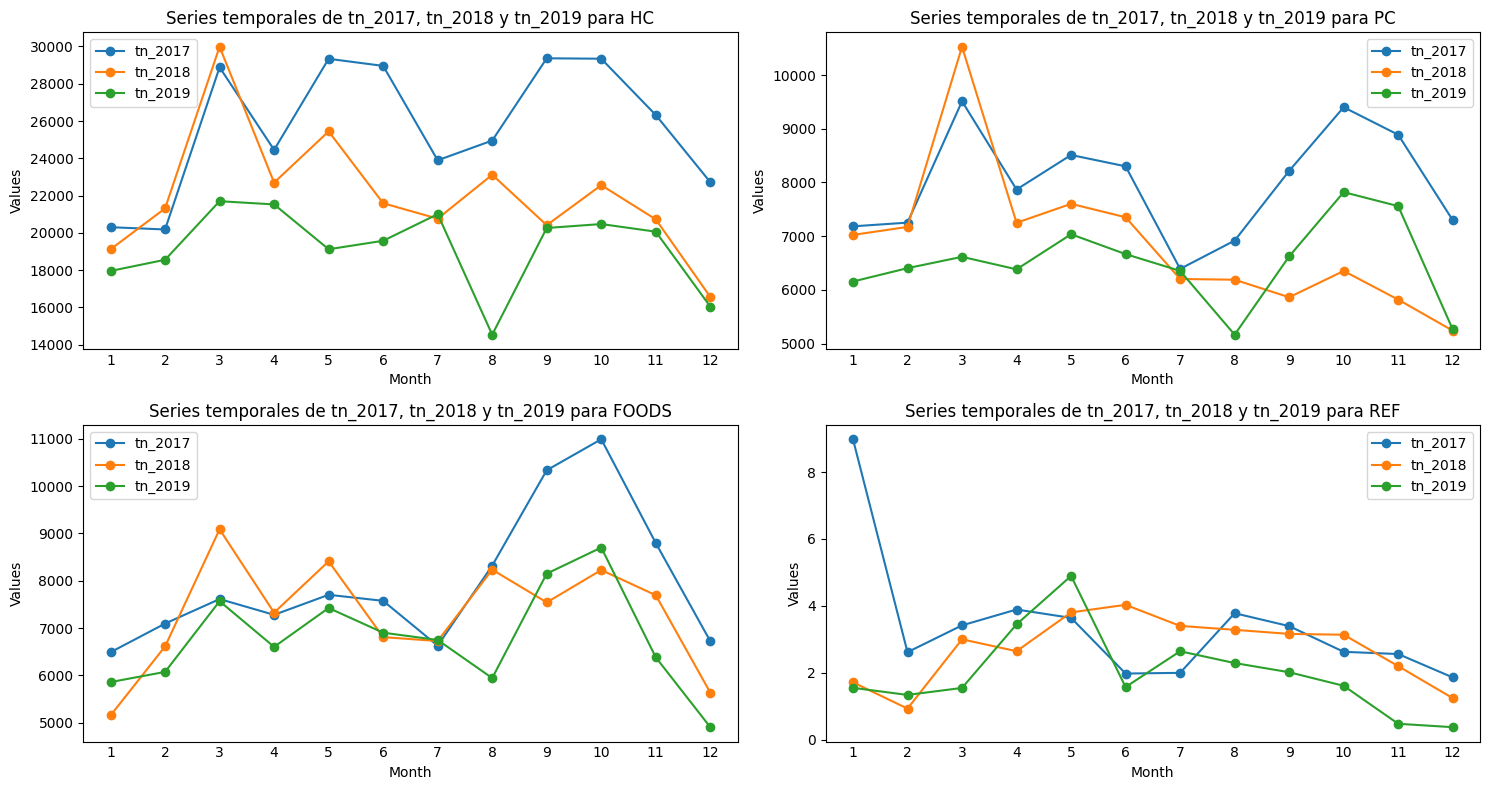

In [39]:
# Define las categorías
categorias = ["HC", "PC", "FOODS", "REF"]
fig, axs = plt.subplots(2, 2, figsize=(15, 8))

for i, categoria in enumerate(categorias):
    # Generar datos para cada categoría y año
    tn_2017 = toneladas_feature_mes(df, year=2017, feature_grouped="cat1", categoria=categoria)
    tn_2018 = toneladas_feature_mes(df, year=2018, feature_grouped="cat1", categoria=categoria)
    tn_2019 = toneladas_feature_mes(df, year=2019, feature_grouped="cat1", categoria=categoria)

    # Combinar los datos en un solo DataFrame
    month_data = pd.merge(pd.merge(tn_2017, tn_2018, on='month'), tn_2019, on='month')

    # Seleccionar el eje correspondiente
    ax = axs[i // 2, i % 2]

    # Graficar cada serie
    ax.plot(range(len(month_data['month'])), month_data['tn_2017'], marker='o', label='tn_2017')
    ax.plot(range(len(month_data['month'])), month_data['tn_2018'], marker='o', label='tn_2018')
    ax.plot(range(len(month_data['month'])), month_data['tn_2019'], marker='o', label='tn_2019')

    # Añadir título y etiquetas
    ax.set_title(f'Series temporales de tn_2017, tn_2018 y tn_2019 para {categoria}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Values')

    # Añadir leyenda
    ax.legend()

    # Asegurarse de que todas las etiquetas del eje X se muestren correctamente
    ax.set_xticks(range(len(month_data['month'])))
    ax.set_xticklabels(month_data['month'])

    # Mover las etiquetas del eje X para que estén centradas
    plt.setp(ax.get_xticklabels(), rotation=0, ha='center')

    # Ajustar las posiciones de los ticks
    ax.tick_params(axis='x', which='both', length=0)
    ax.set_xlim(-0.5, len(month_data['month']) - 0.5)

# Ajustar el layout
plt.tight_layout()

# Mostrar la gráfica
plt.show()

Observaciones:
- Para FOODS se ve incremento de ventas en octubre. Salvo 2018 que tiene comportamiento erratico, de septiembre a octubre hay un pico de ventas. En noviembre, diciembre, enero y febrero hay una clara caída.
- PC y HC parecen tener pico de ventas en marzo. PC también presenta pico en octubre

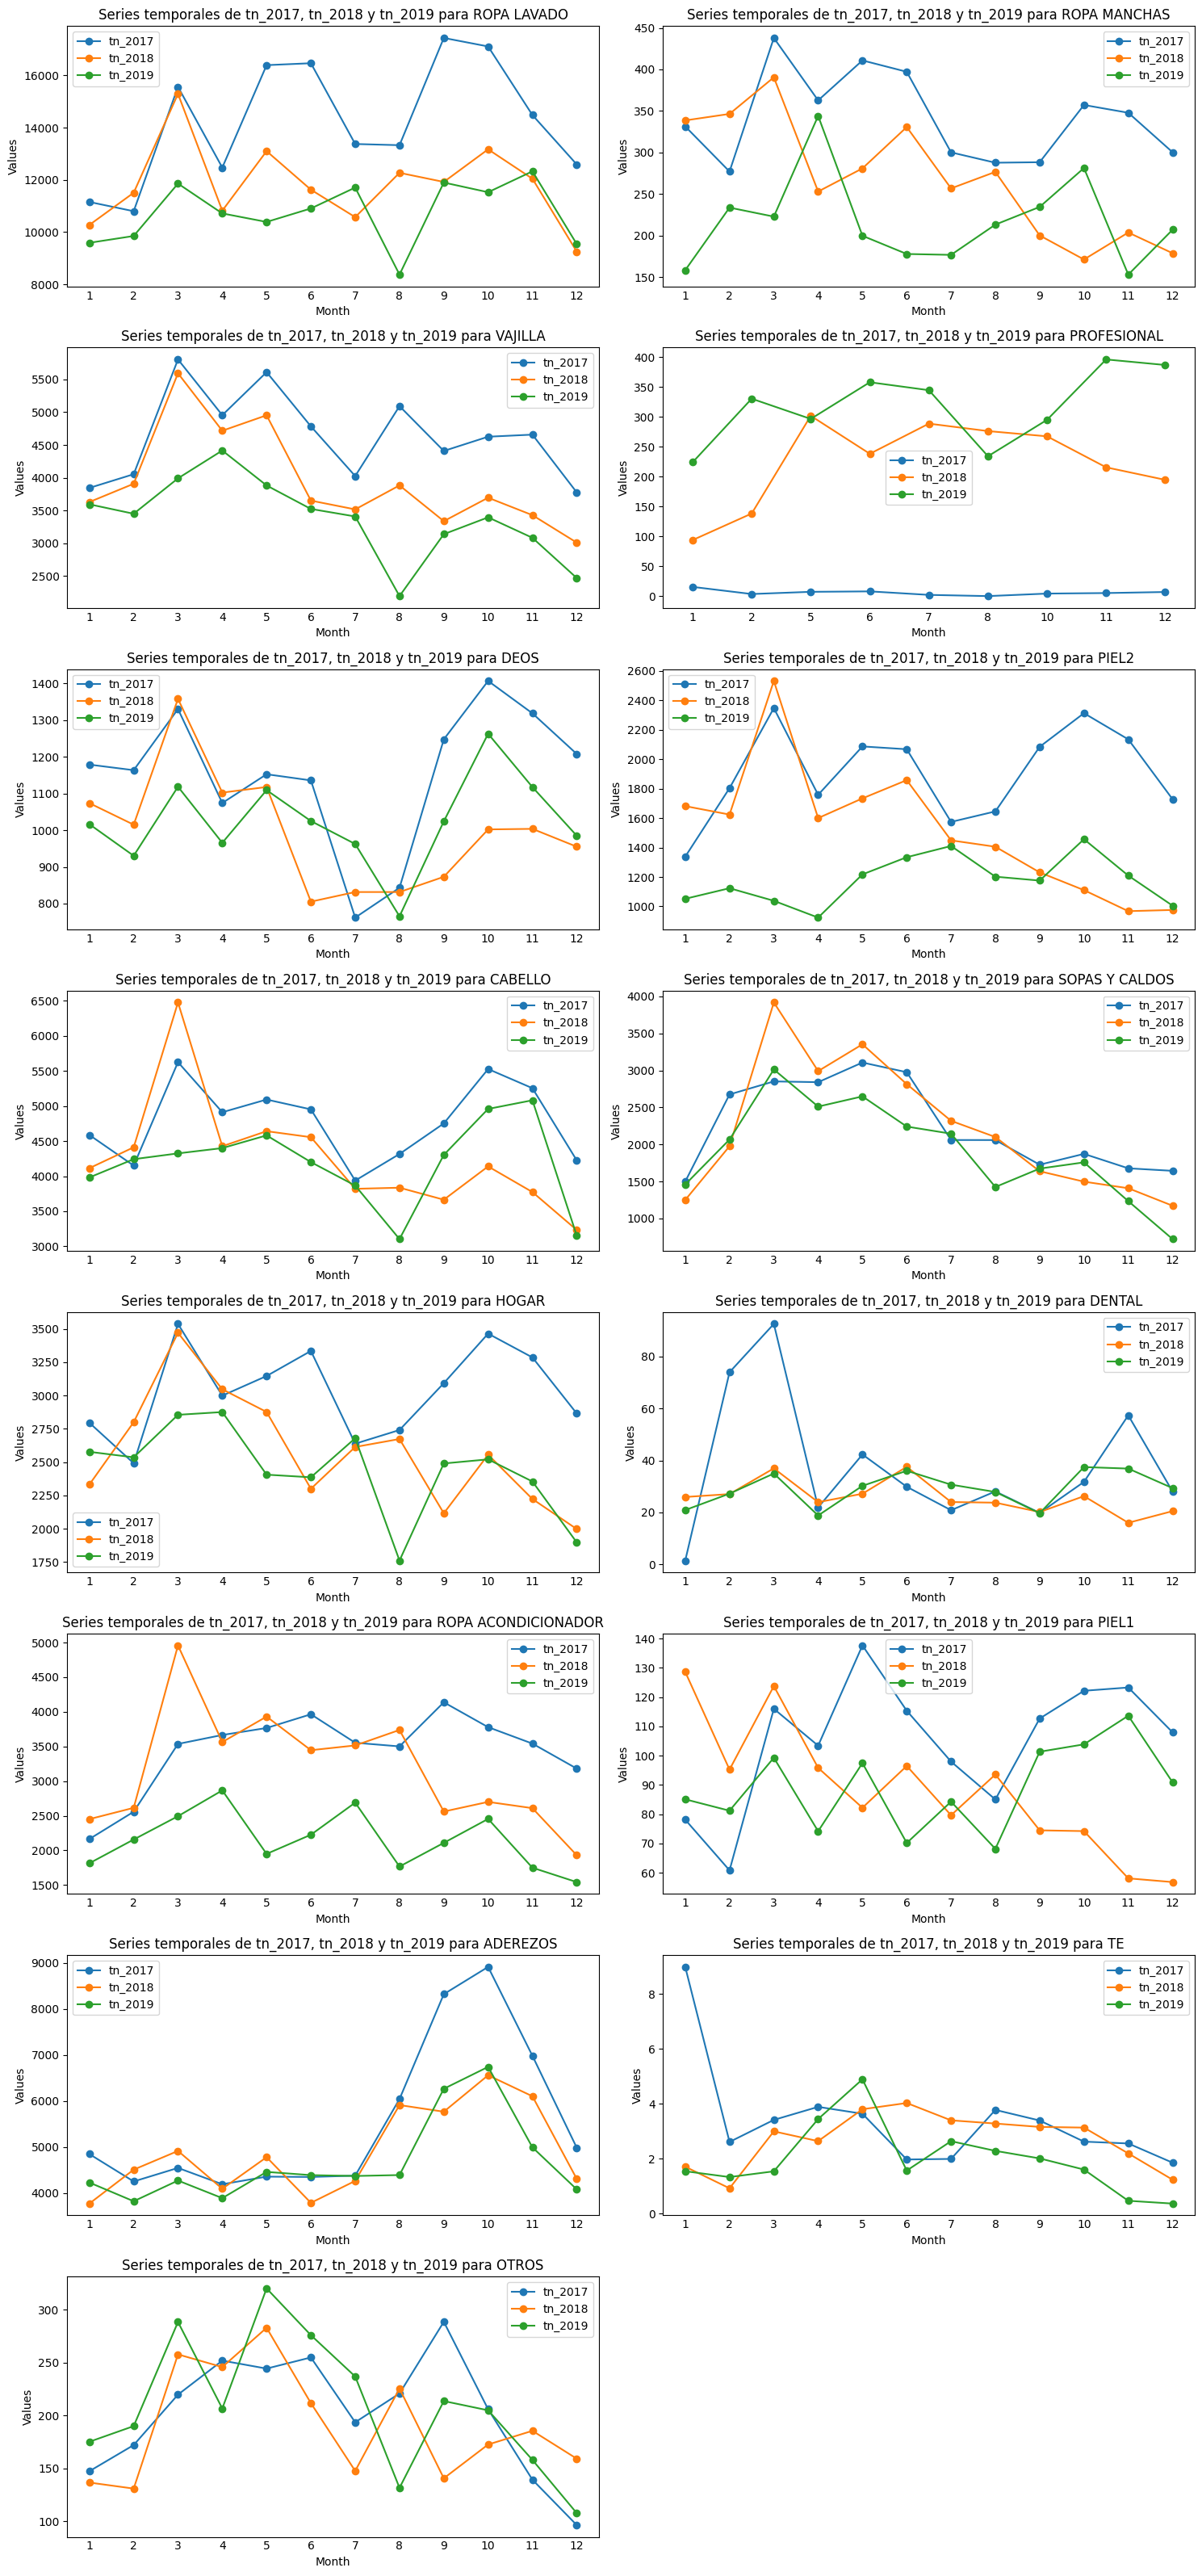

In [40]:
# Obtener las categorías únicas de cat2
categorias = producto['cat2'].drop_duplicates().to_list()

# Crear una figura con una disposición ajustable según el número de categorías
num_categorias = len(categorias)
num_cols = 2
num_rows = (num_categorias + 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))

# Flatten axs array if more than 1 row
if num_rows > 1:
    axs = axs.flatten()
else:
    axs = [axs]

for i, categoria in enumerate(categorias):
    # Generar datos para cada categoría y año
    tn_2017 = toneladas_feature_mes(df, year=2017, feature_grouped="cat2", categoria=categoria)
    tn_2018 = toneladas_feature_mes(df, year=2018, feature_grouped="cat2", categoria=categoria)
    tn_2019 = toneladas_feature_mes(df, year=2019, feature_grouped="cat2", categoria=categoria)

    # Combinar los datos en un solo DataFrame
    month_data = pd.merge(pd.merge(tn_2017, tn_2018, on='month'), tn_2019, on='month')

    # Seleccionar el eje correspondiente
    ax = axs[i]

    # Graficar cada serie
    ax.plot(range(len(month_data['month'])), month_data['tn_2017'], marker='o', label='tn_2017')
    ax.plot(range(len(month_data['month'])), month_data['tn_2018'], marker='o', label='tn_2018')
    ax.plot(range(len(month_data['month'])), month_data['tn_2019'], marker='o', label='tn_2019')

    # Añadir título y etiquetas
    ax.set_title(f'Series temporales de tn_2017, tn_2018 y tn_2019 para {categoria}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Values')

    # Añadir leyenda
    ax.legend()

    # Asegurarse de que todas las etiquetas del eje X se muestren correctamente
    ax.set_xticks(range(len(month_data['month'])))
    ax.set_xticklabels(month_data['month'])

    # Mover las etiquetas del eje X para que estén centradas
    plt.setp(ax.get_xticklabels(), rotation=0, ha='center')

    # Ajustar las posiciones de los ticks
    ax.tick_params(axis='x', which='both', length=0)
    ax.set_xlim(-0.5, len(month_data['month']) - 0.5)

# Eliminar subplots vacíos si hay alguno
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Ajustar el layout
plt.tight_layout()

# Mostrar la gráfica
plt.show()

Observaciones:
- Para muchos grupos de productos no se aprecia estacionalidad.
- Grupo de producto DEOS (PC) tiene marcada estacionalidad. Caída de ventas en invierno; pico en marzo y octubre
- Grupo SOPAS Y CALDOS (FOODS) tiene aumento de ventas desde enero a marzo (pico) y caída para los meses subsiguientes
- Grupo ADEREZOS (FOODS) tiene pico de ventas en octubre

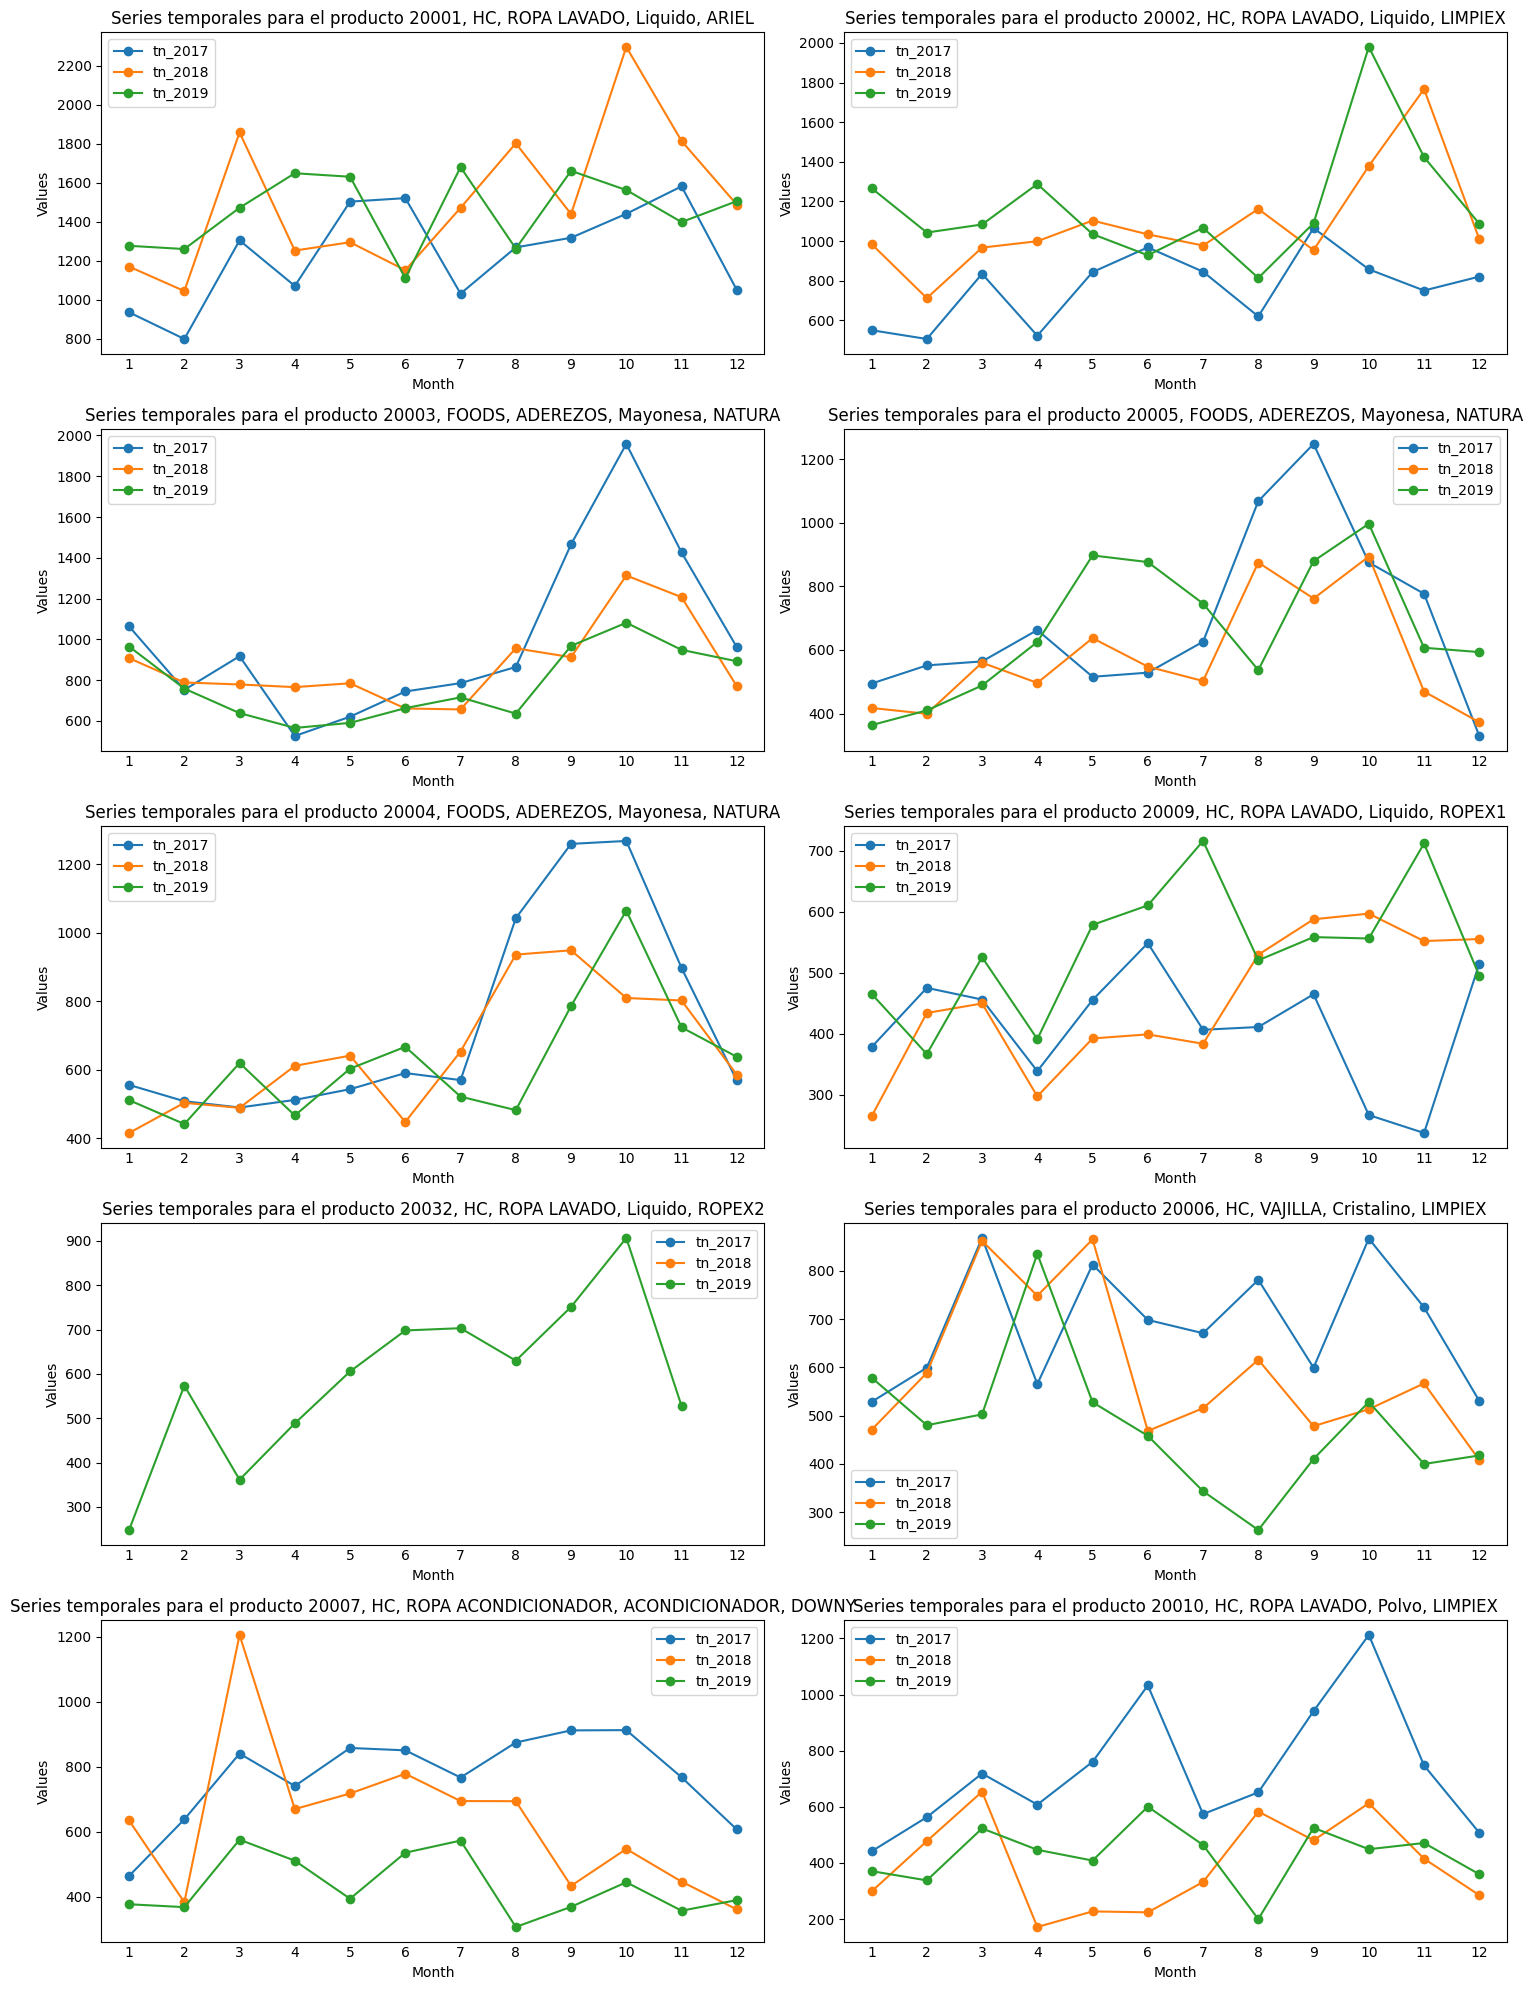

In [41]:
# Lista de productos importantes (GRANDES EN TN)
top_10_sku = df_2019.groupby(["product_id"])["tn"].sum().reset_index().sort_values(by="tn", ascending=False).head(10)["product_id"].tolist()
top_sku = top_10_sku

# Crear una figura con una disposición ajustable según el número de productos
num_productos = len(top_sku)
num_cols = 2
num_rows = (num_productos + 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))

# Flatten axs array if more than 1 row
if num_rows > 1:
    axs = axs.flatten()
else:
    axs = [axs]

for i, product in enumerate(top_sku):
    # Filtrar los datos para cada producto
    product_data = df[df['product_id'] == product]
    cat1 = product_data.cat1.unique()[0]
    cat2 = product_data.cat2.unique()[0]
    cat3 = product_data.cat3.unique()[0]
    brand = product_data.brand.unique()[0]
    
    # Generar datos para cada año
    tn_2017 = product_data[product_data['periodo'].dt.year == 2017].groupby(['periodo'])['tn'].sum().reset_index()
    tn_2018 = product_data[product_data['periodo'].dt.year == 2018].groupby(['periodo'])['tn'].sum().reset_index()
    tn_2019 = product_data[product_data['periodo'].dt.year == 2019].groupby(['periodo'])['tn'].sum().reset_index()
    tn_2017["month"] = tn_2017['periodo'].dt.month
    tn_2018["month"] = tn_2018['periodo'].dt.month
    tn_2019["month"] = tn_2019['periodo'].dt.month

    # Seleccionar el eje correspondiente
    ax = axs[i]

    # Graficar cada serie
    ax.plot(range(len(tn_2017['month'])), tn_2017['tn'], marker='o', label='tn_2017')
    ax.plot(range(len(tn_2018['month'])), tn_2018['tn'], marker='o', label='tn_2018')
    ax.plot(range(len(tn_2019['month'])), tn_2019['tn'], marker='o', label='tn_2019')

    # Añadir título y etiquetas
    ax.set_title(f'Series temporales para el producto {product}, {cat1}, {cat2}, {cat3}, {brand}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Values')

    # Añadir leyenda
    ax.legend()

    # Asegurarse de que todas las etiquetas del eje X se muestren correctamente
    ax.set_xticks(range(len(month_data['month'])))
    ax.set_xticklabels(month_data['month'])

    # Mover las etiquetas del eje X para que estén centradas
    plt.setp(ax.get_xticklabels(), rotation=0, ha='center')

    # Ajustar las posiciones de los ticks
    ax.tick_params(axis='x', which='both', length=0)
    ax.set_xlim(-0.5, len(month_data['month']) - 0.5)

# Eliminar subplots vacíos si hay alguno
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Ajustar el layout
plt.tight_layout()

# Mostrar la gráfica
plt.show()

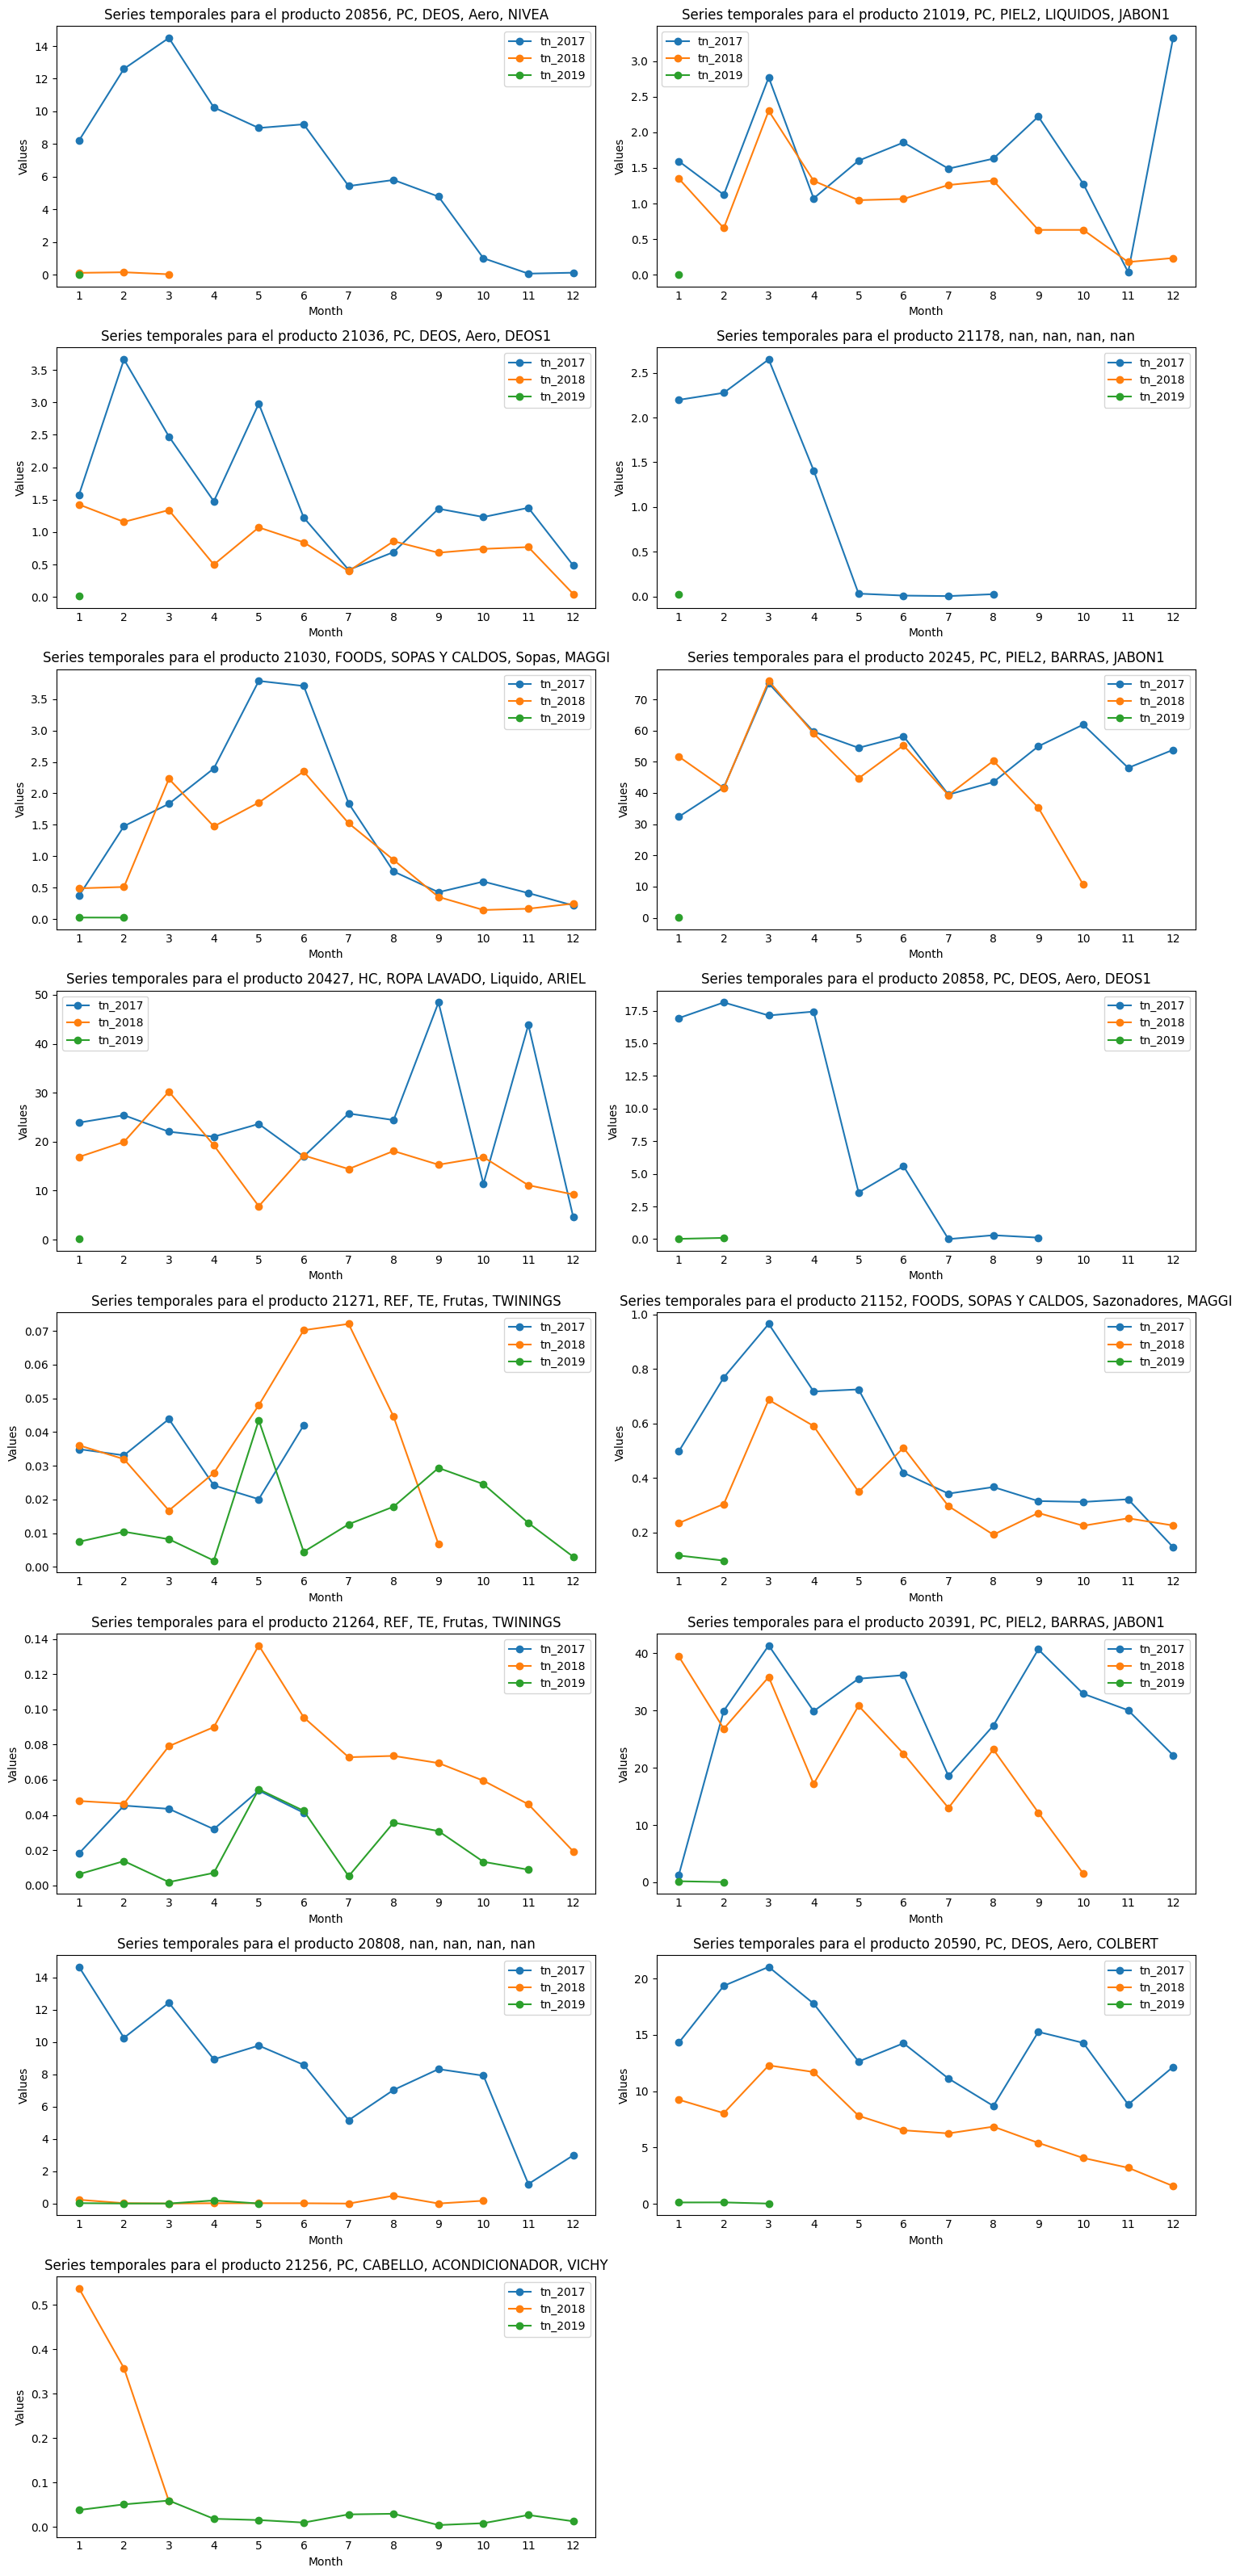

In [42]:
# Lista de productos PEQUEÑOS (CHICOS EN TN)
top_10_sku_small = df_2019.groupby(["product_id"])["tn"].sum().reset_index().sort_values(by="tn", ascending=True).head(15)["product_id"].tolist()
top_sku = top_10_sku_small

# Crear una figura con una disposición ajustable según el número de productos
num_productos = len(top_sku)
num_cols = 2
num_rows = (num_productos + 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))

# Flatten axs array if more than 1 row
if num_rows > 1:
    axs = axs.flatten()
else:
    axs = [axs]

for i, product in enumerate(top_sku):
    # Filtrar los datos para cada producto
    product_data = df[df['product_id'] == product]
    cat1 = product_data.cat1.unique()[0]
    cat2 = product_data.cat2.unique()[0]
    cat3 = product_data.cat3.unique()[0]
    brand = product_data.brand.unique()[0]
    
    # Generar datos para cada año
    tn_2017 = product_data[product_data['periodo'].dt.year == 2017].groupby(['periodo'])['tn'].sum().reset_index()
    tn_2018 = product_data[product_data['periodo'].dt.year == 2018].groupby(['periodo'])['tn'].sum().reset_index()
    tn_2019 = product_data[product_data['periodo'].dt.year == 2019].groupby(['periodo'])['tn'].sum().reset_index()
    tn_2017["month"] = tn_2017['periodo'].dt.month
    tn_2018["month"] = tn_2018['periodo'].dt.month
    tn_2019["month"] = tn_2019['periodo'].dt.month

    # Seleccionar el eje correspondiente
    ax = axs[i]

    # Graficar cada serie
    ax.plot(range(len(tn_2017['month'])), tn_2017['tn'], marker='o', label='tn_2017')
    ax.plot(range(len(tn_2018['month'])), tn_2018['tn'], marker='o', label='tn_2018')
    ax.plot(range(len(tn_2019['month'])), tn_2019['tn'], marker='o', label='tn_2019')

    # Añadir título y etiquetas
    ax.set_title(f'Series temporales para el producto {product}, {cat1}, {cat2}, {cat3}, {brand}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Values')

    # Añadir leyenda
    ax.legend()

    # Asegurarse de que todas las etiquetas del eje X se muestren correctamente
    ax.set_xticks(range(len(month_data['month'])))
    ax.set_xticklabels(month_data['month'])

    # Mover las etiquetas del eje X para que estén centradas
    plt.setp(ax.get_xticklabels(), rotation=0, ha='center')

    # Ajustar las posiciones de los ticks
    ax.tick_params(axis='x', which='both', length=0)
    ax.set_xlim(-0.5, len(month_data['month']) - 0.5)

# Eliminar subplots vacíos si hay alguno
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Ajustar el layout
plt.tight_layout()

# Mostrar la gráfica
plt.show()

#### 5) Analisis PRECIOS

In [43]:
def plan_precios_cuidados_mes(df, year):
    df = df[df['periodo'].dt.year == year].groupby(['periodo'])['plan_precios_cuidados'].apply(lambda x: (x == 1).sum() / len(x) * 100).reset_index()
    df["month"] = df['periodo'].dt.month
    df = df.drop(columns = "periodo")
    df = df.rename(columns = {"plan_precios_cuidados": f"prop_items_plan_{year}"})
    df = df[["month", f"prop_items_plan_{year}"]]
    return df 

In [44]:
# Proporción de productos en el plan de precios cuidados por mes y por año
precios_cuidados_2019 = plan_precios_cuidados_mes(df, 2019)
precios_cuidados_2018 = plan_precios_cuidados_mes(df, 2018)
precios_cuidados_2017 = plan_precios_cuidados_mes(df, 2017)
pd.merge(pd.merge(precios_cuidados_2017, precios_cuidados_2018, how = "inner", on = "month"), precios_cuidados_2019, how = "inner", on = "month")


month  prop_items_plan_2017  prop_items_plan_2018  prop_items_plan_2019
0       1              1.534949              2.041897              0.797007
1       2              1.435517              1.838804              0.778003
2       3              1.545203              1.718679              0.822163
3       4              1.548825              1.787479              0.678506
4       5              0.688241              0.456034              0.731568
5       6              0.785076              0.487990              0.695173
6       7              0.669673              0.391160              1.276997
7       8              0.718647              0.419958              1.302165
8       9              0.706563              0.485118              1.609665
9      10              2.450098              0.560214              1.633953
10     11              2.027115              0.648866              1.844968
11     12              1.982691              0.595730              1.769621

La proporción de items con plan precio cuidado no parece tener estacionalidad mensual. En particular en el último año 2019, la cantidad de productos con plan precios cuidados viene aumentando con el pasar de los meses.

In [45]:
# Proporción de productos en el plan de precios cuidados por categoria (año 2019)
proporcion_por_cat1 = df_2019.groupby(['cat1'])['plan_precios_cuidados'].apply(lambda x: (x == 1).sum() / len(x) * 100)
print("Proporción de productos en el plan de precios cuidados para cada categoria general:")
print(proporcion_por_cat1)

Proporción de productos en el plan de precios cuidados para cada categoria general:
cat1
FOODS    0.466442
HC       1.467267
PC       1.206020
REF      6.002475
Name: plan_precios_cuidados, dtype: float64


In [46]:
# Proporción de productos en el plan de precios cuidados por mes y por categoria
proporcion_por_tiempo_cat1 = df_2019.groupby(['periodo', 'cat1'])['plan_precios_cuidados'].apply(lambda x: (x == 1).sum() / len(x) * 100)
print("Proporción de productos en el plan de precios cuidados por mes del 2019 para cada categoria general:")
print(proporcion_por_tiempo_cat1)

Proporción de productos en el plan de precios cuidados por mes del 2019 para cada categoria general:
periodo     cat1 
2019-01-01  FOODS     0.000000
            HC        1.042238
            PC        0.883649
            REF      12.295082
2019-02-01  FOODS     0.000000
            HC        1.252079
            PC        0.797648
            REF      12.977099
2019-03-01  FOODS     0.000000
            HC        1.183058
            PC        0.922277
            REF      10.000000
2019-04-01  FOODS     0.000000
            HC        0.752693
            PC        0.833970
            REF      13.888889
2019-05-01  FOODS     0.000000
            HC        0.912301
            PC        0.924342
            REF       9.803922
2019-06-01  FOODS     0.000000
            HC        0.741218
            PC        0.864979
            REF      11.971831
2019-07-01  FOODS     0.000000
            HC        1.829120
            PC        1.485513
            REF       0.000000
2019-08-01  F

En al año 2019, la categoría con mayor cantidad de productos en el plan de precios cuidados es REF. Sin embargo, si se apertura por mes, puede verse que en el mes de julio y hasta diciembre no tiene ningún producto en el plan.

In [47]:
# Proporción de productos en el plan de precios cuidados por grupo de producto (año 2019)
proporcion_por_cat2 = df_2019.groupby(['cat2'])['plan_precios_cuidados'].apply(lambda x: (x == 1).sum() / len(x) * 100)
print("Proporción de productos en el plan de precios cuidados para cada grupo de producto:")
print(proporcion_por_cat2)

Proporción de productos en el plan de precios cuidados para cada grupo de producto:
cat2
ADEREZOS               0.675526
CABELLO                0.000000
DENTAL                 0.000000
DEOS                   3.322489
HOGAR                  2.447096
OTROS                  0.000000
PIEL1                  0.845514
PIEL2                  0.615006
PROFESIONAL            0.000000
ROPA ACONDICIONADOR    0.000000
ROPA LAVADO            1.329123
ROPA MANCHAS           0.000000
SOPAS Y CALDOS         0.381123
TE                     6.002475
VAJILLA                1.062487
Name: plan_precios_cuidados, dtype: float64


Se condice con resultado anterior. TE (categoria REF) tiene mayor proporción de precios cuidados

In [48]:
# Proporción de productos en el plan de precios cuidados por marca (año 2019)
proporcion_por_marca = df_2019.groupby(['brand'])['plan_precios_cuidados'].apply(lambda x: (x == 1).sum() / len(x) * 100)
print("Proporción de productos en el plan de precios cuidados para marca:")
print(proporcion_por_marca)

Proporción de productos en el plan de precios cuidados para marca:
brand
ARIEL          0.000000
AYUDIN         2.259227
CAPILATIS      0.000000
COLBERT        6.786610
COLGATE        0.000000
DEOS1          3.889380
DEOS2          0.000000
DEOS3          0.000000
DOWNY          0.000000
ESPADOL        0.000000
FRANCIA        0.000000
GOMINA         0.000000
HARINAMA       0.000000
INDUSTRIAL     0.000000
Importado      0.000000
JABON1         0.000000
LANCOME        1.118659
LIMPIEX        2.368308
MAGGI          0.425330
MAGGI2         0.000000
MAJESTA        6.646903
MAYOS3         0.000000
MOSTAZA1       0.000000
MUSCULO        1.328016
NATURA         0.000000
NIVEA          0.000000
OFF           38.418708
ROPEX1         0.000000
ROPEX2         0.000000
SALSATI        0.000000
SHAMPOO1       0.000000
SHAMPOO2       0.000000
SHAMPOO3       0.000000
SKIN1          0.000000
TWININGS       6.002475
VICHY          0.000000
VIVERE         0.000000
Name: plan_precios_cuidados, dtype: flo

Grupo OFF tiene mayor proporción de productos en plan precios cuidados, seguido por COBERT y TWININGS. 
Llama la atención que ARIEL, que contiene muchos de los productos más vendido en toneladas, no tiene plan precios cuidados.

In [49]:
df_2019[df_2019.product_id.isin(top_10_sku)].groupby(['product_id', 'cat1', 'cat2', 'cat3', 'brand'])['plan_precios_cuidados'].apply(lambda x: (x == 1).sum() / len(x) * 100).reset_index()

product_id   cat1                 cat2            cat3    brand   
0       20001     HC          ROPA LAVADO         Liquido    ARIEL  \
1       20002     HC          ROPA LAVADO         Liquido  LIMPIEX   
2       20003  FOODS             ADEREZOS        Mayonesa   NATURA   
3       20004  FOODS             ADEREZOS        Mayonesa   NATURA   
4       20005  FOODS             ADEREZOS        Mayonesa   NATURA   
5       20006     HC              VAJILLA      Cristalino  LIMPIEX   
6       20007     HC  ROPA ACONDICIONADOR  ACONDICIONADOR    DOWNY   
7       20009     HC          ROPA LAVADO         Liquido   ROPEX1   
8       20010     HC          ROPA LAVADO           Polvo  LIMPIEX   
9       20032     HC          ROPA LAVADO         Liquido   ROPEX2   

   plan_precios_cuidados  
0                    0.0  
1                    0.0  
2                    0.0  
3                    0.0  
4                    0.0  
5                    0.0  
6                    0.0  
7                    0.0  
8                    0.0  
9                    0.0

El top 10 productos en tn no pertenece al plan de precios cuidados

#### 6) Analisis OTRAS VARIABLES: interrelación (último año=)

In [50]:
df_2019[["cust_request_qty", "cust_request_tn", "stock_final"]].describe()

cust_request_qty  cust_request_tn    stock_final
count     910480.000000    910480.000000  909259.000000
mean           2.126576         0.438447      25.875143
std            3.502958         3.286137      75.467444
min            1.000000         0.000100     -27.311360
25%            1.000000         0.009480       1.624900
50%            1.000000         0.035380       6.745720
75%            2.000000         0.145850      21.763520
max           90.000000       551.561370    1562.024480

Text(0.5, 1.0, 'Correlograma series de tiempo')

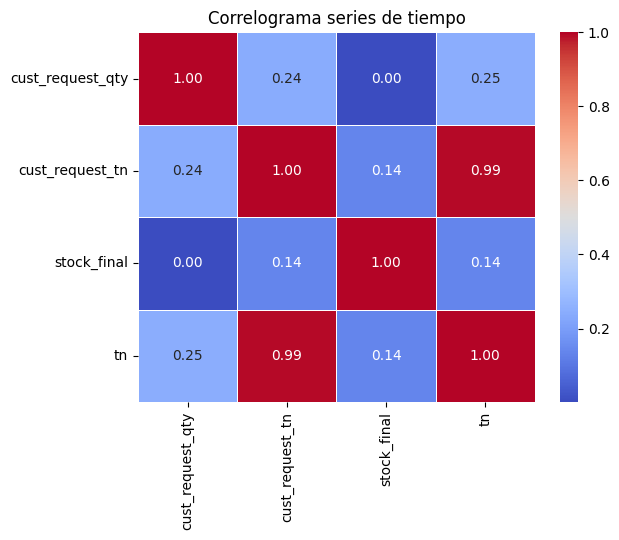

In [51]:
correlation_matrix = df_2019[["cust_request_qty", "cust_request_tn", "stock_final", "tn"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlograma series de tiempo")

Notar que el stock y la venta no están tan correlacionados. Las cantidades solicitadas y liquidadas si están muy correlacionadas. Podemos ver si en general hay un producto en donde la diferencia entre solicitado y liquidado sea mayor.

In [70]:
dif_liq_sol = df_2019.groupby(["product_id"]).agg({"cust_request_tn":"sum", "tn": "sum"}).reset_index()
dif_liq_sol["dif"] = ((dif_liq_sol.cust_request_tn - dif_liq_sol.tn)/dif_liq_sol.tn)*100
dif_liq_sol.sort_values(by="dif")

product_id  cust_request_tn        tn        dif
958        21064         15.88173  17.26027  -7.986781
965        21075         15.19899  15.99309  -4.965269
906        20994          5.77333   5.96255  -3.173474
977        21099         11.92821  12.12346  -1.610514
949        21049          4.22321   4.28336  -1.404271
...          ...              ...       ...        ...
695        20737         36.22512  32.56211  11.249302
1082       21271          0.19656   0.17614  11.593051
567        20590          0.29876   0.26311  13.549466
137        20141          2.32377   1.62489  43.010912
238        20245          0.10647   0.06552  62.500000

[1084 rows x 4 columns]

In [71]:
print("Cantidad productos tn liquidadas > tn solicitadas: " + str(len(dif_liq_sol[dif_liq_sol.dif.round(1)<0].product_id.unique())))
print("Cantidad productos tn liquidadas = tn solicitadas: " + str(len(dif_liq_sol[dif_liq_sol.dif.round(1)==0].product_id.unique())))
print("Cantidad productos tn liquidadas < tn solicitadas: " + str(len(dif_liq_sol[dif_liq_sol.dif.round(1)>0].product_id.unique())))

Cantidad productos tn liquidadas > tn solicitadas: 94
Cantidad productos tn liquidadas = tn solicitadas: 375
Cantidad productos tn liquidadas < tn solicitadas: 615


In [72]:
dif_liq_sol.describe()
# En general la media es 0, liquidado = solicitado en promedio 

product_id  cust_request_tn            tn          dif
count   1084.000000      1084.000000   1084.000000  1084.000000
mean   20584.895756       368.262976    359.990560     0.771619
std      355.790111      1107.131197   1063.416129     2.660142
min    20001.000000         0.001090      0.001090    -7.986781
25%    20280.750000        15.185535     15.439823     0.000000
50%    20563.500000        65.204225     65.171480     0.173474
75%    20879.500000       230.488792    228.941397     0.905352
max    21276.000000     18501.220420  17456.792640    62.500000

#### 7) Series de tiempo

In [182]:
df.head(1)

periodo  customer_id  product_id  plan_precios_cuidados   
0 2017-01-01        10234       20524                      0  \

   cust_request_qty  cust_request_tn     tn  stock_final cat1     cat2   
0                 2            0.053  0.053          NaN   HC  VAJILLA  \

         cat3      brand  sku_size  
0  Cristalino  Importado     500.0

In [183]:
def plot_individual_product(df, time_series, product_ids):
    """
    Función para graficar la serie de tiempo de una lista de productos específicos.
    """
    plt.figure(figsize=(12, 3 * len(product_ids)))  # Ajustar el tamaño de la figura (ancho, alto)
    
    for i, product_id in enumerate(product_ids, start=1):
        product_data = df[df['product_id'] == product_id].groupby(["periodo", "product_id", "cat1", "cat2", "cat3", "brand", "sku_size"])["tn"].sum().reset_index()
        if product_data.empty:
            print(f"No se encontraron datos para el product_id '{product_id}'. Saltando...")
            continue
        
        title = f"Serie de tiempo de '{time_series}' para el producto '{product_id}'"
        if 'cat1' in df.columns and 'cat2' in df.columns and 'cat3' in df.columns and 'brand' in df.columns:
            cat1_val = product_data['cat1'].iloc[0]
            cat2_val = product_data['cat2'].iloc[0]
            cat3_val = product_data['cat3'].iloc[0]
            brand_val = product_data['brand'].iloc[0]
            title += f" - Cat1: {cat1_val}, Cat2: {cat2_val}, Cat3: {cat3_val}, Brand: {brand_val}"
        
        plt.subplot(len(product_ids), 1, i)
        plt.plot(product_data['periodo'], product_data[time_series])
        plt.title(title, fontsize=10)  # Reducir tamaño de la fuente del título
        plt.xlabel('Periodo', fontsize=8)  # Reducir tamaño de la fuente del eje x
        plt.ylabel(time_series, fontsize=8)  # Reducir tamaño de la fuente del eje y
        plt.xticks(fontsize=8)  # Reducir tamaño de la fuente de las marcas en el eje x
        plt.yticks(fontsize=8)  # Reducir tamaño de la fuente de las marcas en el eje y
        plt.grid(False)
    
    plt.tight_layout()  # Ajustar el diseño de la figura para que quepa todo
    plt.show()

def plot_category_all(df, time_series, group_by):
    """
    Función para graficar la serie de tiempo de todas las categorías disponibles.
    """
    categories = df[group_by].unique()
    for category in categories:
        category_data = df[df[group_by] == category]
        if category_data.empty:
            print(f"No se encontraron datos para la categoría '{category}'. Saltando...")
            continue

        # Agrupar los datos por 'periodo' y sumar las toneladas
        grouped_data = category_data.groupby('periodo')[time_series].sum().reset_index()

        title = f"Serie de tiempo de '{time_series}'"
        if group_by == 'cat1':
            if 'cat1' in df.columns:
                cat1_val = category_data['cat1'].iloc[0]
                title += f" - Cat1: {cat1_val}"
        elif group_by == 'cat2':
            if 'cat1' in df.columns and 'cat2' in df.columns:
                cat1_val = category_data['cat1'].iloc[0]
                cat2_val = category_data['cat2'].iloc[0]
                title += f" - Cat1: {cat1_val}, Cat2: {cat2_val}"
        elif group_by == 'cat3':
            if 'cat1' in df.columns and 'cat2' in df.columns and 'cat3' in df.columns:
                cat1_val = category_data['cat1'].iloc[0]
                cat2_val = category_data['cat2'].iloc[0]
                cat3_val = category_data['cat3'].iloc[0]
                title += f" - Cat1: {cat1_val}, Cat2: {cat2_val}, Cat3: {cat3_val}"
        elif group_by == 'brand':
            if 'brand' in df.columns:
                brand_val = category_data['brand'].iloc[0]
                title += f" - Brand: {brand_val}"

        plt.figure(figsize=(12, 3))  # Ajustar el tamaño de la figura (ancho, alto)
        plt.plot(grouped_data['periodo'], grouped_data[time_series], marker='o')
        plt.title(title, fontsize=10)  # Reducir tamaño de la fuente del título
        plt.xlabel('Periodo', fontsize=8)  # Reducir tamaño de la fuente del eje x
        plt.ylabel(time_series, fontsize=8)  # Reducir tamaño de la fuente del eje y
        plt.xticks(fontsize=8)  # Reducir tamaño de la fuente de las marcas en el eje x
        plt.yticks(fontsize=8)  # Reducir tamaño de la fuente de las marcas en el eje y
        plt.grid(False)
        plt.tight_layout()  # Ajustar el diseño de la figura para que quepa todo
        plt.show()

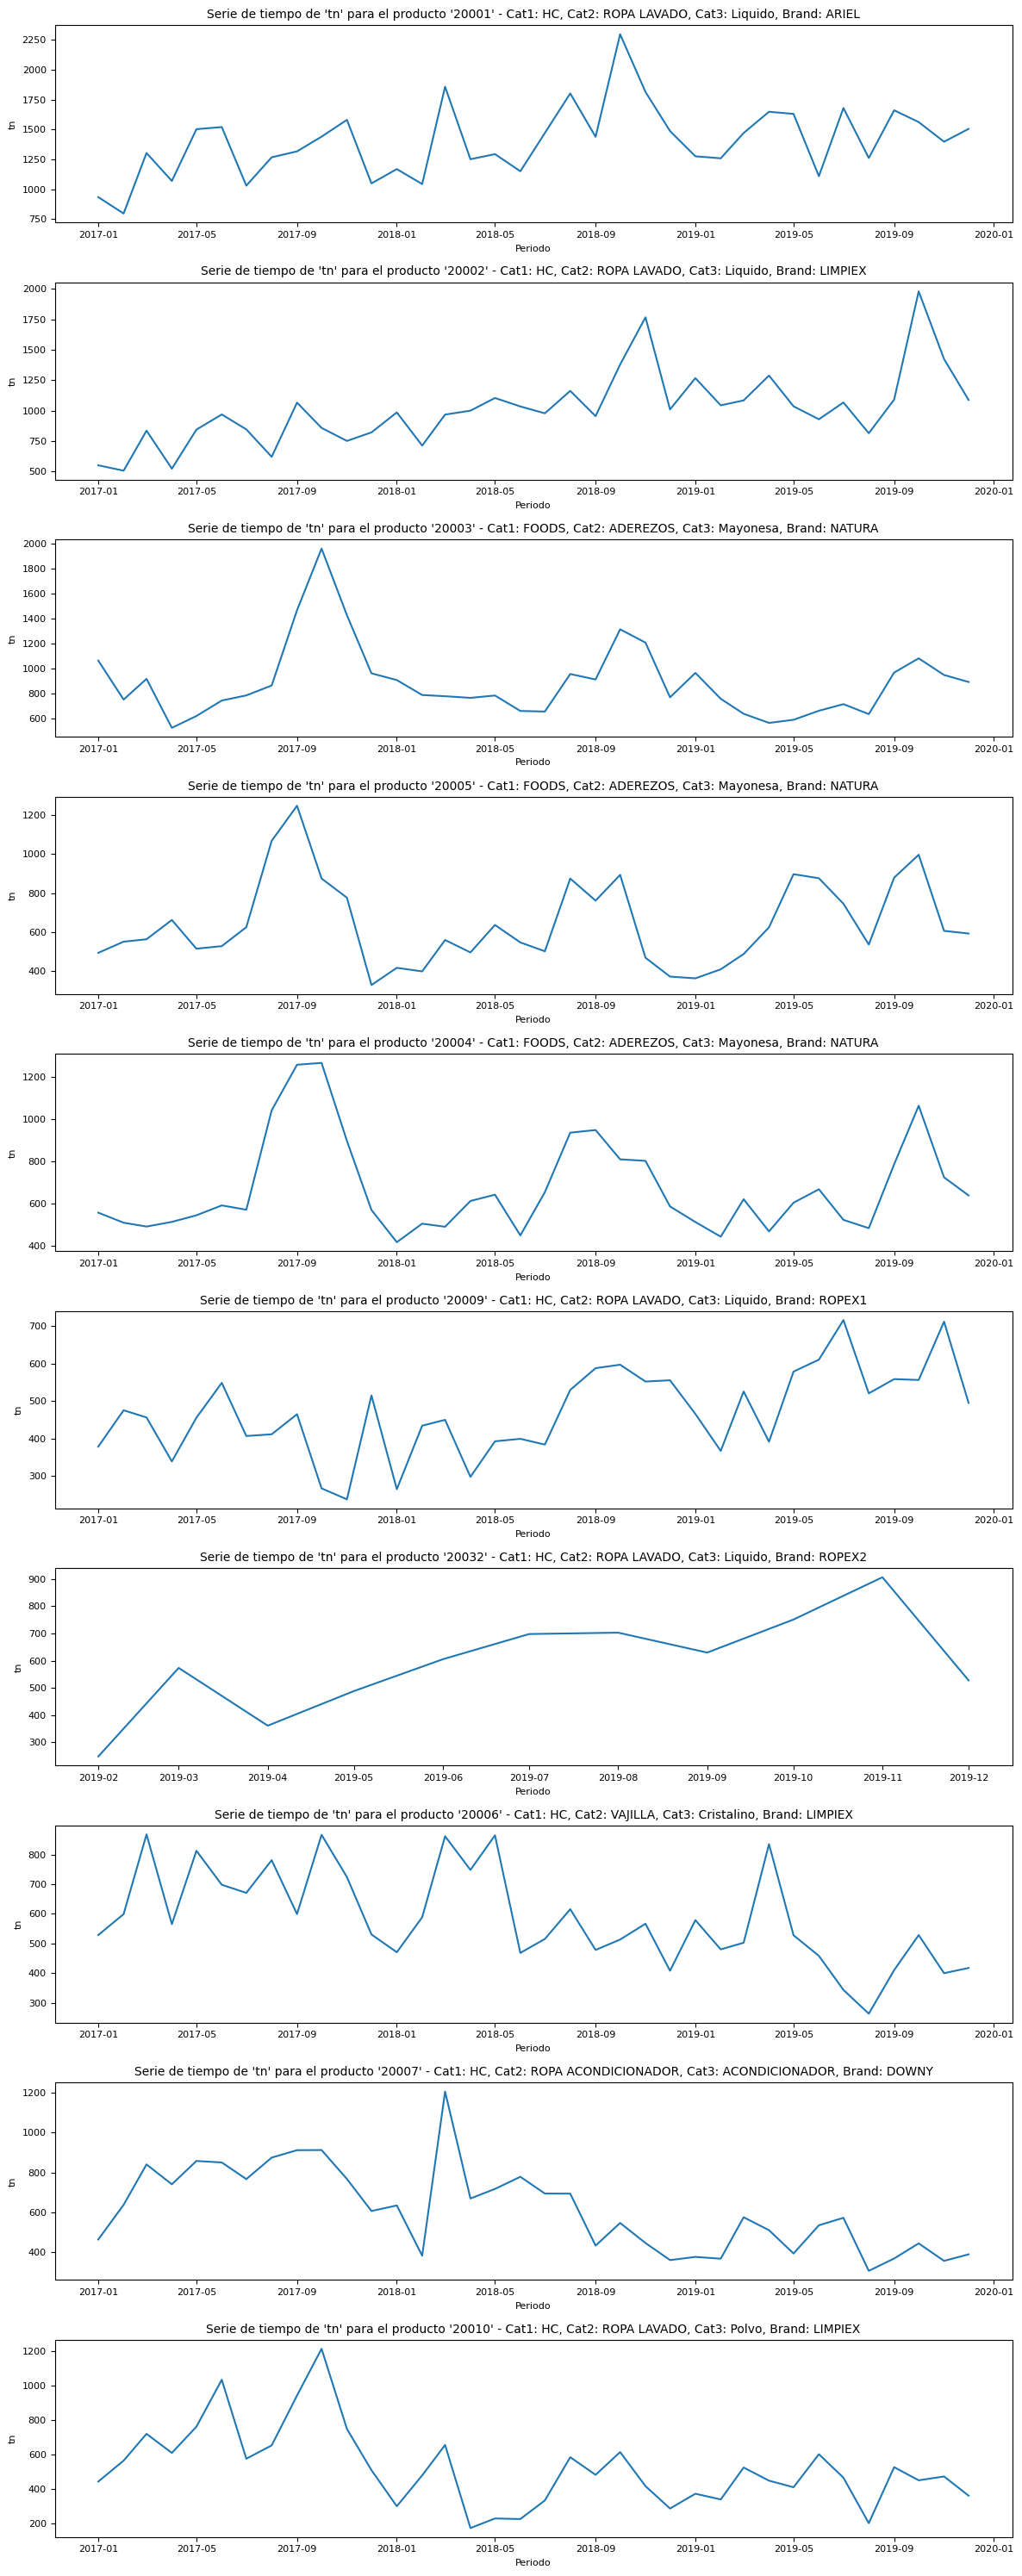

In [184]:
plot_individual_product(df, time_series = 'tn', product_ids = top_10_sku)

No se encontraron datos para el product_id '21178'. Saltando...
No se encontraron datos para el product_id '20808'. Saltando...


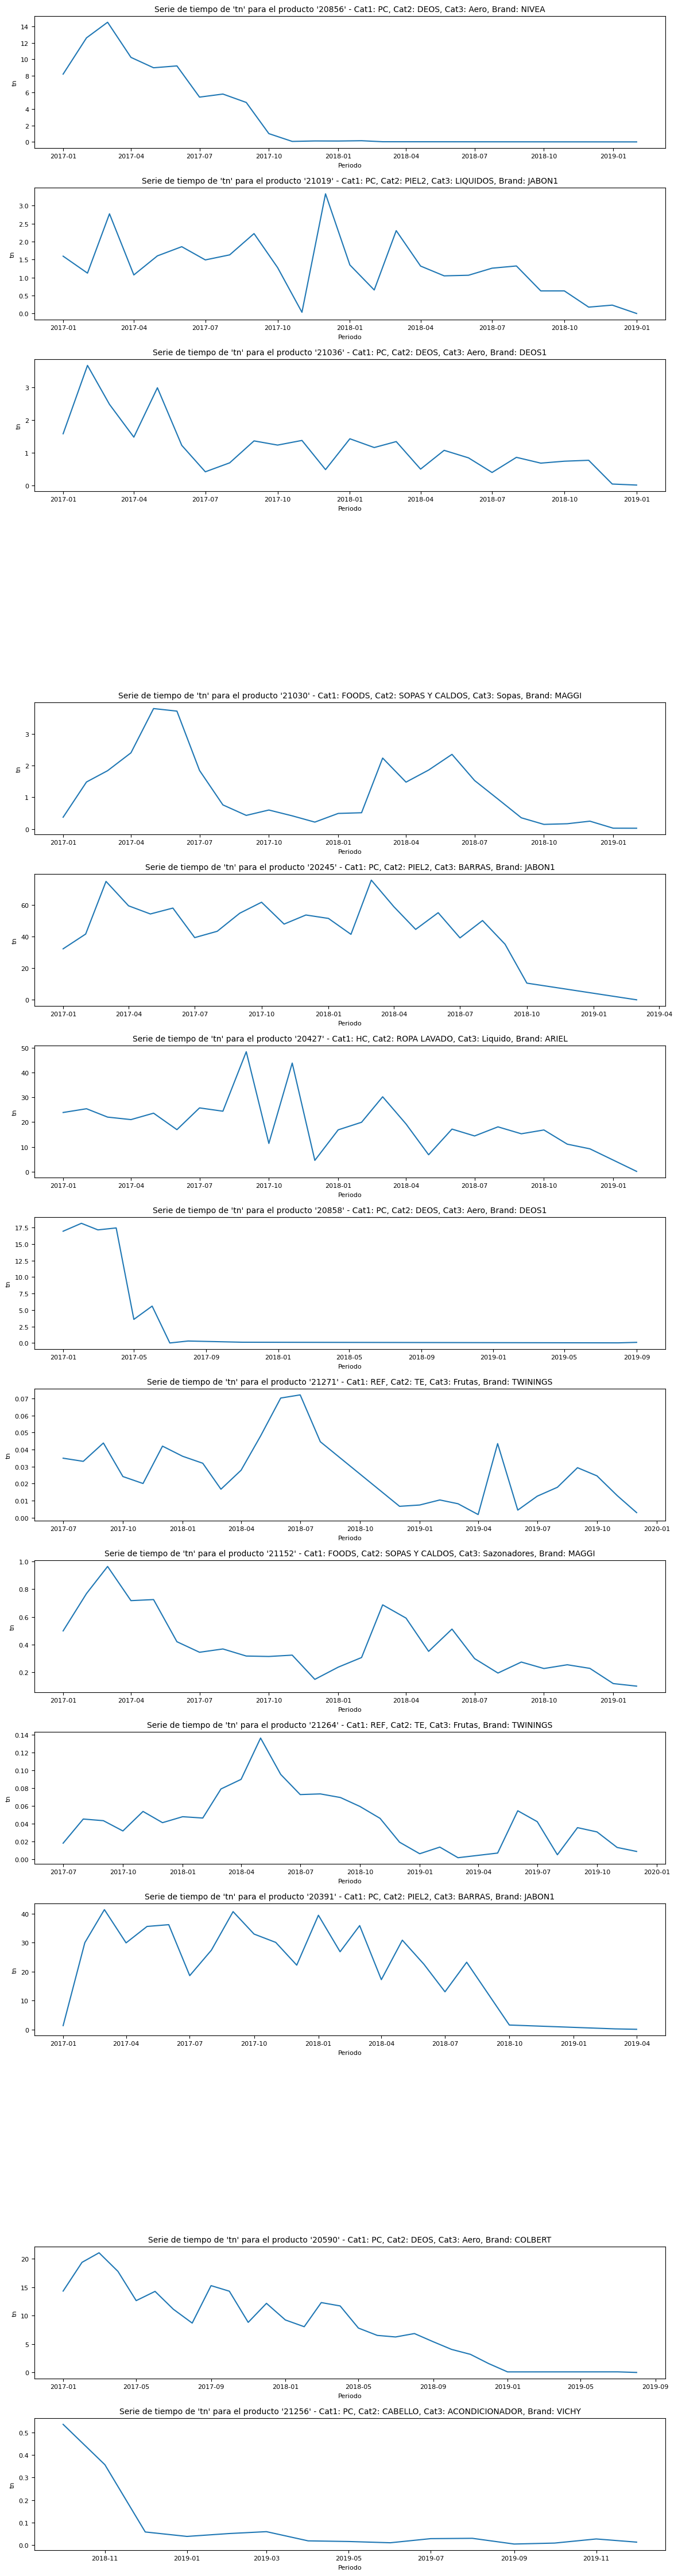

In [185]:
plot_individual_product(df, time_series = 'tn', product_ids = top_10_sku_small)

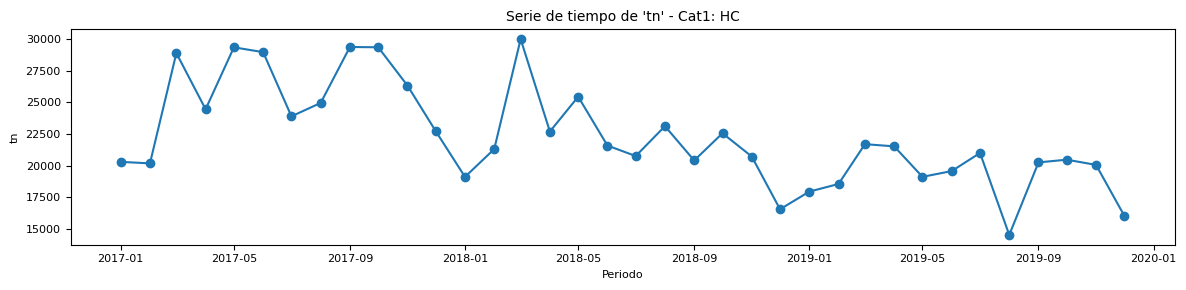

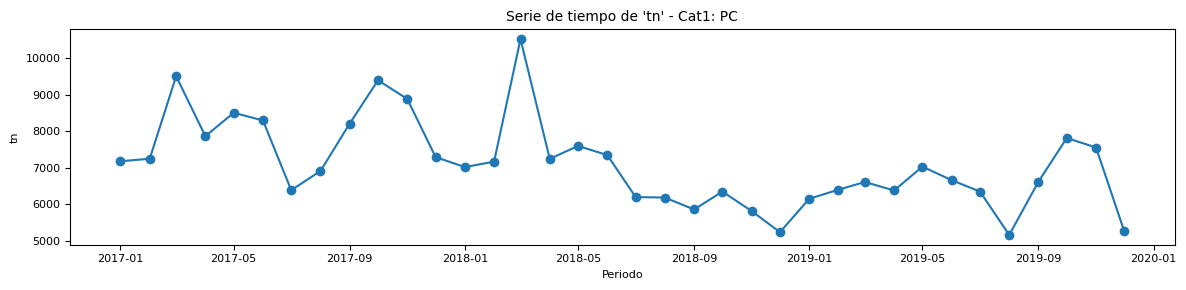

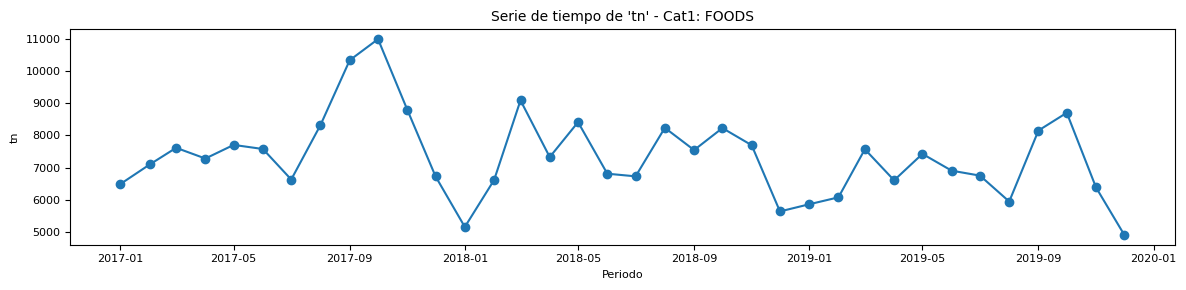

No se encontraron datos para la categoría 'nan'. Saltando...


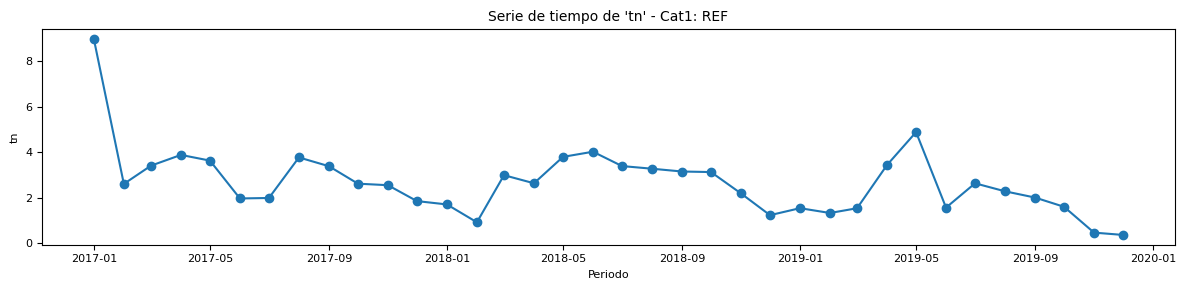

In [186]:
plot_category_all(df, time_series = 'tn', group_by= 'cat1')

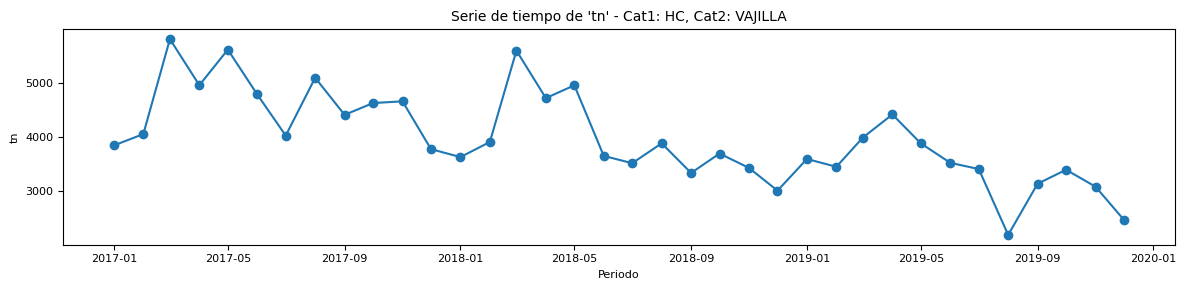

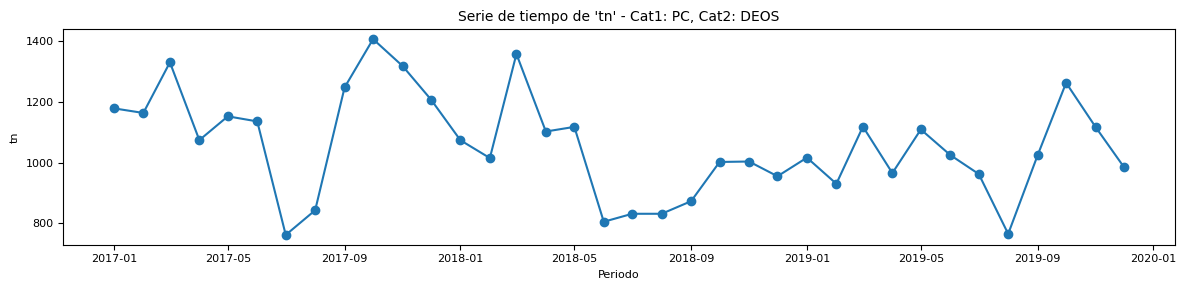

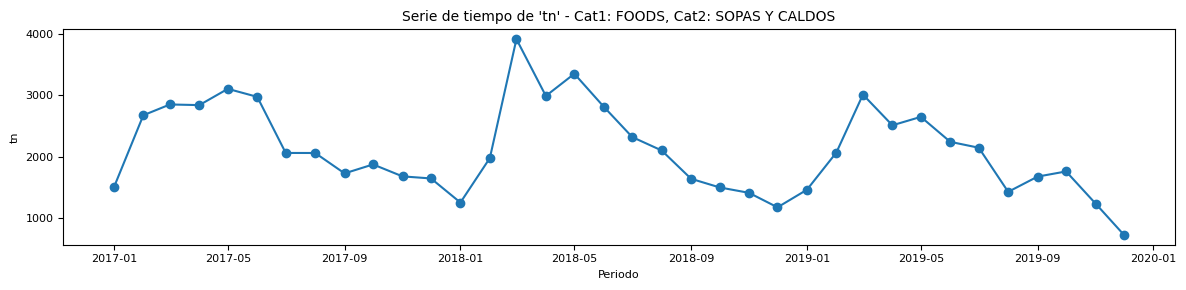

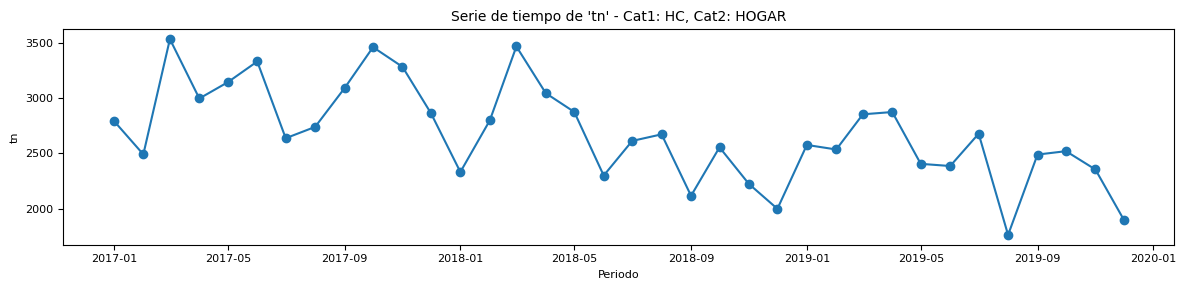

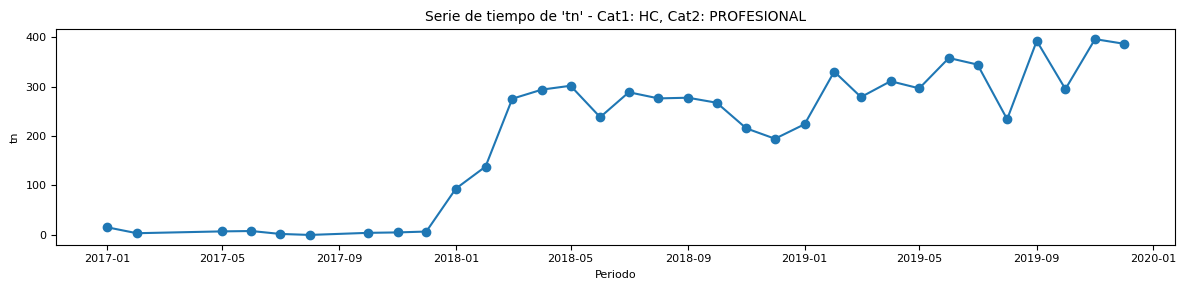

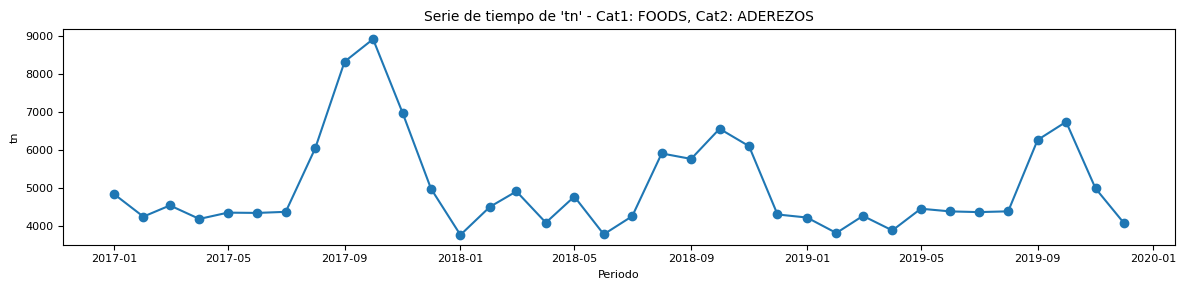

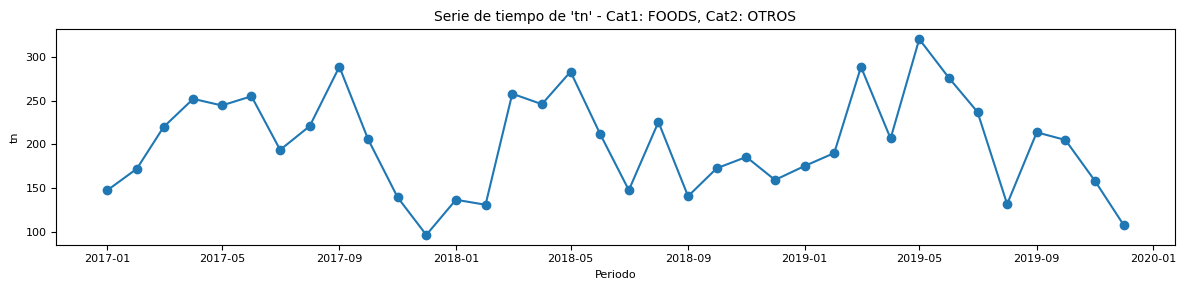

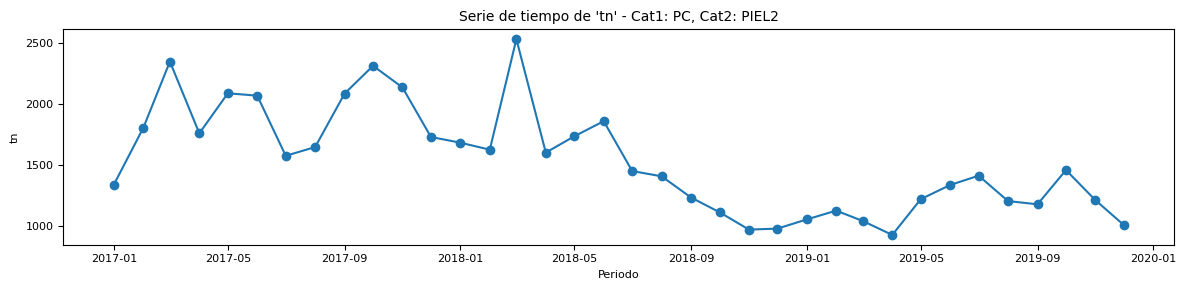

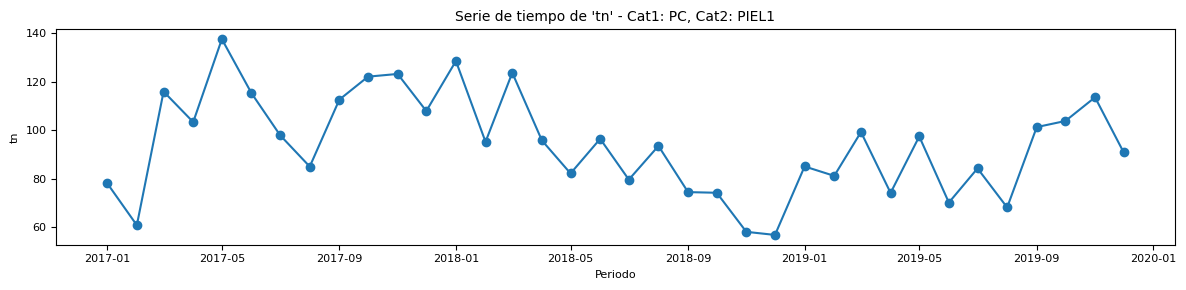

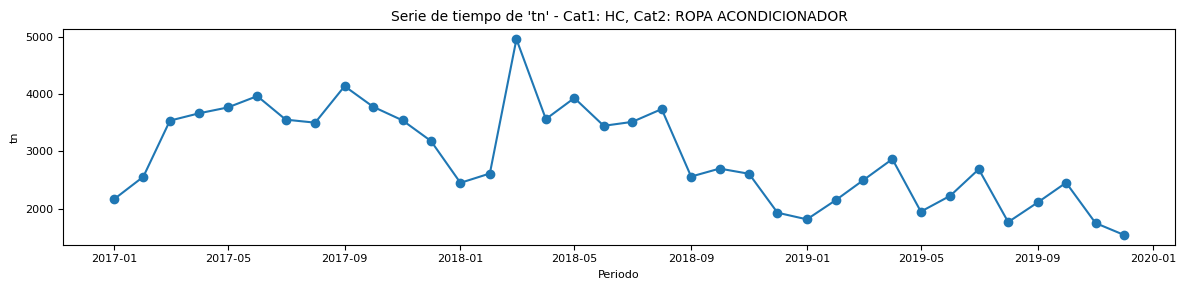

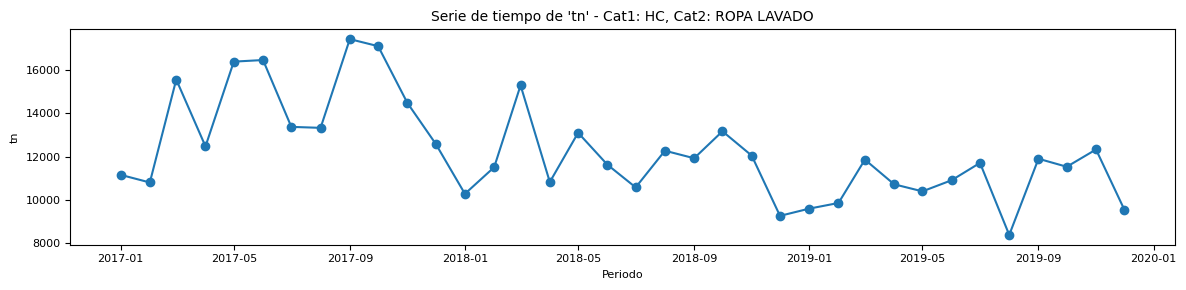

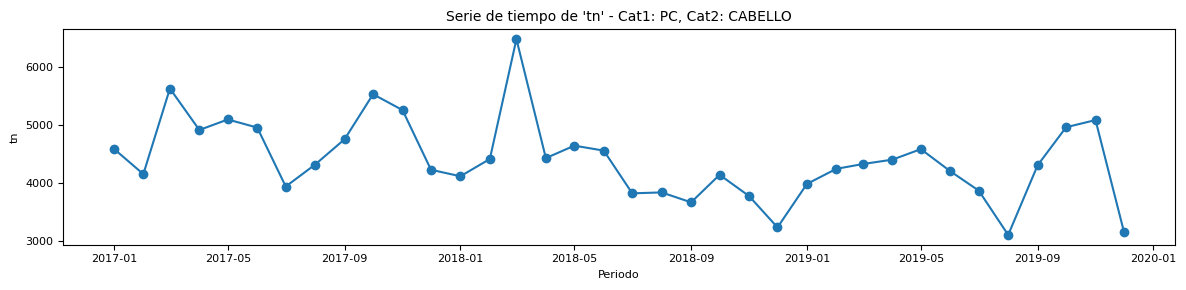

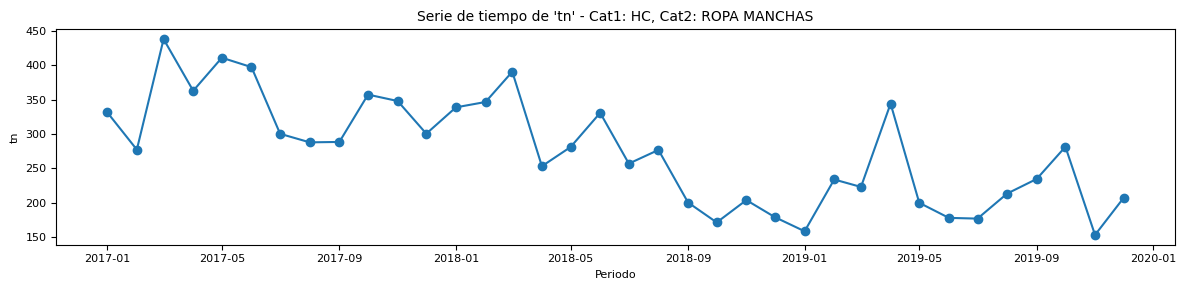

No se encontraron datos para la categoría 'nan'. Saltando...


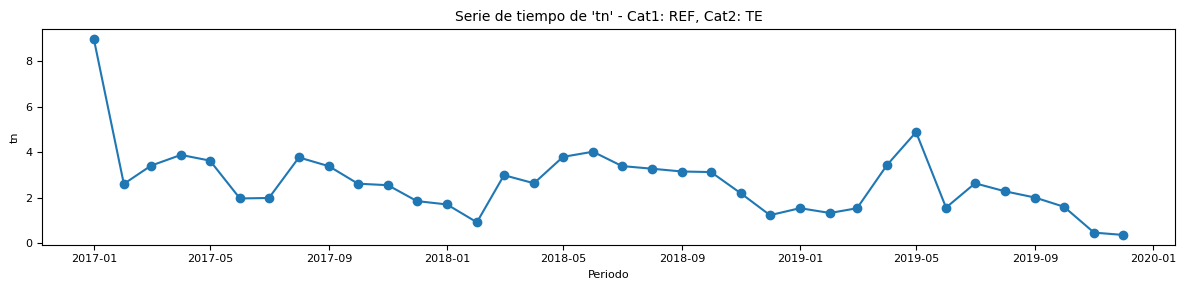

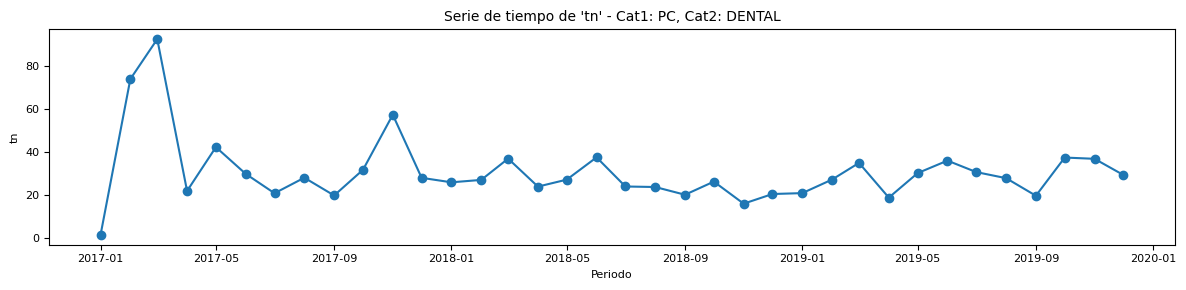

In [187]:
plot_category_all(df, time_series = 'tn', group_by= 'cat2')

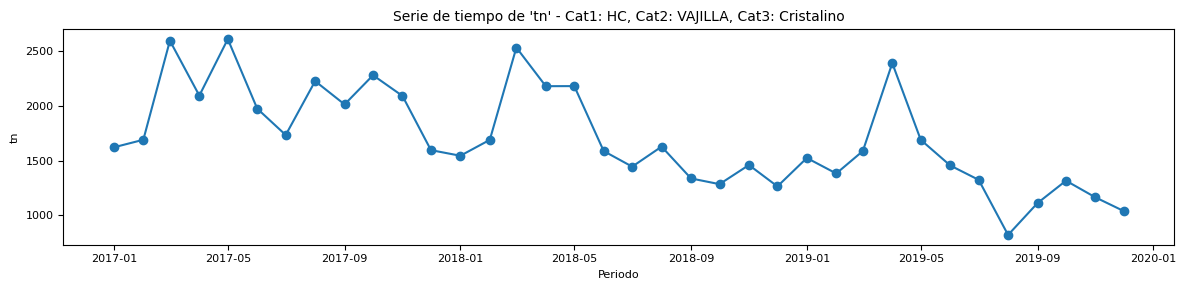

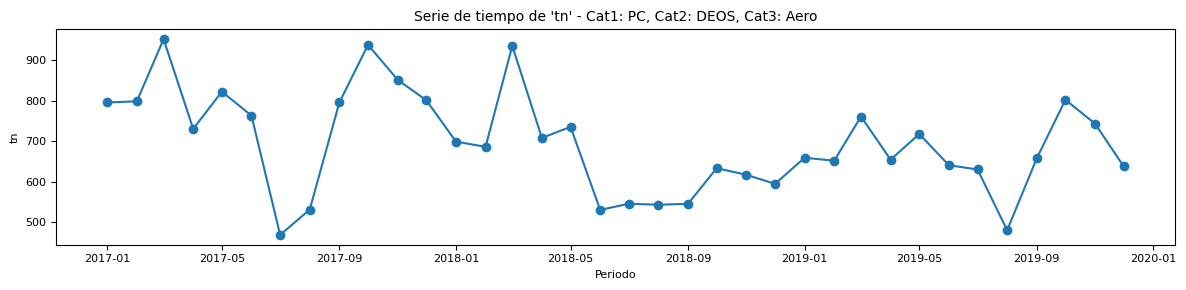

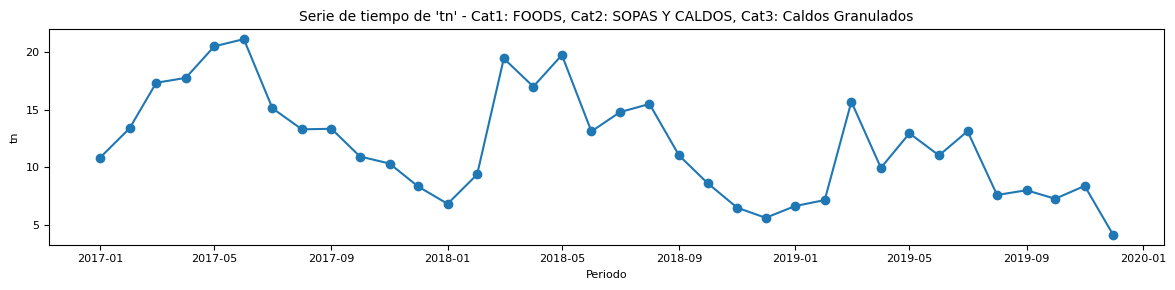

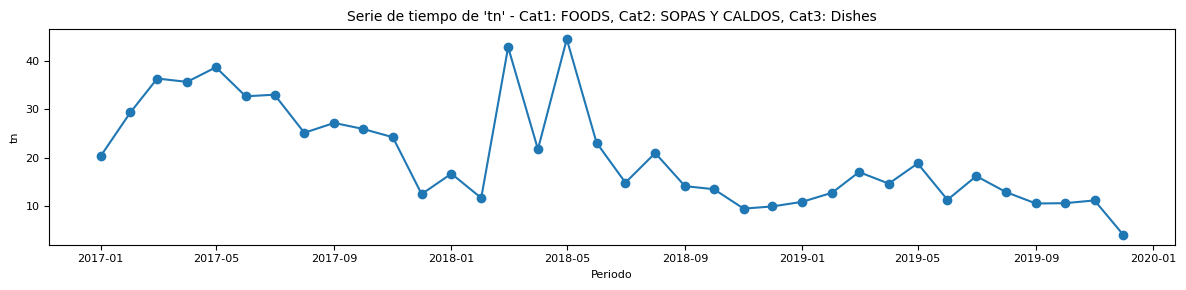

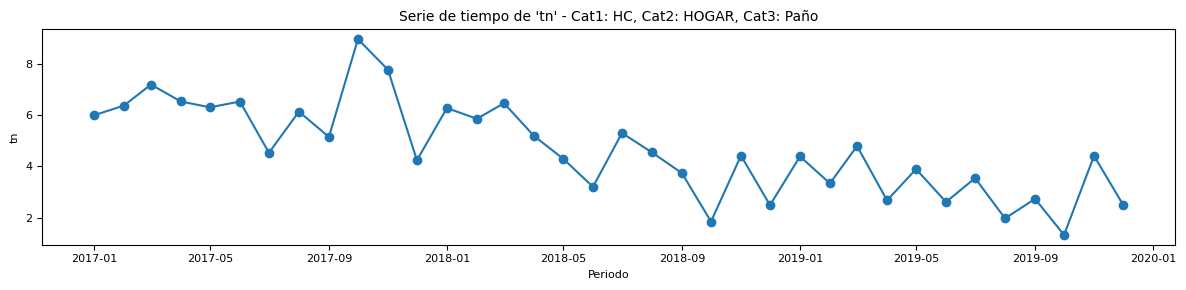

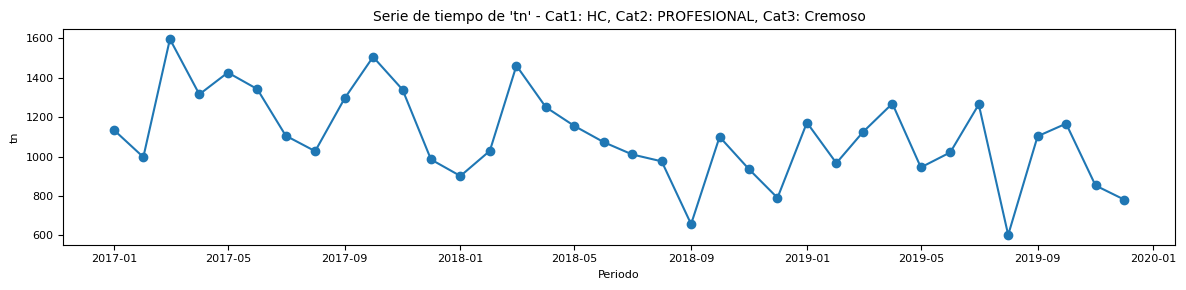

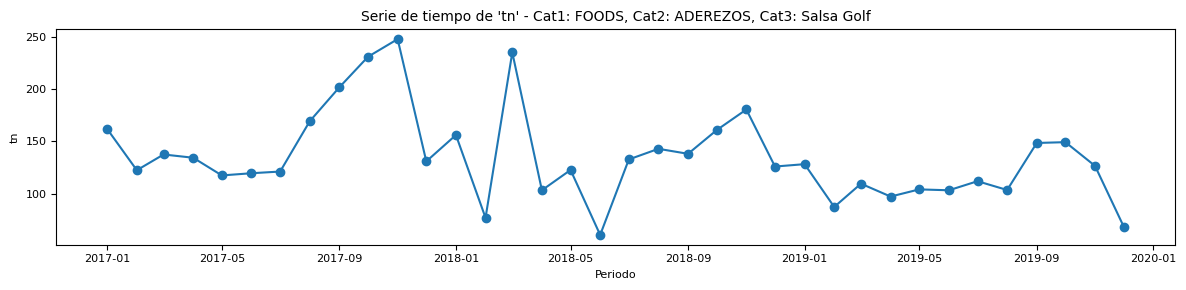

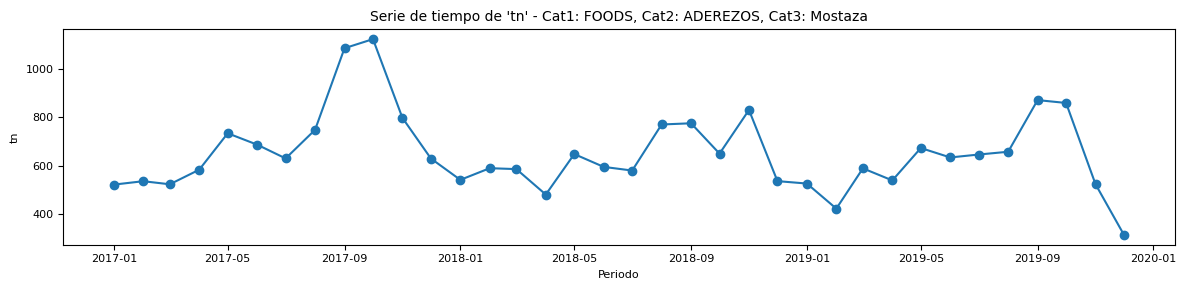

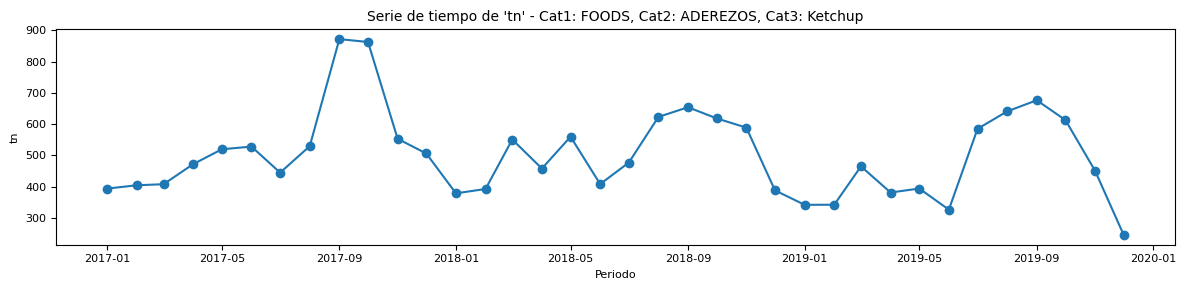

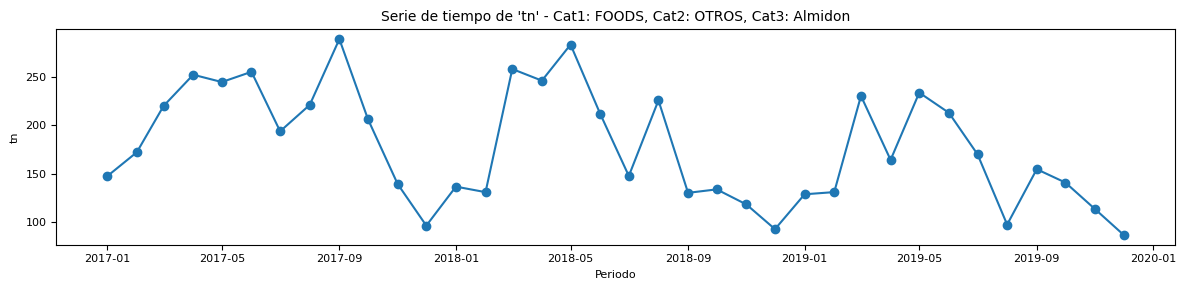

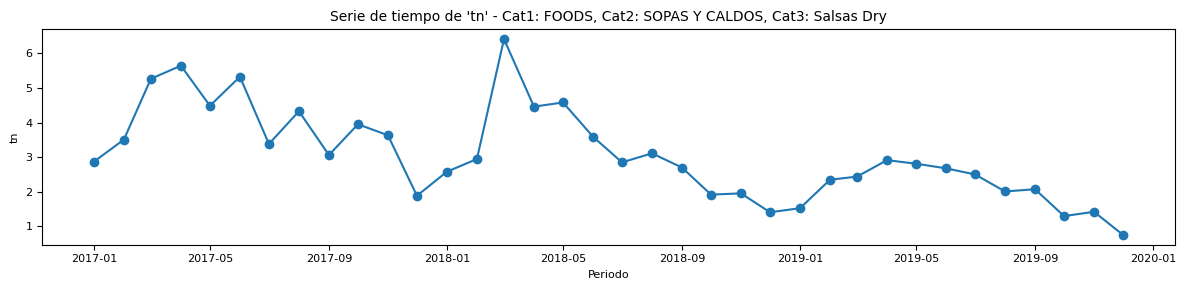

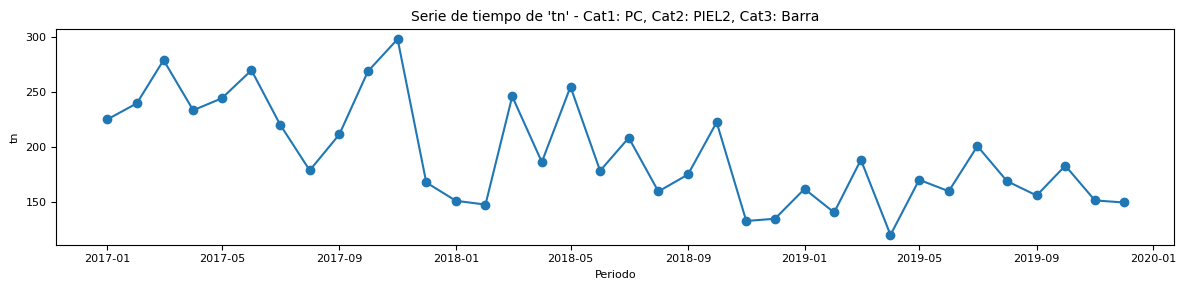

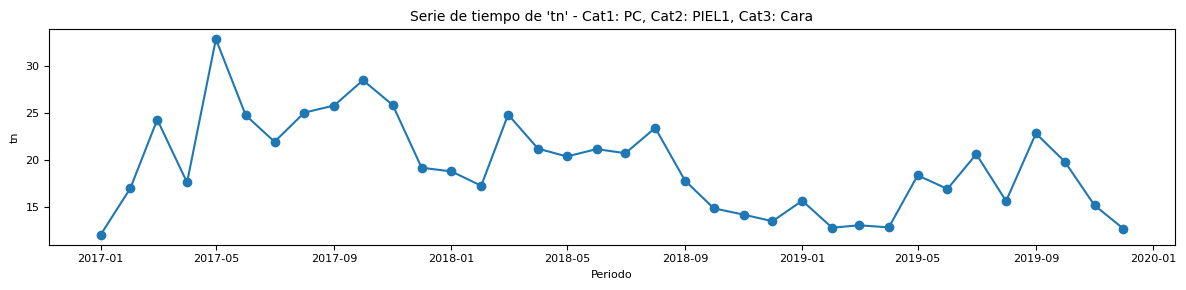

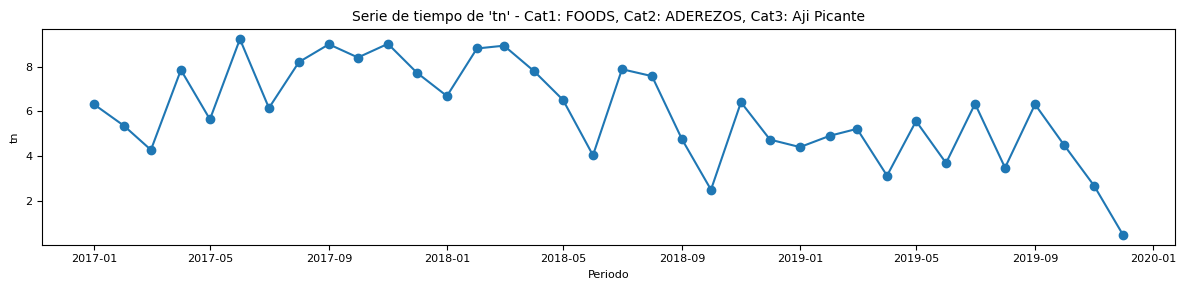

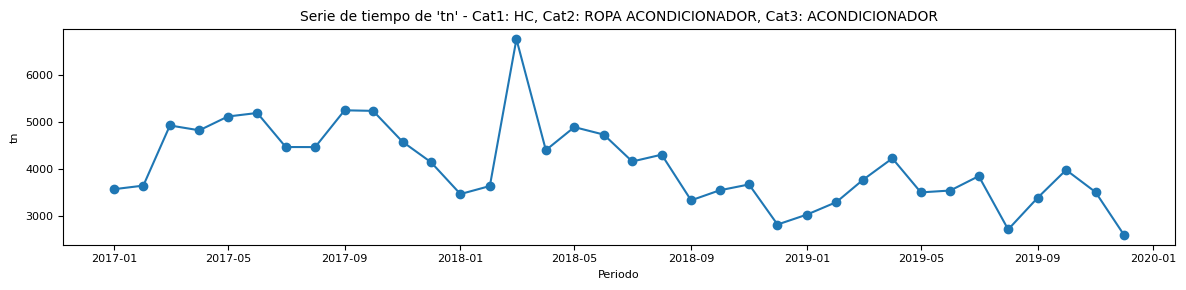

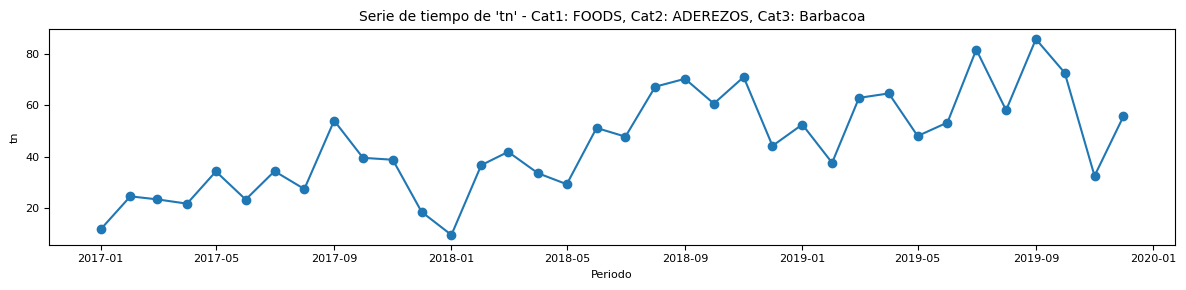

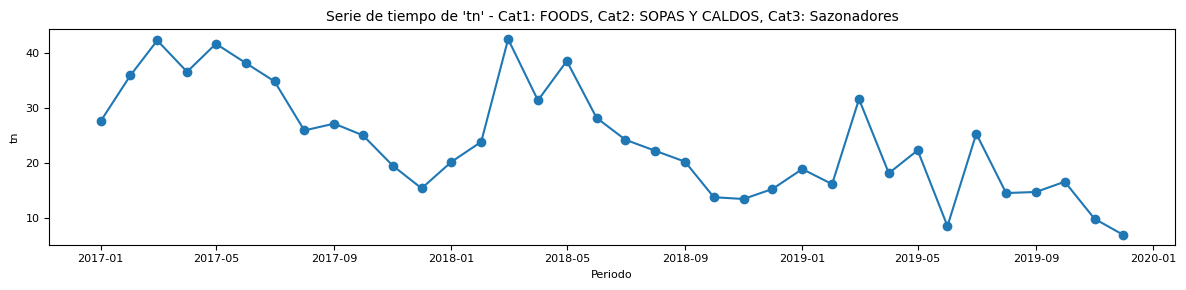

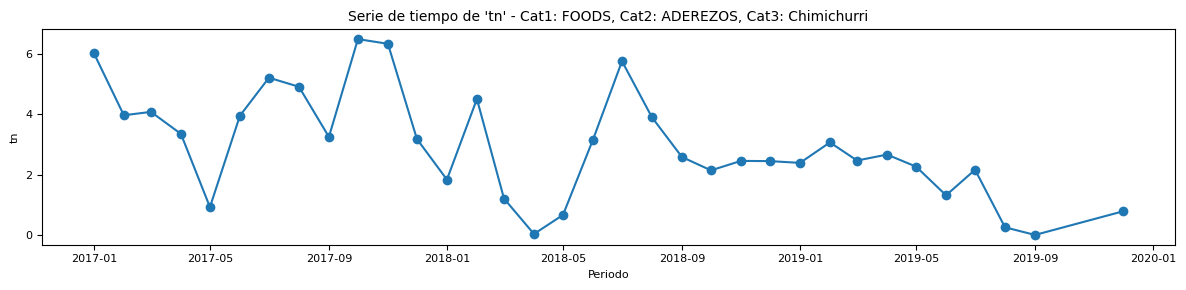

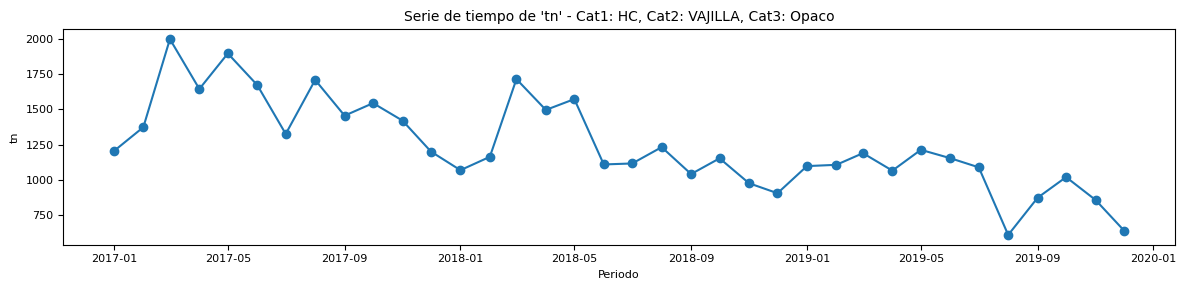

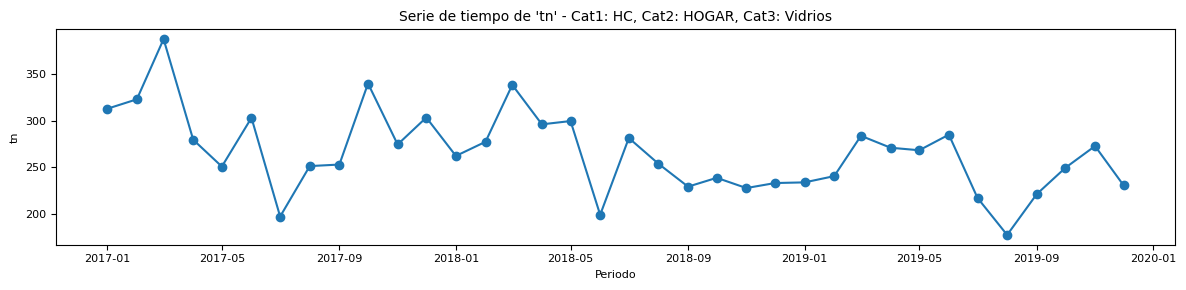

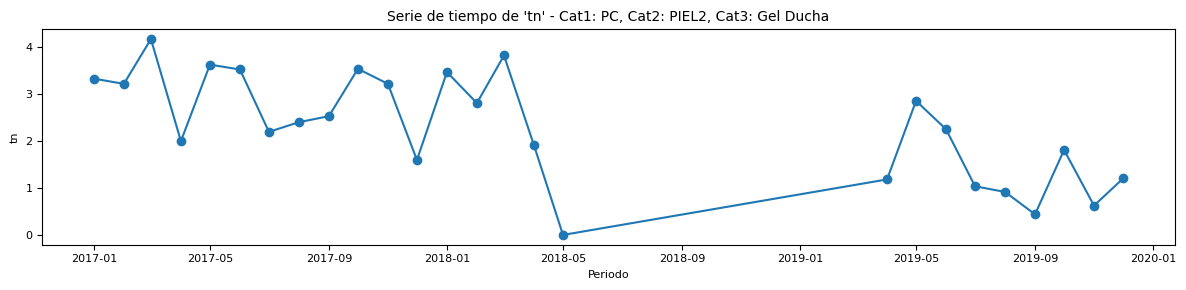

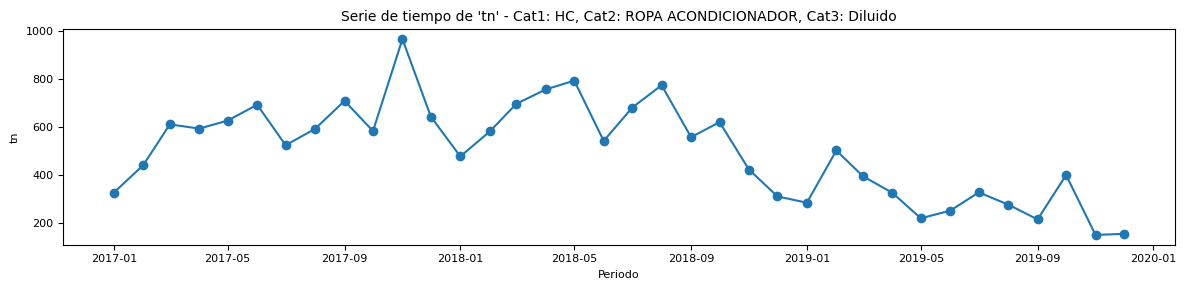

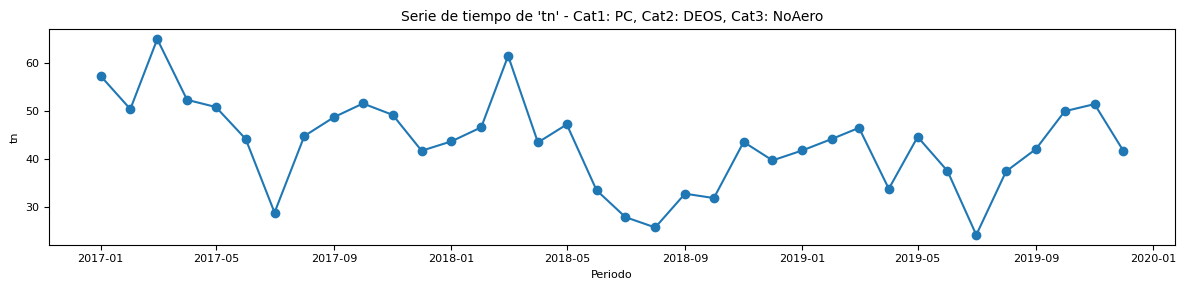

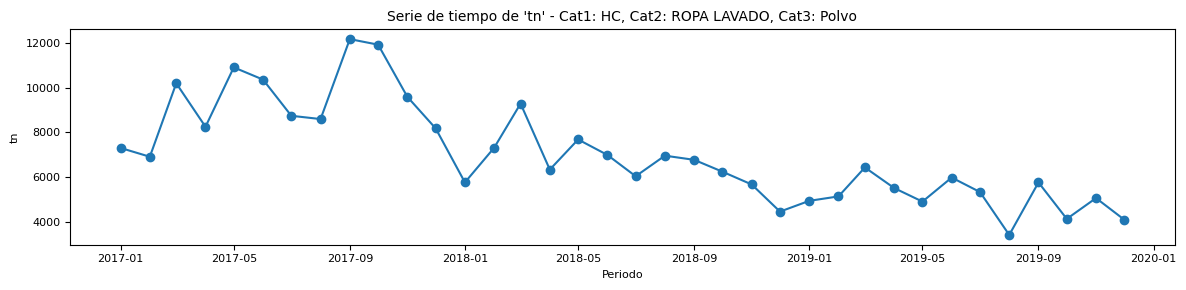

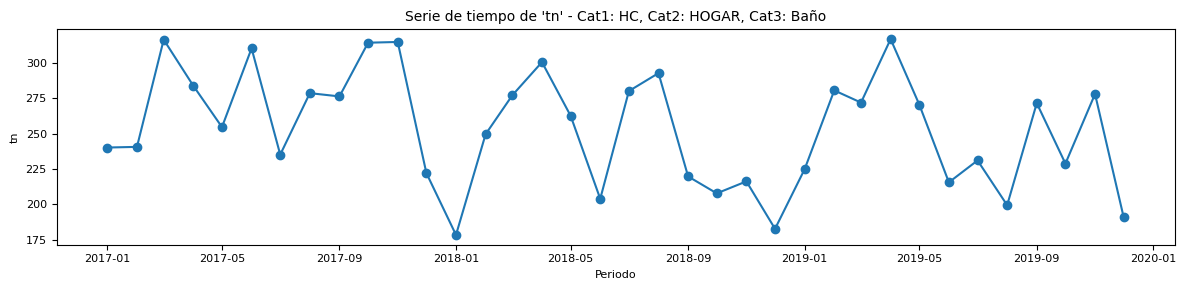

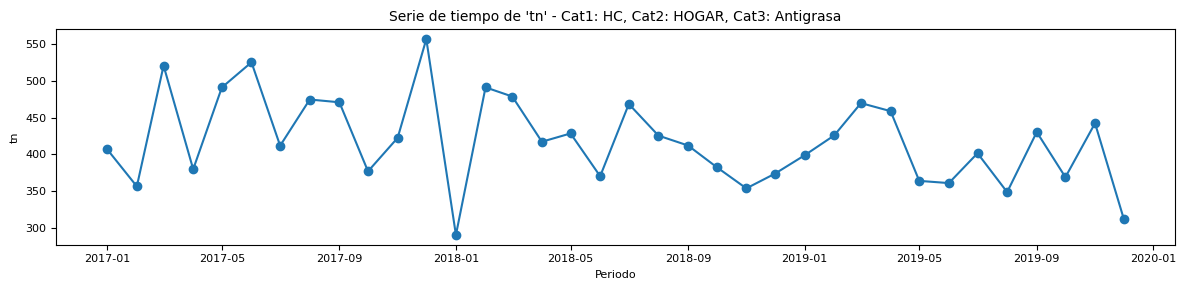

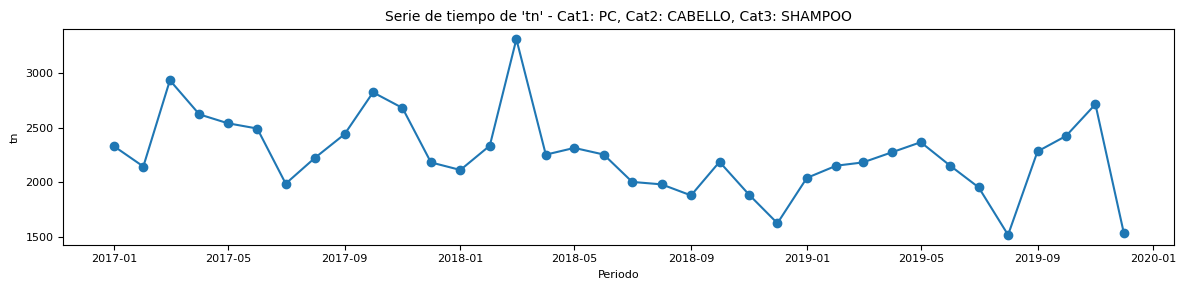

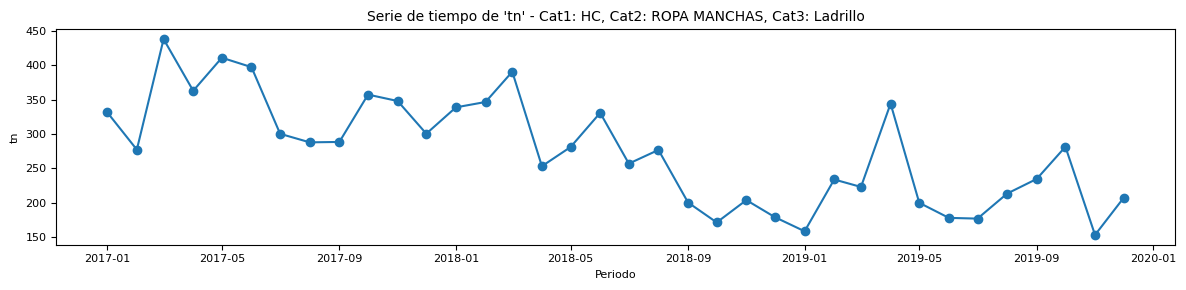

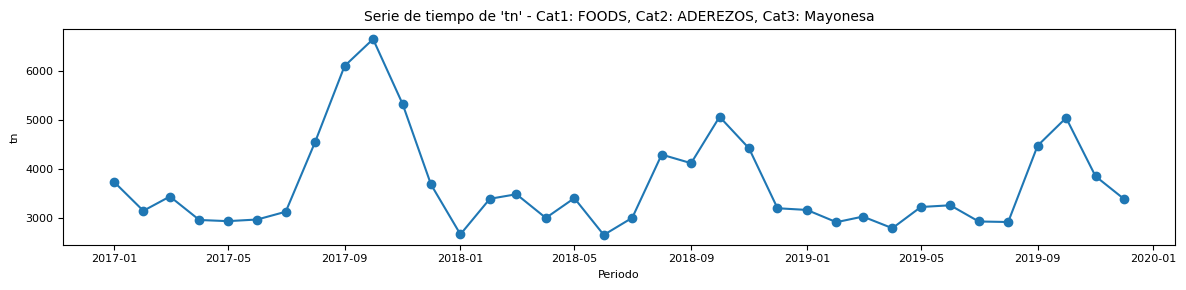

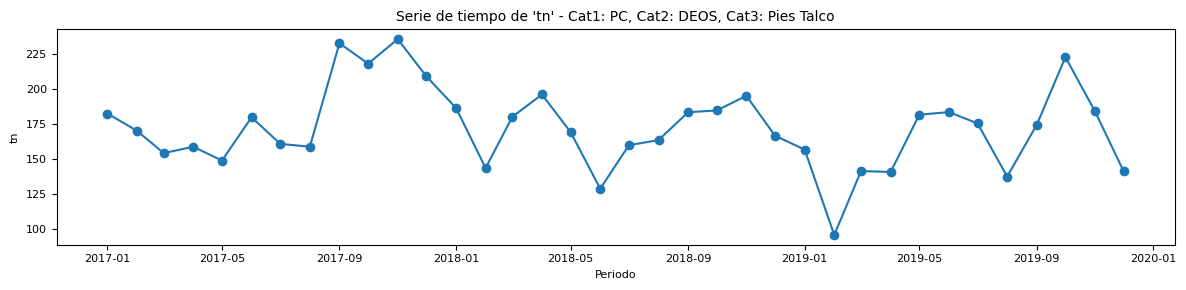

No se encontraron datos para la categoría 'nan'. Saltando...


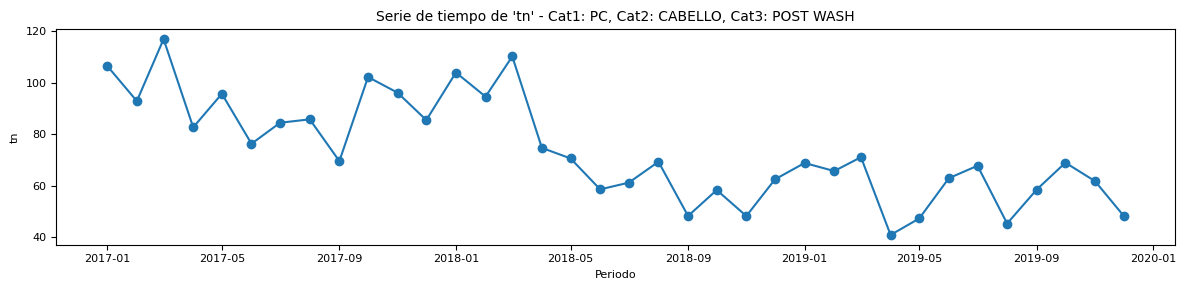

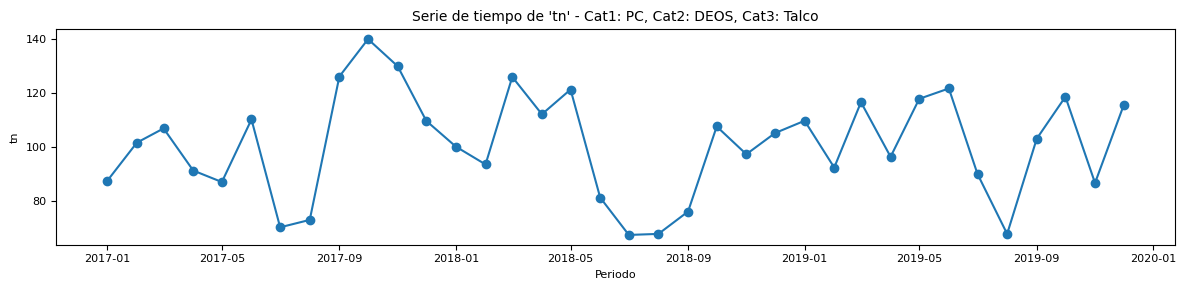

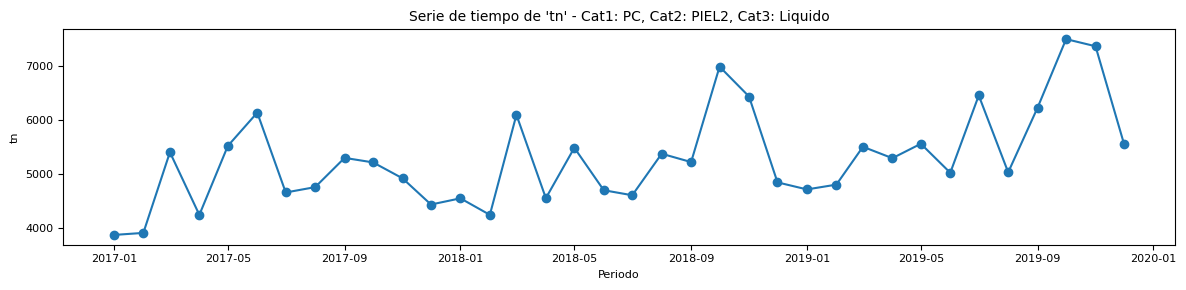

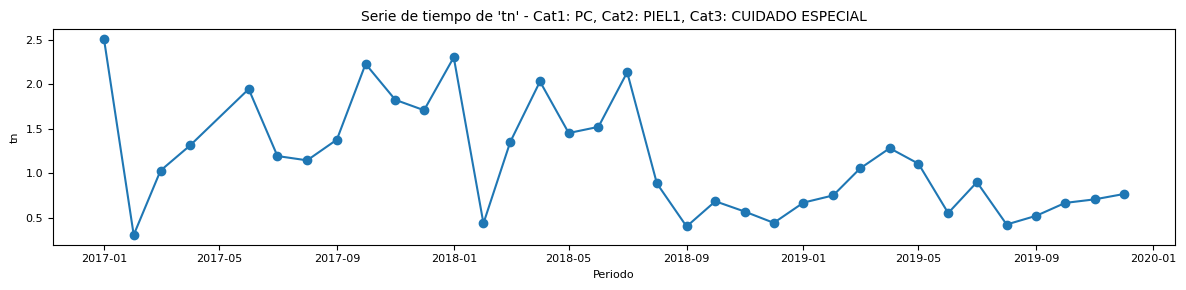

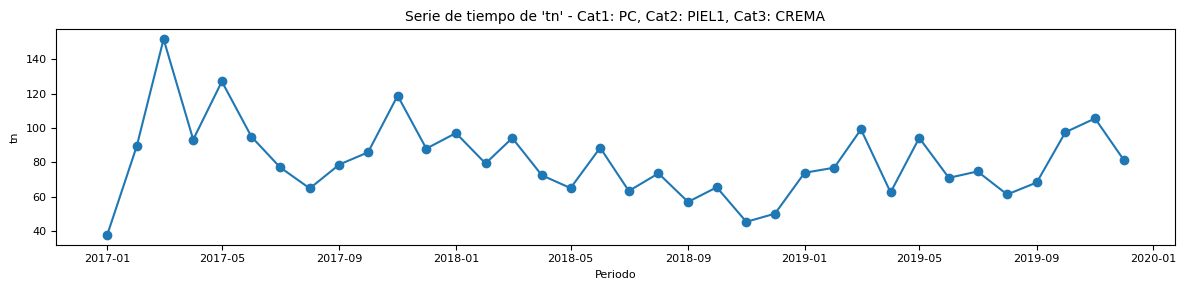

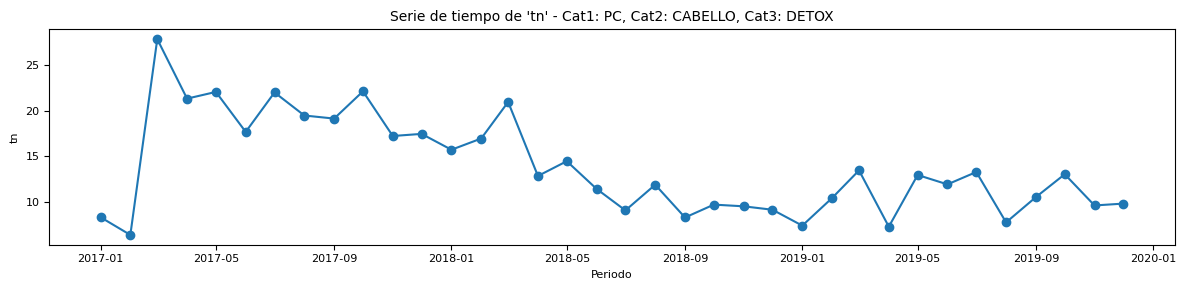

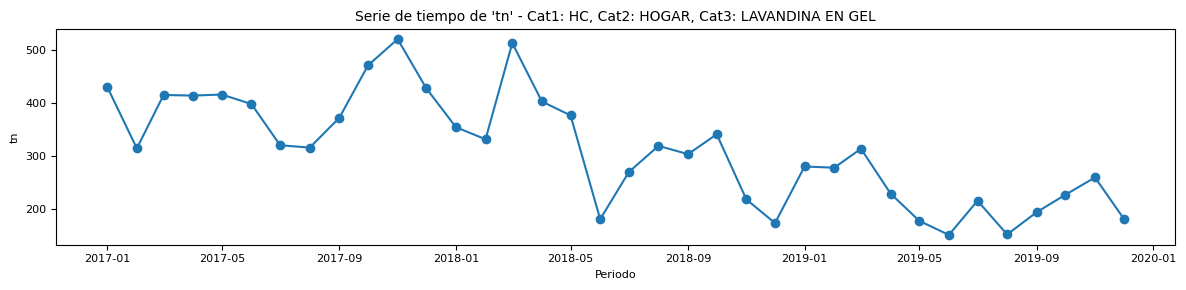

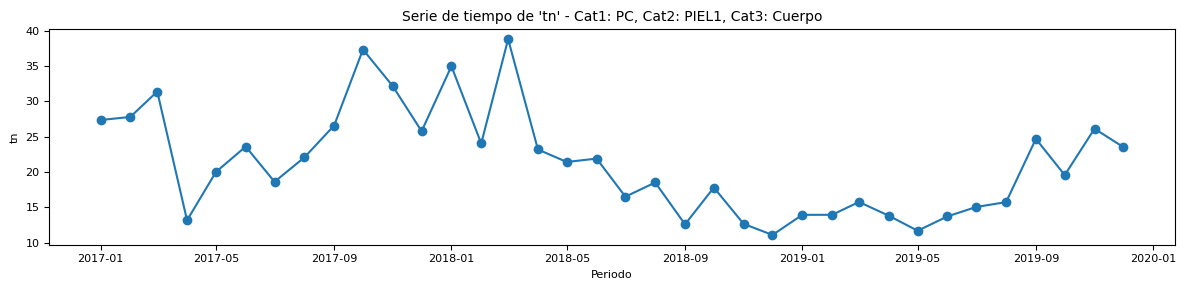

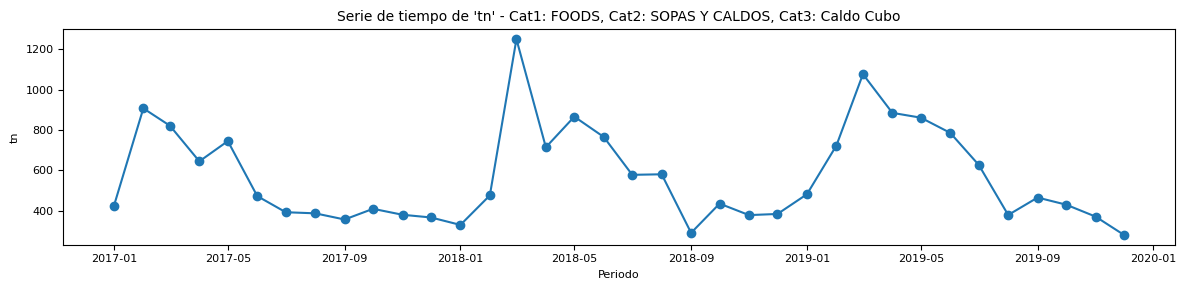

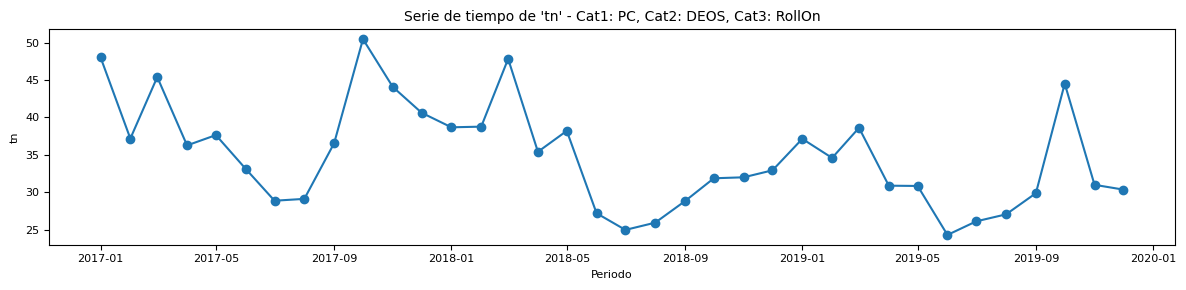

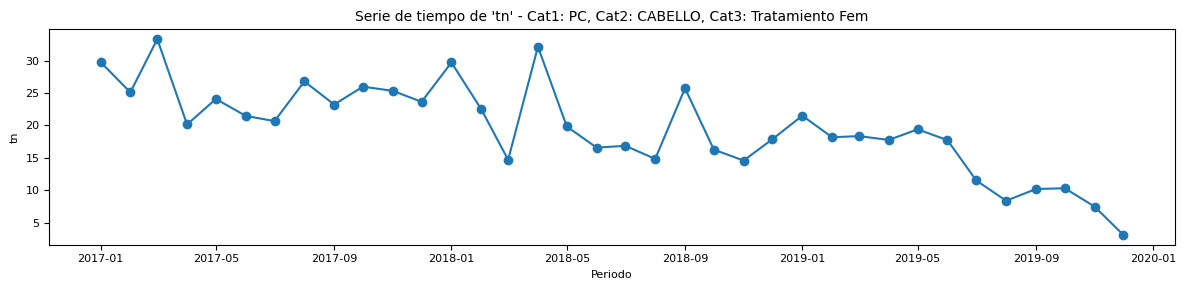

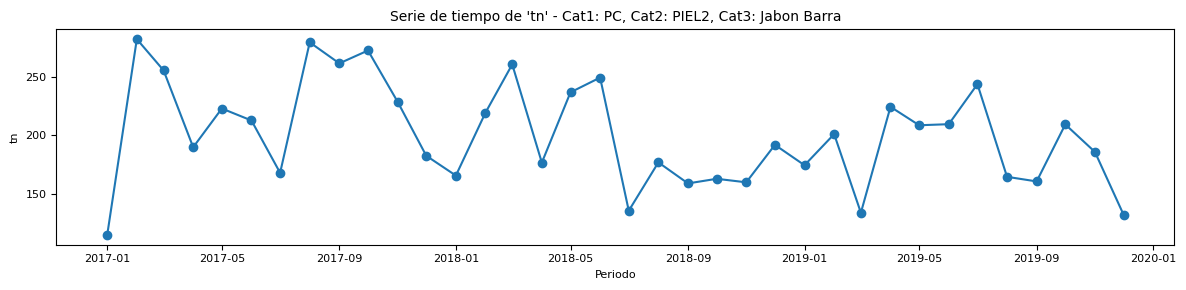

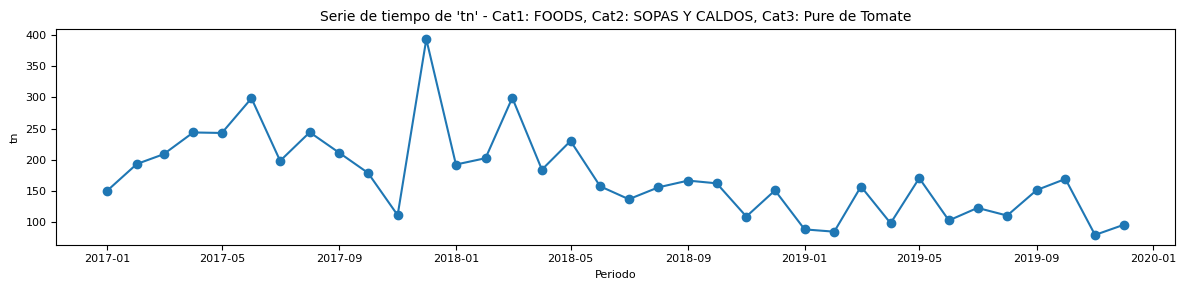

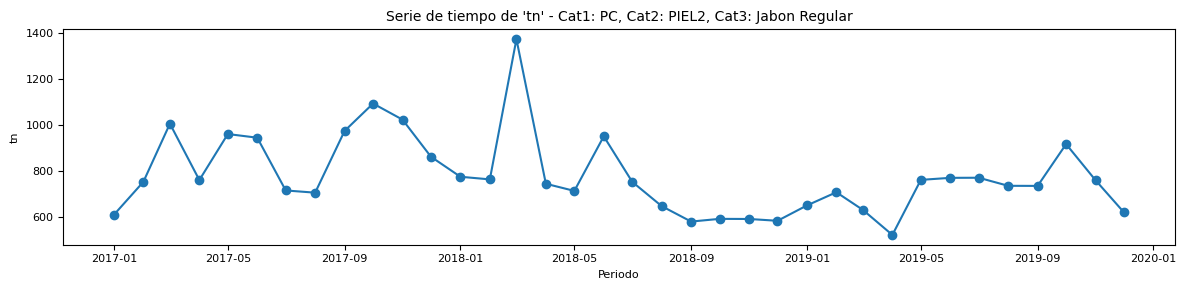

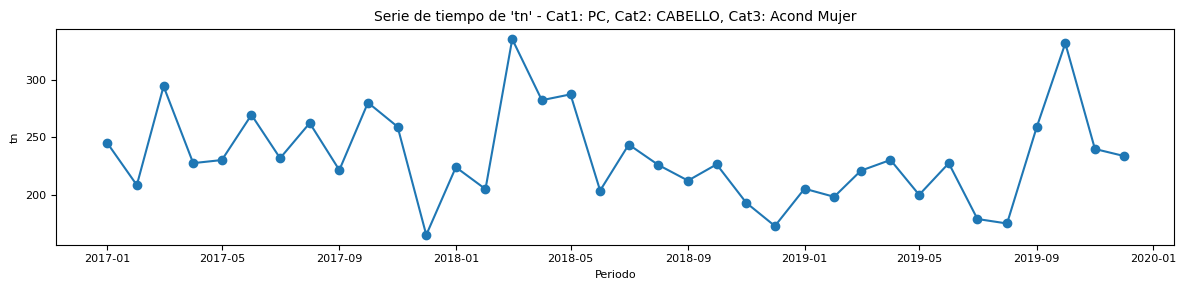

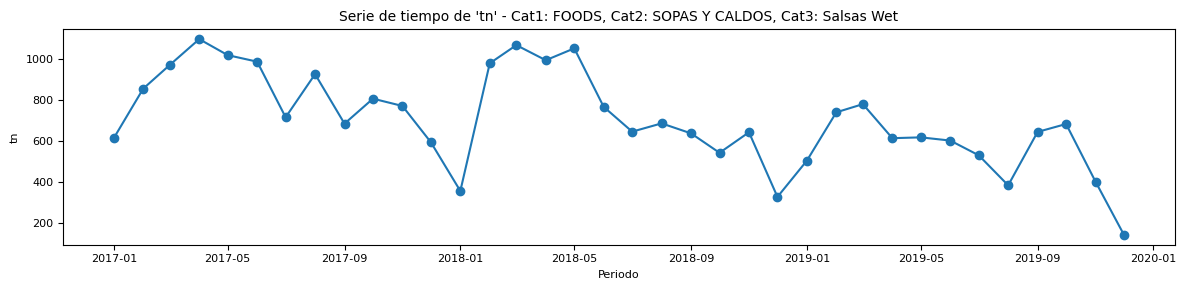

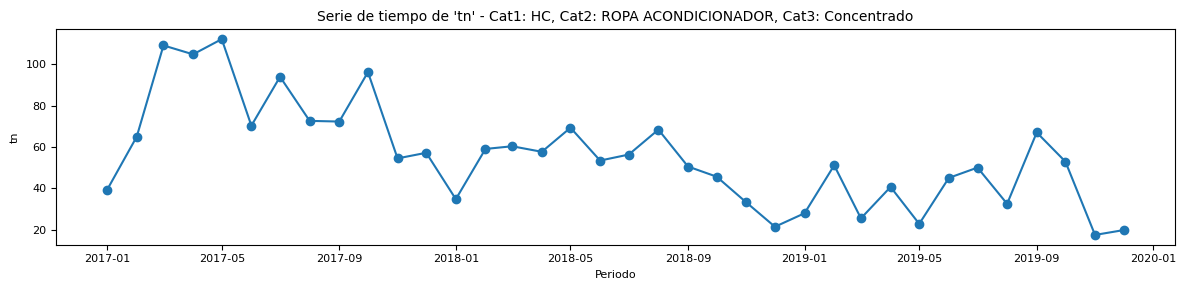

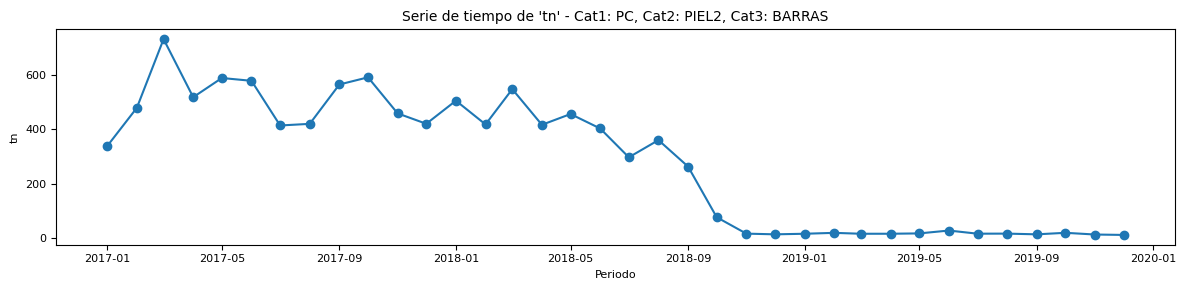

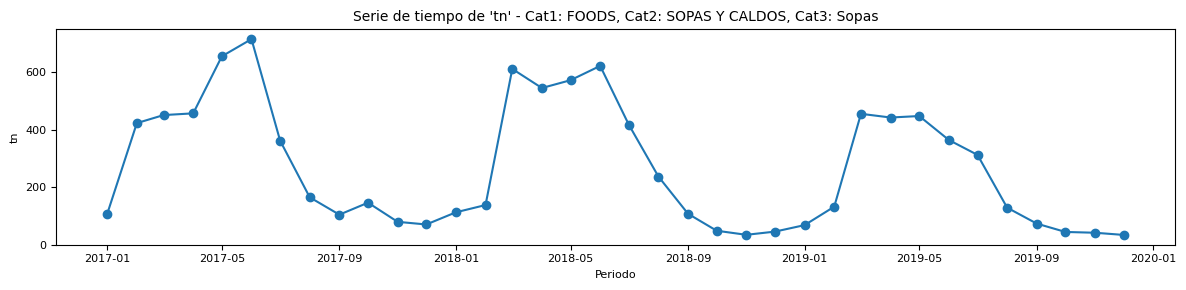

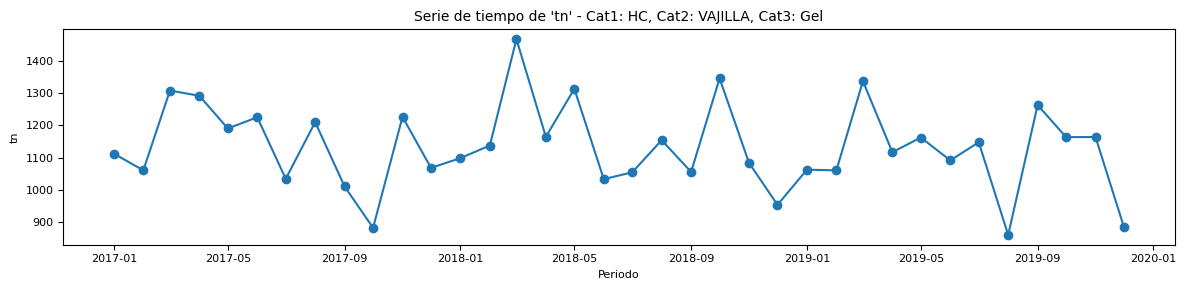

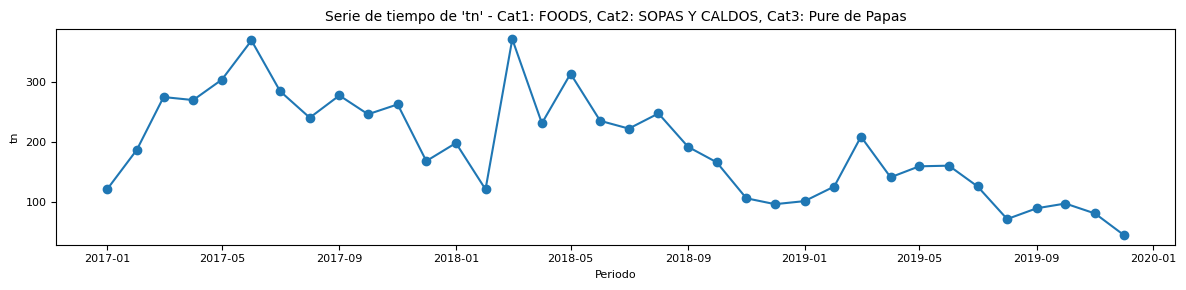

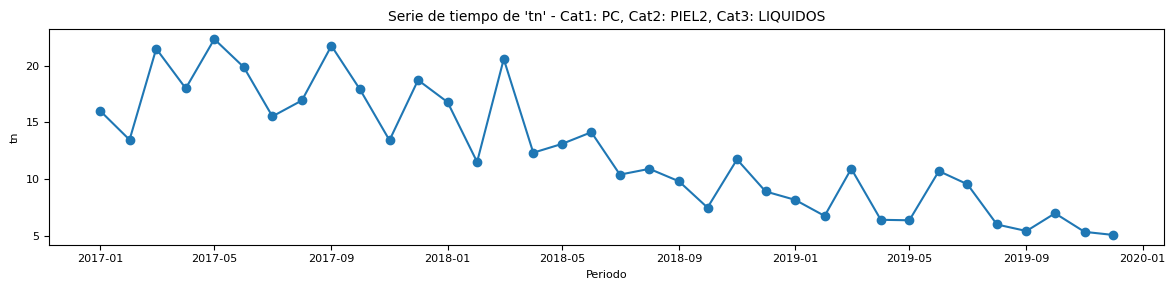

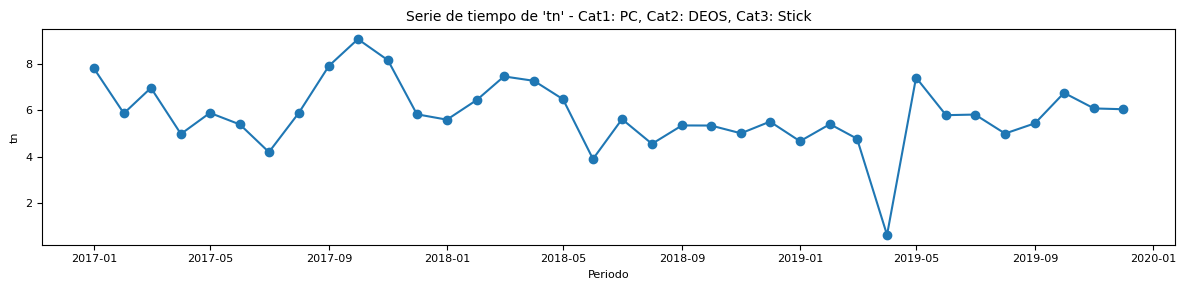

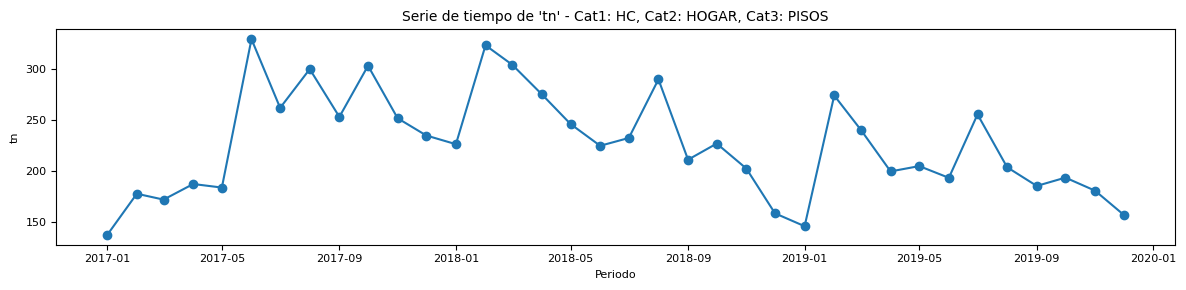

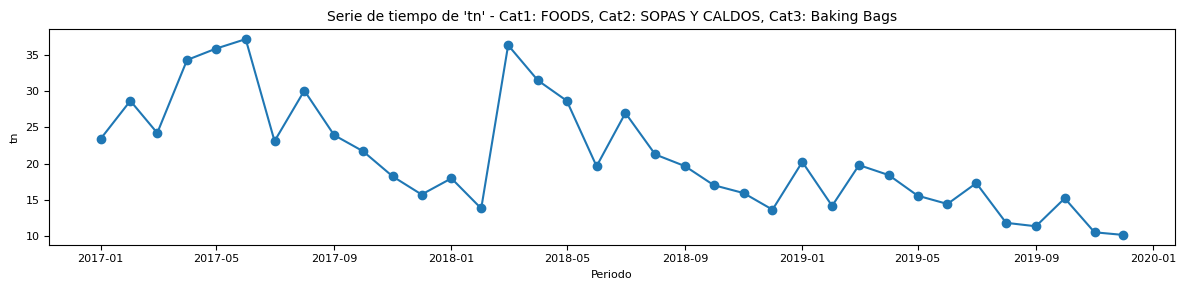

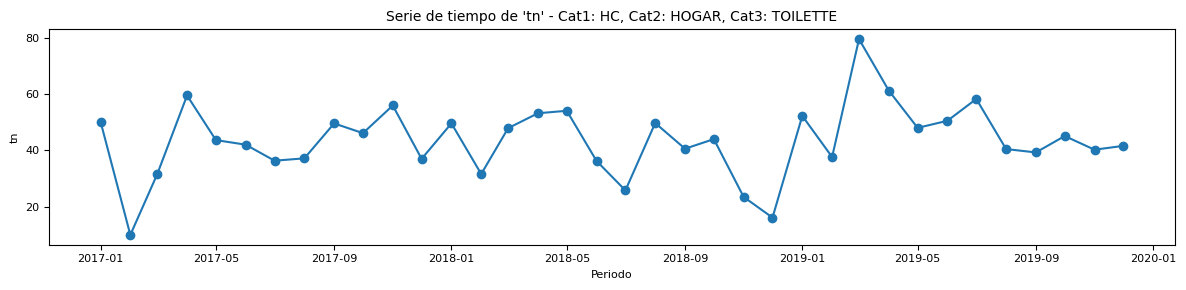

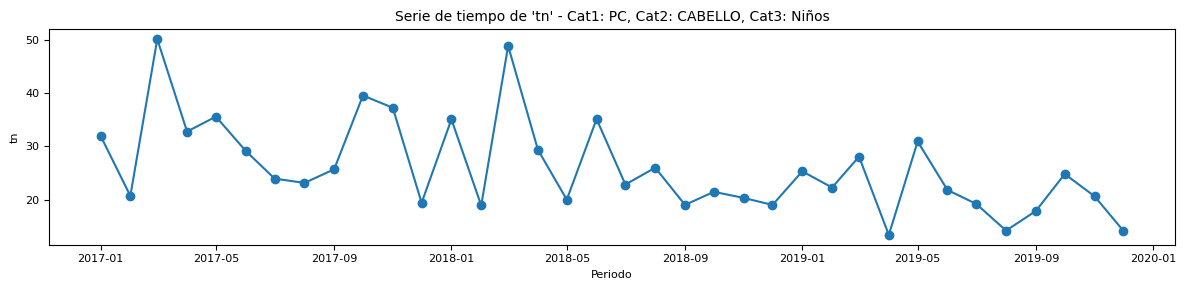

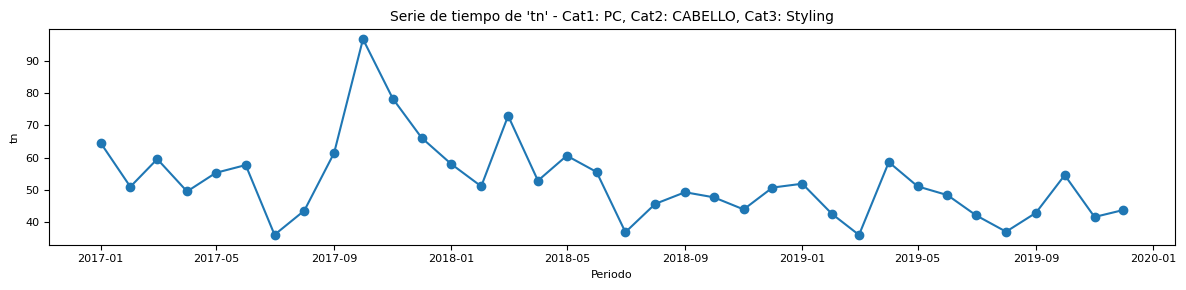

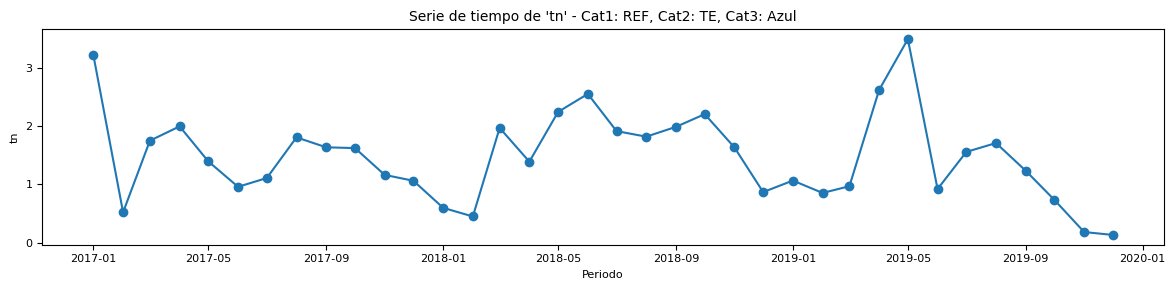

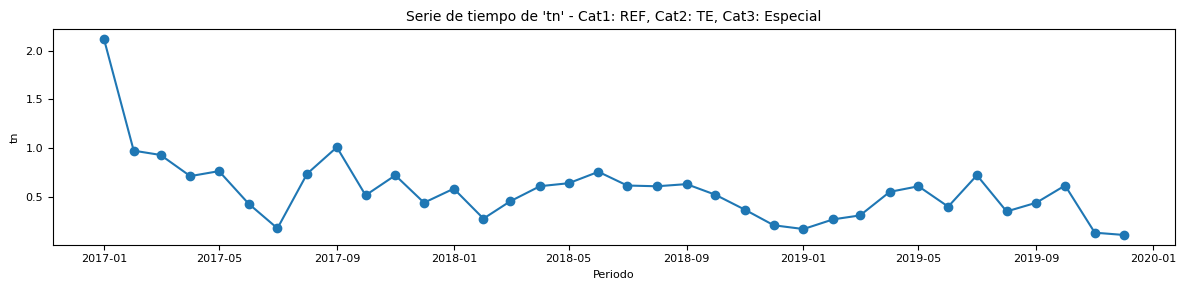

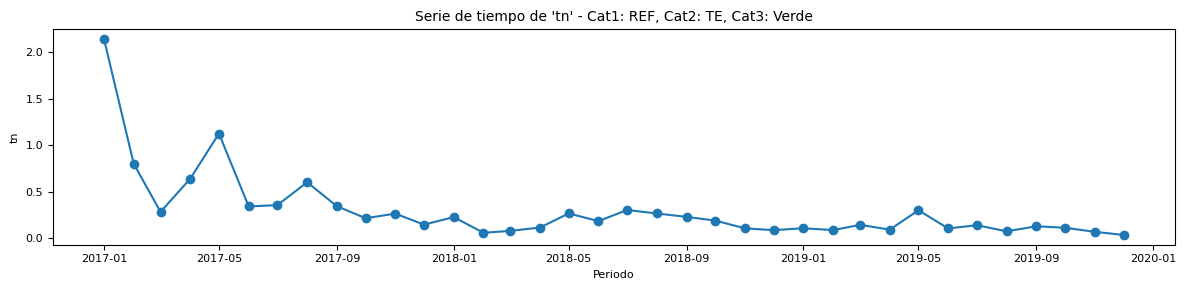

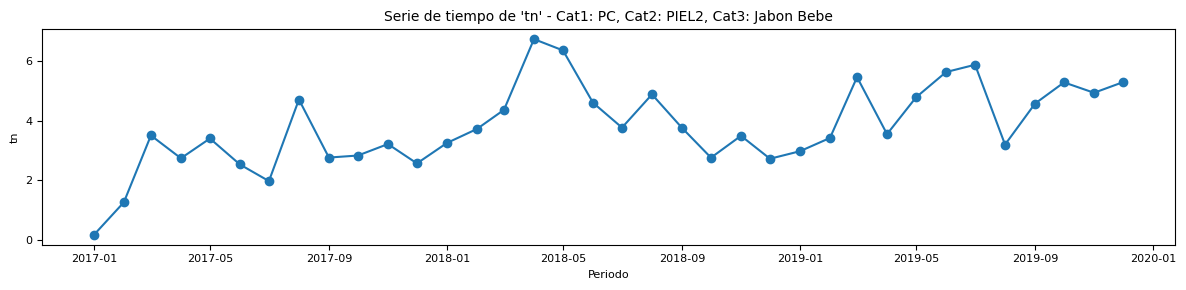

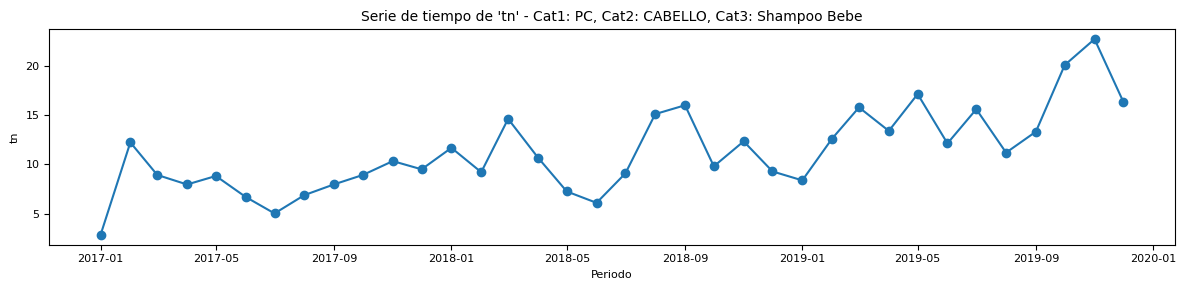

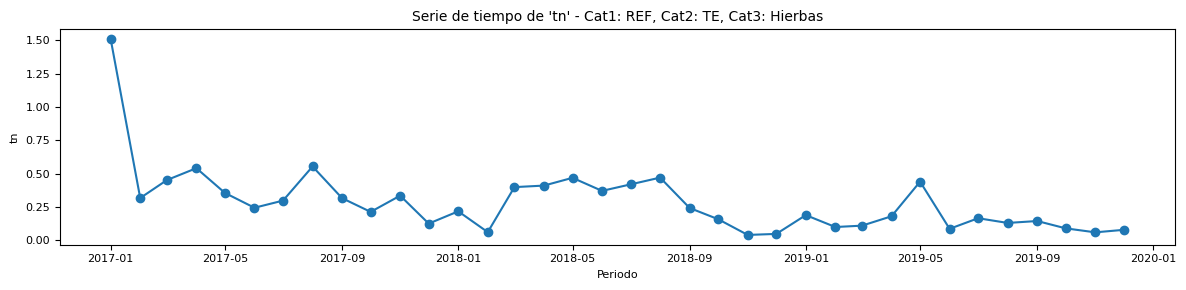

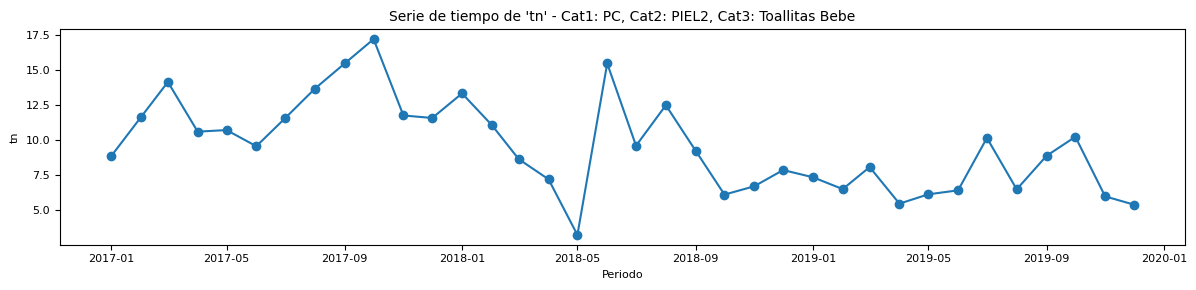

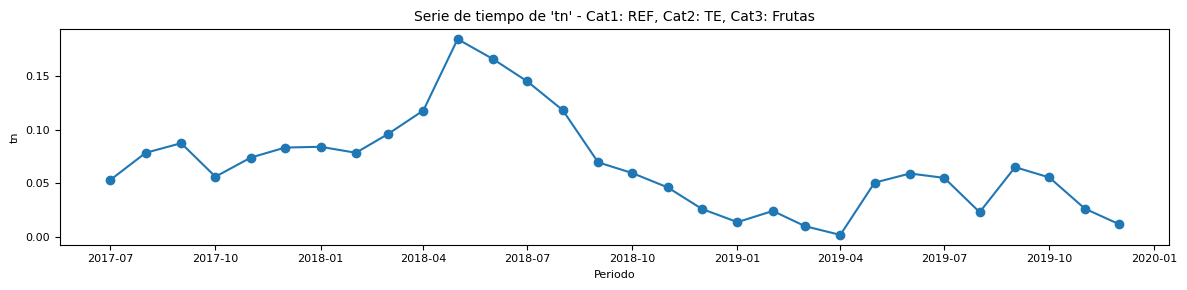

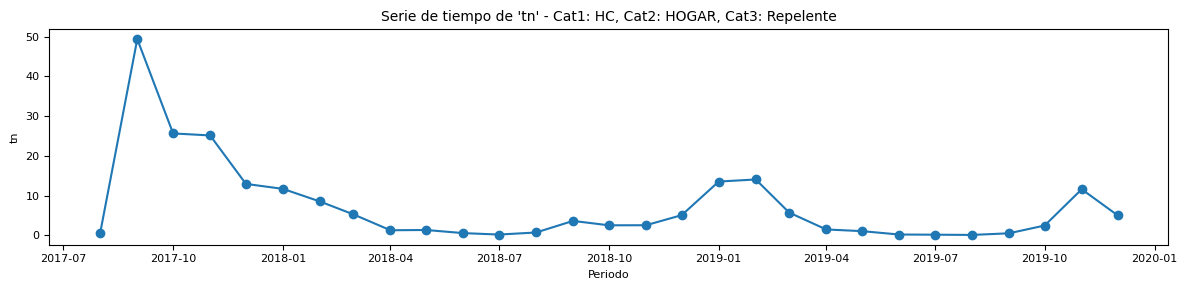

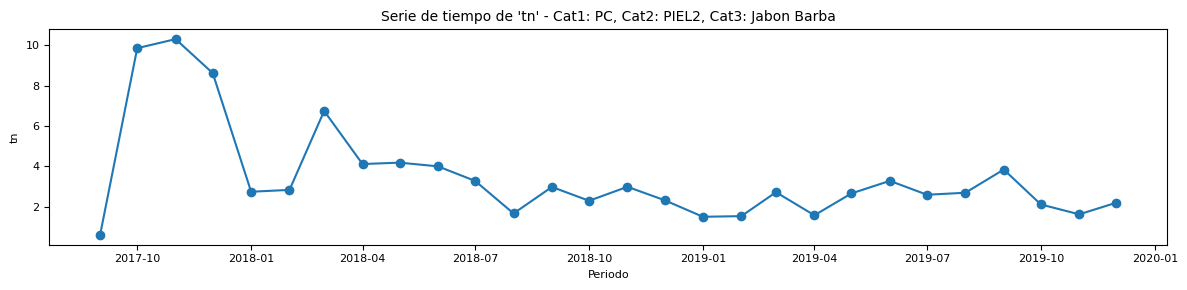

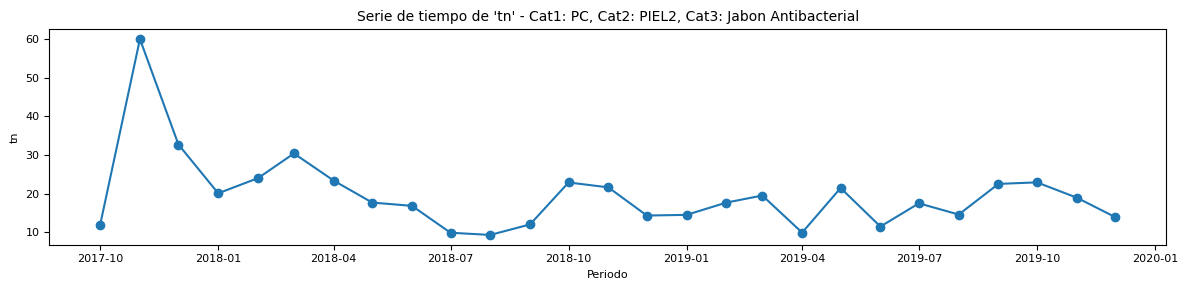

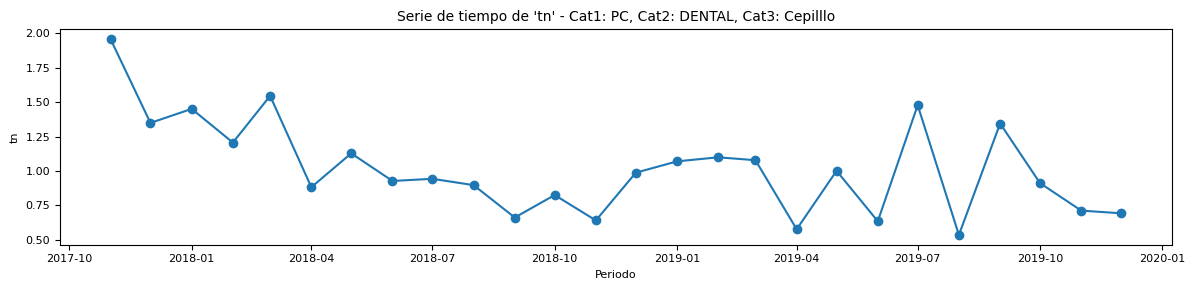

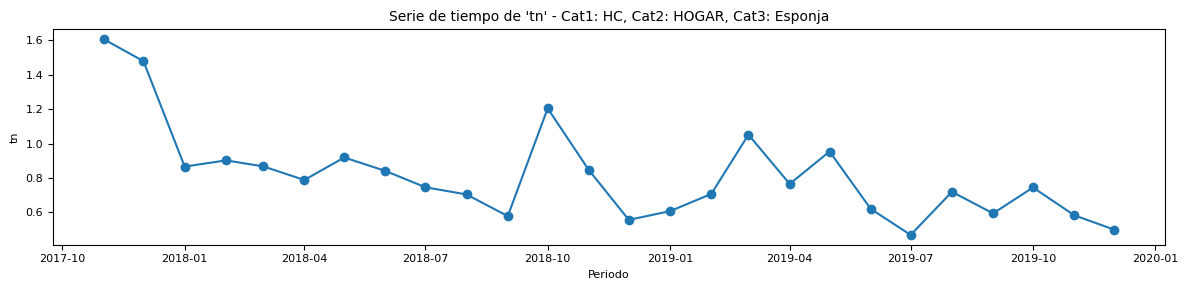

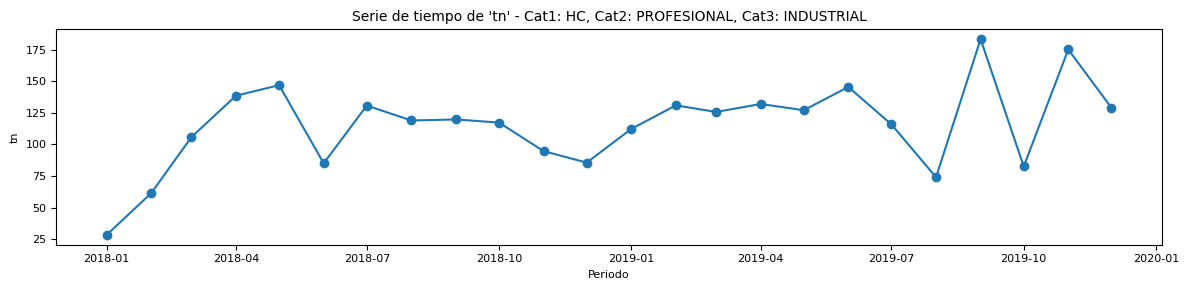

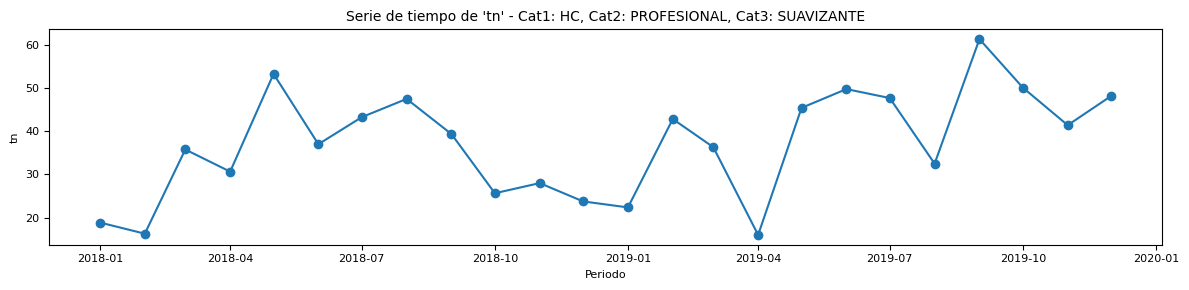

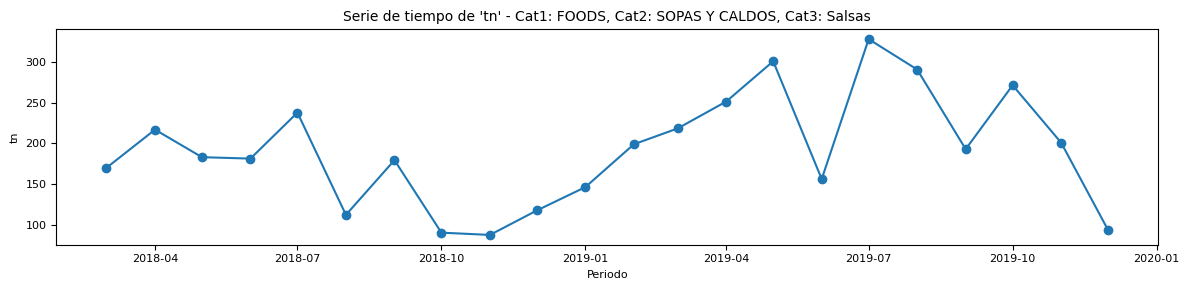

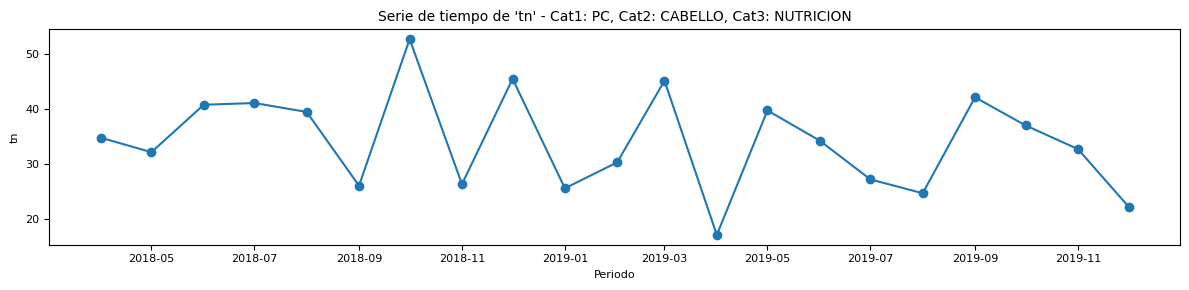

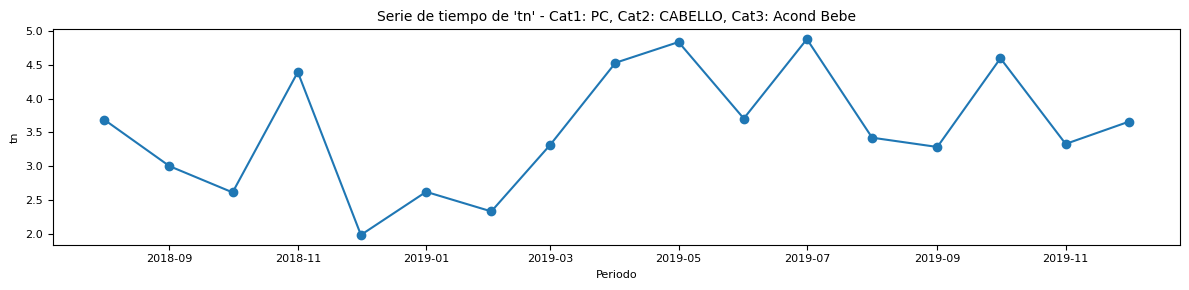

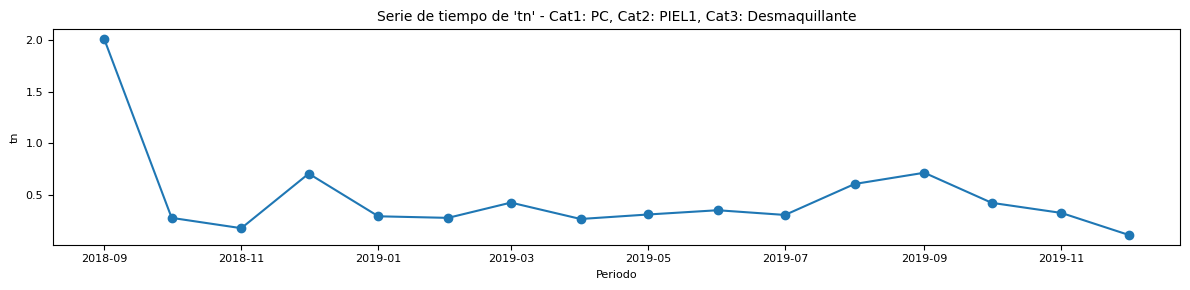

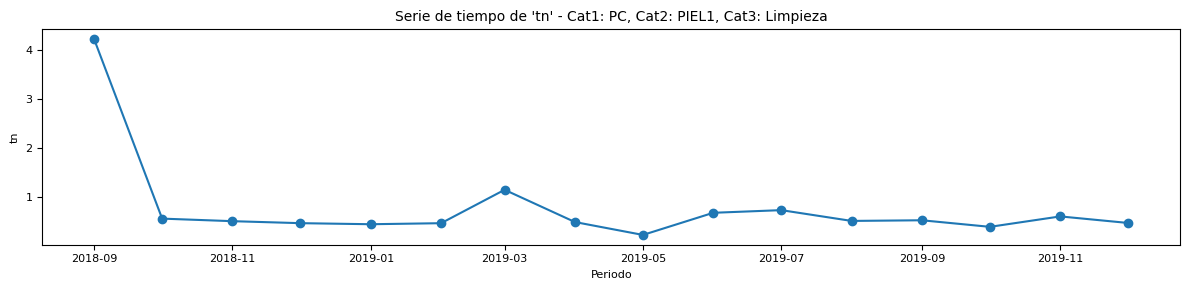

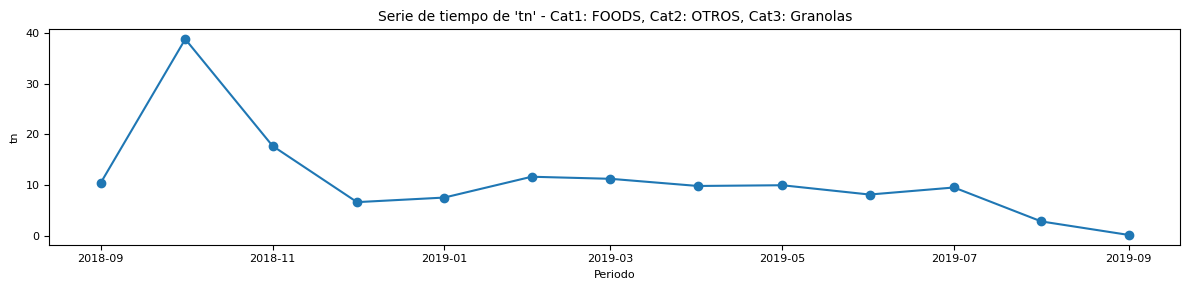

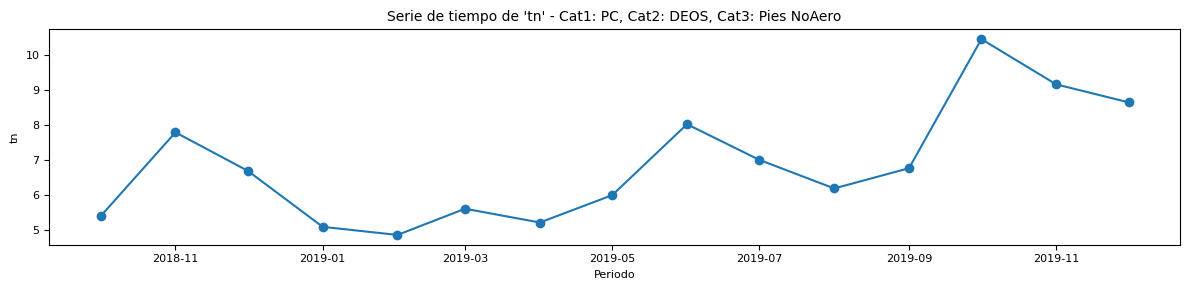

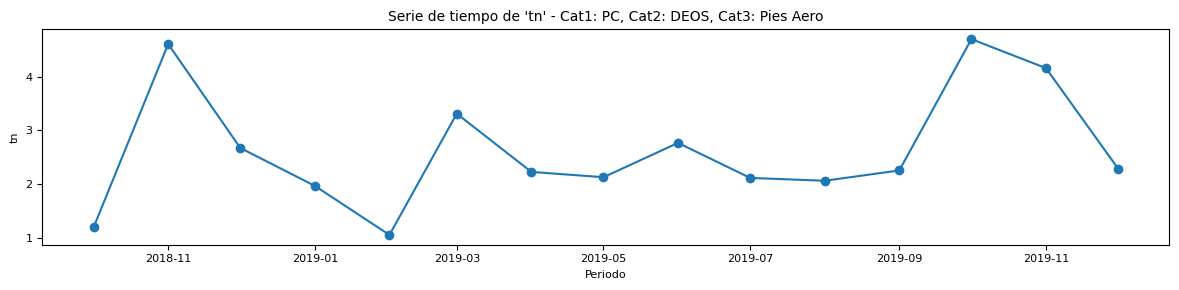

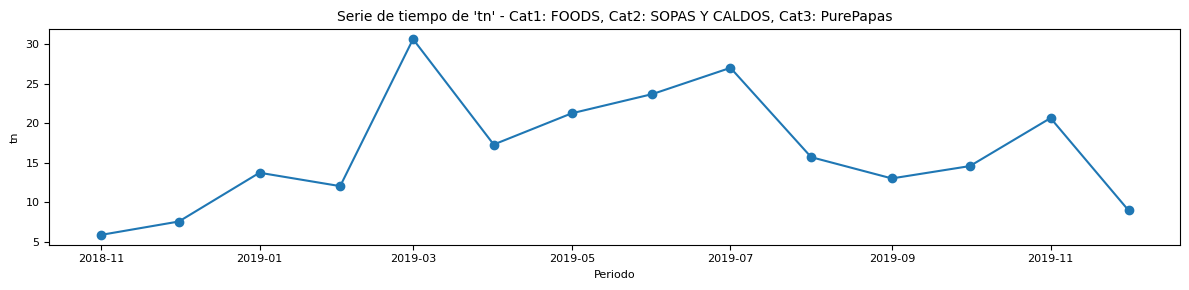

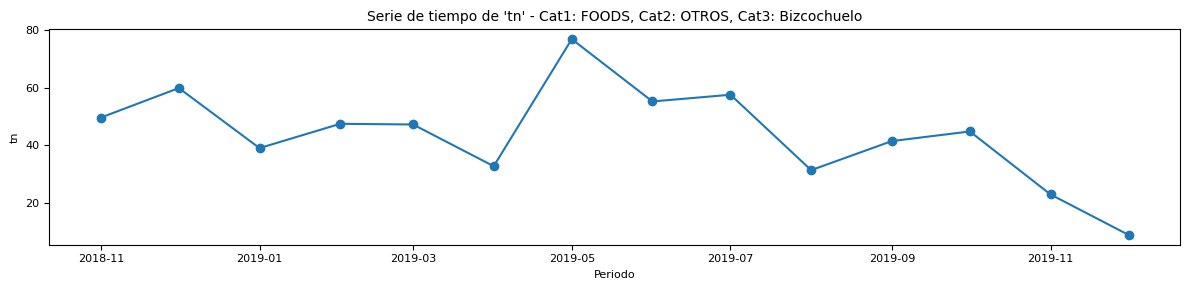

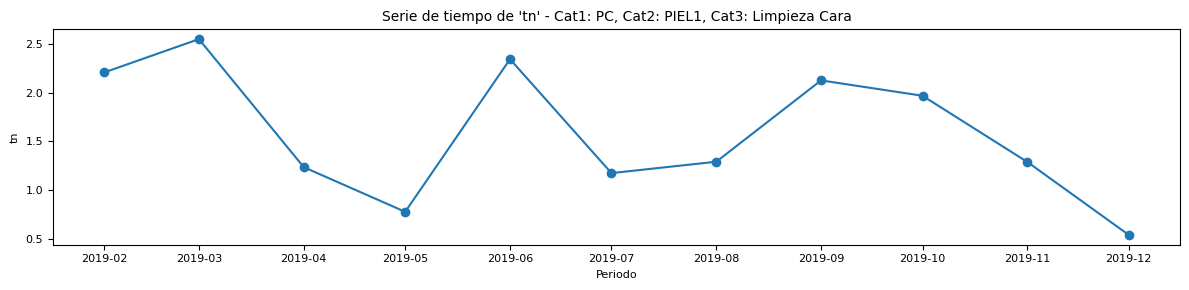

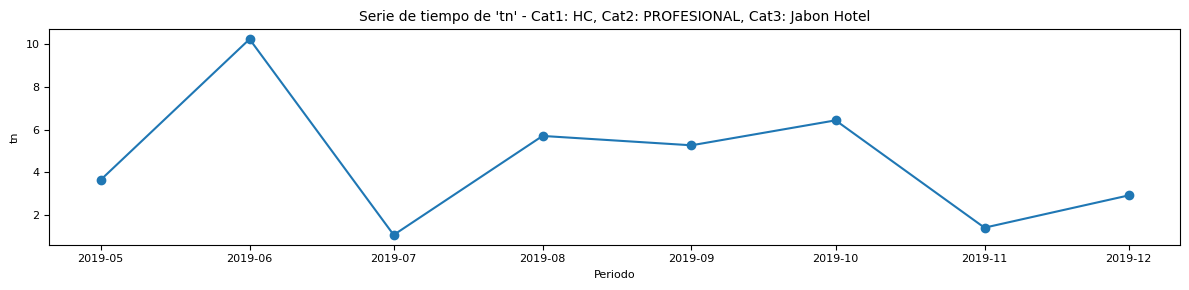

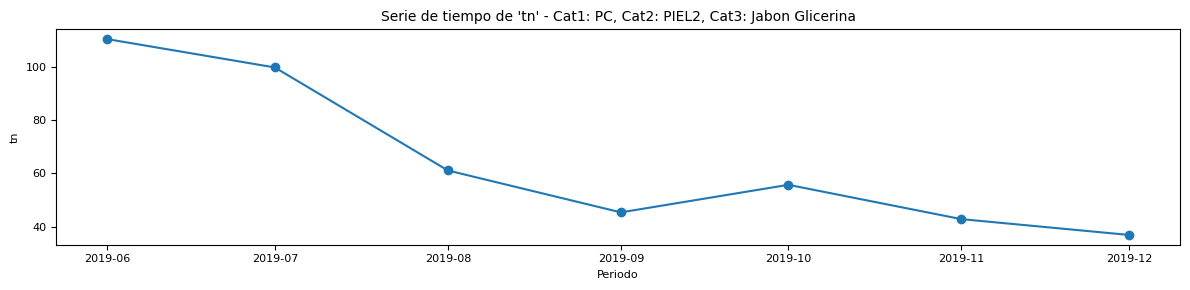

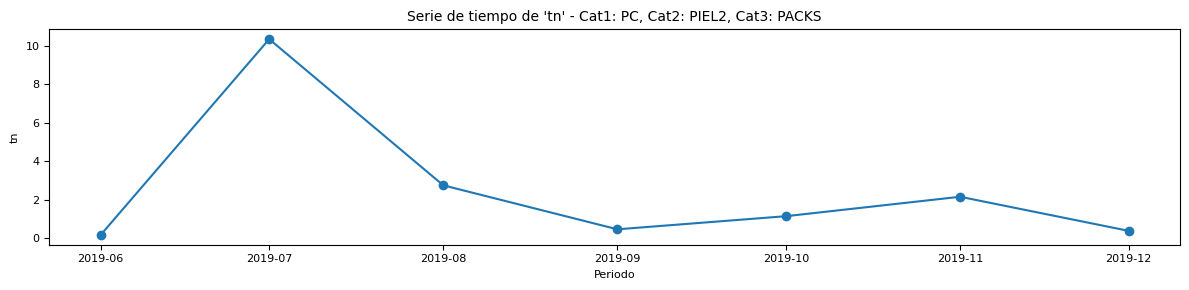

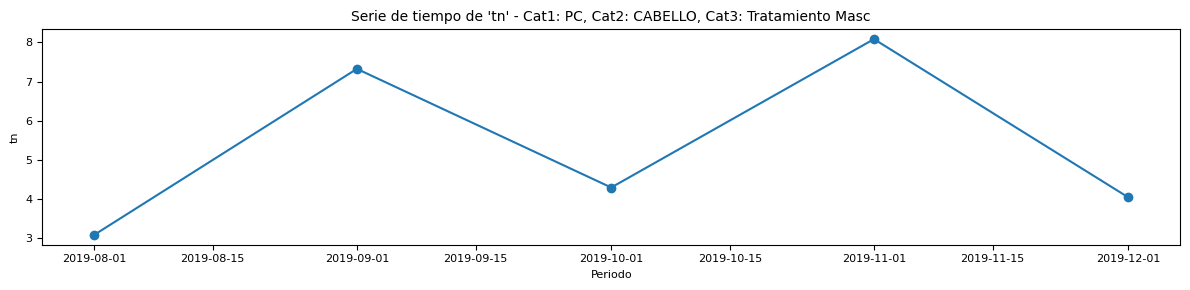

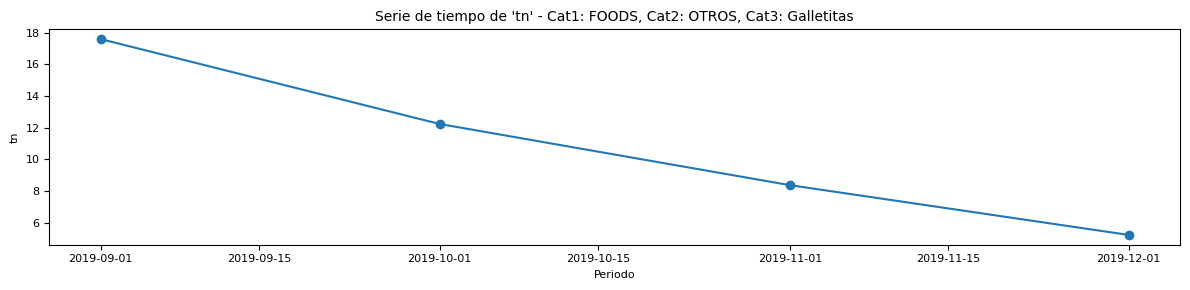

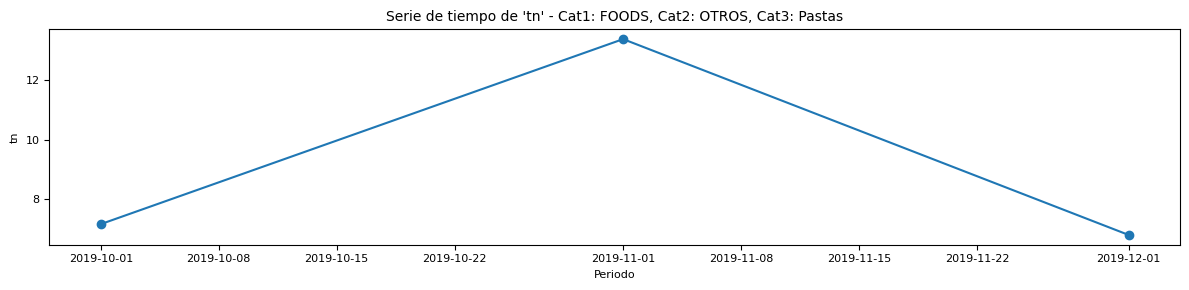

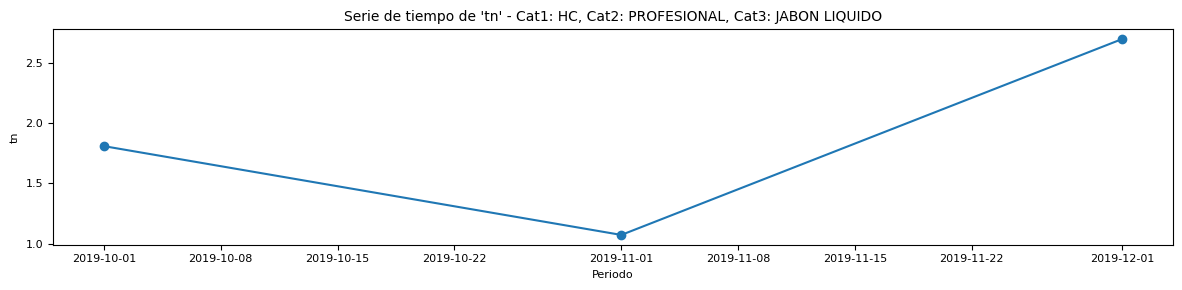

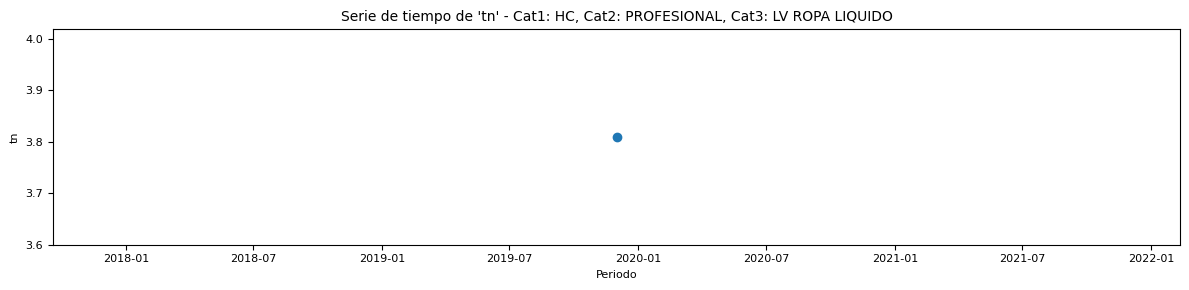

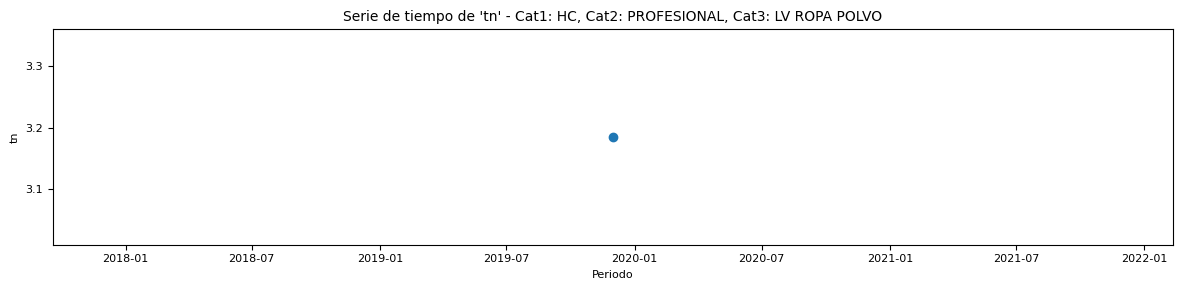

In [188]:
plot_category_all(df, time_series = 'tn', group_by= 'cat3')

## Conclusiones

Conclusiones principales de analisis exploratorio anual 2019 (ultimo año):
- El tamaño de los clientes es muy variado. Existen clientes sumamente grandes y otros sumamente chicos. Los 54 clientes más grandes concentran el 80% de las tn anuales de la empresa en 2019. Esto sugiere que hay que darle más preponderancia e incluso un modelado especial a estos clientes.
- La categoría más importante en volumen es HC, le siguen FOODS y PC pero representan en torno a un 30% del volumen de la primera. Si bien PC es la categoría de mayor cantidad de productos (+700, contra 200-300 de HC y FOODS), el volumen en toneladas no es demasiado grande. REF es una categoria minoritaria tanto en productos (13 skus) como en volumen
- A nivel grupo de productos, el grupo más grande en toneladas es ROPA LAVADO (HC) que contiene 99 productos, seguido por ADEREZOS (FOODS) que contiene 69 productos y CABELLO (PC) con 352 productos. El primer grupo más que duplica los que le siguen. El grupo con menor cantidad de toneladas es TE (REF); también resaltan grupos de PC (vinculados a piel y dental) y FOODS (vinculados a caldos)
- Los productos son muy variados en cuanto a tonelada promedio. Un producto con gran cantidad de tn comercializadas no necesariamente tiene más tn porque se compra más cantidad de producto, sino que es un producto naturalmente grande en cuanto a empaque (ejemplo jabones liquidos de empaque grande contra una crema facial pequeña). 
- Dentro de cada categoría e incluso dentro de cada grupo de producto las toneladas promedio por item son muy variadas. Por ejemplo dentro de ROPA LAVADO, el tipo de producto con menor cantidad de tn es 3.2% del producto con mayor cantidad de tn. Lo mismo ocurre dentro de ADEREZOS y CABELLO.
- El porcentaje de productos (a nivel general) en plan de precios cuidados varía mucho por año y mes, pero nunca superó el 3%, además no parece presentar estacionalidad. Particularmente los productos de REF para el primer semestre de 2019 presentaron +10% de productos en el plan. El resto de categorías generales nunca superó el 2.5%
- En cuanto a las series de tiempo de tn y stock. La tn solicitadas (cust_request_tn) y vendidas (tn) tienen 99% de correlación, mientras que el número de solicitudes (cust_request_qty) tiene sólo 25% de correlación con las variables anteriores. El stock final por mes tiene muy poca correlación con tn solicitadas y vendidas (15%)

Conclusiones principales de analisis exploratorio estacional:
- No se ve un comportamiento estacional general para las categorias o grupos de productos. 
- La categoría FOODS presenta mayor cantidad de grupos de productos con estacionalidad relativamente marcada, entre ellos destaca grupo ADEREZOS y SOPAS Y CALDOS
- También se ve estacionalidad para grupo DEOS de categoria general PC

Conclusiones principales de analisis de las series:
- Se confirma la existencia de estacionalidad para algunos grupos de productos. Por ejemplo; las sopas tienen picos de ventas en invierno
- Se observa que para algunos grupos solo se tienen muy pocos puntos de historia (incluso 1 unico punto) --> Definición de clase: no se predicen productos que tengan menos de 3 meses de antiguedad (si o si es necesario que, un prod nuevo, se haya introducido en octubre, para tener oct-nov-dic 2019)